# Exploratory Data Analysis (EDA)
## Insurance Risk Analytics & Predictive Modeling

This notebook contains the exploratory data analysis for the AlphaCare Insurance Solutions (ACIS) project.

### Objectives:
- Data Understanding and Quality Assessment
- Descriptive Statistics
- Univariate and Multivariate Analysis
- Temporal and Geographic Trends
- Outlier Detection
- Key Insights Visualization


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Set plotting style (try different style names for compatibility)
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        try:
            plt.style.use('dark_background')
        except:
            plt.style.use('default')
            print("Using default matplotlib style")

sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.4


## Step 1: Data Summarization

### 1.1 Load the Insurance Dataset


In [2]:
# Define data path
data_dir = Path('../data')
data_files = list(data_dir.glob('*.csv')) + list(data_dir.glob('*.xlsx')) + list(data_dir.glob('*.xls')) + list(data_dir.glob('*.txt'))

# Check if data files exist
if data_files:
    print(f"Found {len(data_files)} data file(s):")
    for file in data_files:
        print(f"  - {file.name}")
    # Load the first data file (adjust filename as needed)
    data_file = data_files[0]
    
    # Load based on file extension
    print(f"\nLoading: {data_file.name}")
    
    if data_file.suffix == '.csv':
        df = pd.read_csv(data_file, low_memory=False)
        print("✓ Loaded as CSV file")
    elif data_file.suffix == '.txt':
        # Try pipe-delimited first (common for insurance data)
        try:
            df = pd.read_csv(data_file, sep='|', low_memory=False, encoding='utf-8')
            print("✓ Loaded as pipe-delimited TXT file (|)")
        except:
            # If pipe doesn't work, try tab-delimited
            try:
                df = pd.read_csv(data_file, sep='\t', low_memory=False, encoding='utf-8')
                print("✓ Loaded as tab-delimited TXT file")
            except:
                # Last resort: try comma-delimited
                df = pd.read_csv(data_file, sep=',', low_memory=False, encoding='utf-8')
                print("✓ Loaded as comma-delimited TXT file")
    else:
        df = pd.read_excel(data_file)
        print("✓ Loaded as Excel file")
    
    print(f"\n✓ Dataset loaded successfully from: {data_file.name}")
    print(f"✓ Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
else:
    print("⚠ No data files found in ../data/ directory")
    print("Please place your insurance dataset in the data/ folder")
    print("Creating empty dataframe structure for demonstration...")
    df = pd.DataFrame()


Found 1 data file(s):
  - MachineLearningRating_v3.txt

Loading: MachineLearningRating_v3.txt
✓ Loaded as pipe-delimited TXT file (|)

✓ Dataset loaded successfully from: MachineLearningRating_v3.txt
✓ Shape: 1,000,098 rows × 52 columns


In [3]:
# Display basic information about the dataset
if not df.empty:
    print("=" * 80)
    print("DATASET OVERVIEW")
    print("=" * 80)
    print(f"\nShape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print("\n" + "=" * 80)
    print("FIRST FEW ROWS")
    print("=" * 80)
    display(df.head())
    
    print("\n" + "=" * 80)
    print("COLUMN NAMES")
    print("=" * 80)
    print(f"\nTotal columns: {len(df.columns)}")
    print("\nColumn list:")
    for i, col in enumerate(df.columns, 1):
        print(f"{i:3d}. {col}")
else:
    print("Dataset is empty. Please load your data first.")


DATASET OVERVIEW

Shape: 1,000,098 rows × 52 columns

Memory Usage: 2124.34 MB

FIRST FEW ROWS


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0



COLUMN NAMES

Total columns: 52

Column list:
  1. UnderwrittenCoverID
  2. PolicyID
  3. TransactionMonth
  4. IsVATRegistered
  5. Citizenship
  6. LegalType
  7. Title
  8. Language
  9. Bank
 10. AccountType
 11. MaritalStatus
 12. Gender
 13. Country
 14. Province
 15. PostalCode
 16. MainCrestaZone
 17. SubCrestaZone
 18. ItemType
 19. mmcode
 20. VehicleType
 21. RegistrationYear
 22. make
 23. Model
 24. Cylinders
 25. cubiccapacity
 26. kilowatts
 27. bodytype
 28. NumberOfDoors
 29. VehicleIntroDate
 30. CustomValueEstimate
 31. AlarmImmobiliser
 32. TrackingDevice
 33. CapitalOutstanding
 34. NewVehicle
 35. WrittenOff
 36. Rebuilt
 37. Converted
 38. CrossBorder
 39. NumberOfVehiclesInFleet
 40. SumInsured
 41. TermFrequency
 42. CalculatedPremiumPerTerm
 43. ExcessSelected
 44. CoverCategory
 45. CoverType
 46. CoverGroup
 47. Section
 48. Product
 49. StatutoryClass
 50. StatutoryRiskType
 51. TotalPremium
 52. TotalClaims


### 1.2 Check Data Types


In [4]:
# Check current data types
if not df.empty:
    print("=" * 80)
    print("DATA TYPES OVERVIEW")
    print("=" * 80)
    
    dtype_summary = df.dtypes.value_counts()
    print("\nData Type Distribution:")
    print(dtype_summary)
    
    print("\n" + "=" * 80)
    print("DETAILED DATA TYPE INFORMATION")
    print("=" * 80)
    
    dtype_info = pd.DataFrame({
        'Column': df.columns,
        'Data Type': df.dtypes,
        'Non-Null Count': df.count(),
        'Null Count': df.isnull().sum(),
        'Null Percentage': (df.isnull().sum() / len(df) * 100).round(2)
    })
    
    display(dtype_info)


DATA TYPES OVERVIEW

Data Type Distribution:
object     36
float64    11
int64       4
bool        1
Name: count, dtype: int64

DETAILED DATA TYPE INFORMATION


,Column,Data Type,Non-Null Count,Null Count,Null Percentage
UnderwrittenCoverID,UnderwrittenCoverID,int64,1000098,0,0.00
PolicyID,PolicyID,int64,1000098,0,0.00
TransactionMonth,TransactionMonth,object,1000098,0,0.00
IsVATRegistered,IsVATRegistered,bool,1000098,0,0.00
Citizenship,Citizenship,object,1000098,0,0.00
LegalType,LegalType,object,1000098,0,0.00
Title,Title,object,1000098,0,0.00
Language,Language,object,1000098,0,0.00
Bank,Bank,object,854137,145961,14.59
AccountType,AccountType,object,959866,40232,4.02


In [7]:
# Identify and convert date columns
if not df.empty:
    print("=" * 80)
    print("DATE COLUMN DETECTION AND CONVERSION")
    print("=" * 80)
    
    # Common date column names
    date_keywords = ['date', 'Date', 'DATE', 'month', 'Month', 'MONTH', 
                     'year', 'Year', 'YEAR', 'time', 'Time', 'TIME', 
                     'TransactionMonth']
    
    date_columns = [col for col in df.columns if any(keyword in col for keyword in date_keywords)]
    
    print(f"\nPotential date columns found: {date_columns}")
    
    # Convert date columns
    for col in date_columns:
        if col in df.columns:
            try:
                df[col] = pd.to_datetime(df[col], errors='coerce')
                print(f"✓ Converted '{col}' to datetime")
            except Exception as e:
                print(f"⚠ Could not convert '{col}': {e}")
    
    # Check for other date-like columns by examining data
    print("\nChecking for additional date-like columns...")
    for col in df.select_dtypes(include=['object']).columns:
        if col not in date_columns:
            sample = df[col].dropna().head(5)
            if len(sample) > 0:
                # Try to detect if it's a date
                try:
                    pd.to_datetime(sample.iloc[0], errors='raise')
                    print(f"  Found potential date column: '{col}'")
                except:
                    pass


DATE COLUMN DETECTION AND CONVERSION

Potential date columns found: ['TransactionMonth', 'RegistrationYear', 'VehicleIntroDate']
✓ Converted 'TransactionMonth' to datetime


✓ Converted 'RegistrationYear' to datetime
✓ Converted 'VehicleIntroDate' to datetime

Checking for additional date-like columns...


In [8]:
# Convert categorical columns to appropriate types
if not df.empty:
    print("=" * 80)
    print("CATEGORICAL COLUMN OPTIMIZATION")
    print("=" * 80)
    
    # Identify categorical columns (object type with limited unique values)
    categorical_threshold = 50  # If unique values < threshold, consider it categorical
    
    for col in df.select_dtypes(include=['object']).columns:
        unique_count = df[col].nunique()
        if unique_count < categorical_threshold and unique_count > 0:
            # Check if it's not a date column
            if not pd.api.types.is_datetime64_any_dtype(df[col]):
                df[col] = df[col].astype('category')
                print(f"✓ Converted '{col}' to category ({unique_count} unique values)")
    
    print("\nCategorical columns optimized for memory efficiency.")


CATEGORICAL COLUMN OPTIMIZATION

Categorical columns optimized for memory efficiency.


In [9]:
# Ensure numeric columns are properly typed
if not df.empty:
    print("=" * 80)
    print("NUMERIC COLUMN OPTIMIZATION")
    print("=" * 80)
    
    # Key numeric columns to check
    numeric_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate',
                      'CalculatedPremiumPerTerm', 'ExcessSelected', 'Cylinders', 
                      'Cubiccapacity', 'Kilowatts', 'NumberOfDoors', 'CapitalOutstanding',
                      'NumberOfVehiclesInFleet']
    
    # Find numeric columns that exist in the dataset
    existing_numeric = [col for col in numeric_columns if col in df.columns]
    
    print(f"\nKey numeric columns found: {existing_numeric}")
    
    # Convert to appropriate numeric types
    for col in existing_numeric:
        if df[col].dtype == 'object':
            # Try to convert string numbers to numeric
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"✓ Converted '{col}' from object to numeric")
        elif df[col].dtype in ['int64', 'int32']:
            # Check if we can downcast
            df[col] = pd.to_numeric(df[col], downcast='integer')
            print(f"✓ Optimized '{col}' integer type")
        elif df[col].dtype in ['float64', 'float32']:
            # Check if we can downcast
            df[col] = pd.to_numeric(df[col], downcast='float')
            print(f"✓ Optimized '{col}' float type")
    
    print("\nNumeric columns optimized.")


NUMERIC COLUMN OPTIMIZATION

Key numeric columns found: ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'Cylinders', 'NumberOfDoors', 'CapitalOutstanding', 'NumberOfVehiclesInFleet']
✓ Optimized 'TotalPremium' float type
✓ Optimized 'TotalClaims' float type
✓ Optimized 'SumInsured' float type
✓ Optimized 'CustomValueEstimate' float type
✓ Optimized 'CalculatedPremiumPerTerm' float type
✓ Optimized 'Cylinders' float type
✓ Optimized 'NumberOfDoors' float type
✓ Converted 'CapitalOutstanding' from object to numeric
✓ Optimized 'NumberOfVehiclesInFleet' float type

Numeric columns optimized.


In [10]:
# Display updated data types
if not df.empty:
    print("=" * 80)
    print("UPDATED DATA TYPES SUMMARY")
    print("=" * 80)
    
    dtype_summary_updated = df.dtypes.value_counts()
    print("\nUpdated Data Type Distribution:")
    print(dtype_summary_updated)
    
    print("\n" + "-" * 80)
    print("Memory Usage Comparison:")
    print(f"Before optimization: (check previous output)")
    print(f"After optimization: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


UPDATED DATA TYPES SUMMARY

Updated Data Type Distribution:
float64           9
category          5
datetime64[ns]    3
int64             3
float32           3
bool              1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
object            1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
Name: count, dtype: int64

--------------------------------------------------------------------------------
Memory Usage Comparison:
Before optimization: (check previous output)
After optimization: 226.25 MB


### 1.3 Calculate Descriptive Statistics

For key financial columns: `TotalPremium`, `TotalClaims`, `SumInsured`, `CustomValueEstimate`


In [11]:
# Define key financial columns for analysis
key_financial_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate']

# Check which columns exist in the dataset
existing_financial_cols = [col for col in key_financial_columns if col in df.columns]

if existing_financial_cols:
    print("=" * 80)
    print("DESCRIPTIVE STATISTICS - KEY FINANCIAL VARIABLES")
    print("=" * 80)
    
    # Calculate descriptive statistics
    desc_stats = df[existing_financial_cols].describe()
    
    # Add additional statistics
    additional_stats = pd.DataFrame({
        col: {
            'Mean': df[col].mean(),
            'Median': df[col].median(),
            'Std Dev': df[col].std(),
            'Min': df[col].min(),
            'Max': df[col].max(),
            '25th Percentile': df[col].quantile(0.25),
            '75th Percentile': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurtosis(),
            'Missing Values': df[col].isnull().sum(),
            'Missing %': (df[col].isnull().sum() / len(df) * 100).round(2),
            'Zero Values': (df[col] == 0).sum(),
            'Zero %': ((df[col] == 0).sum() / len(df) * 100).round(2)
        }
        for col in existing_financial_cols
    })
    
    print("\n" + "-" * 80)
    print("COMPREHENSIVE DESCRIPTIVE STATISTICS")
    print("-" * 80)
    display(additional_stats.T)
    
    print("\n" + "-" * 80)
    print("STANDARD DESCRIPTIVE STATISTICS (pandas describe)")
    print("-" * 80)
    display(desc_stats)
    
else:
    print("⚠ None of the expected financial columns found in the dataset.")
    print("Available numeric columns:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print(numeric_cols)


DESCRIPTIVE STATISTICS - KEY FINANCIAL VARIABLES

--------------------------------------------------------------------------------
COMPREHENSIVE DESCRIPTIVE STATISTICS
--------------------------------------------------------------------------------


,Mean,Median,Std Dev,Min,Max,25th Percentile,75th Percentile,IQR,Skewness,Kurtosis,Missing Values,Missing %,Zero Values,Zero %
TotalPremium,61.905496,2.178333,2.302845e+02,-782.576754,6.528260e+04,0.0,21.929825,21.929825,138.596458,37176.185477,0.0,0.00,381634.0,38.16
TotalClaims,64.861190,0.000000,2.384075e+03,-12002.412281,3.930921e+05,0.0,0.000000,0.000000,69.933118,6791.926170,0.0,0.00,997305.0,99.72
SumInsured,604172.732589,7500.000000,1.508332e+06,0.010000,1.263620e+07,5000.0,250000.000000,245000.000000,2.548565,4.645169,0.0,0.00,0.0,0.00
CustomValueEstimate,225531.129942,220000.000000,5.645157e+05,20000.000000,2.655000e+07,135000.0,280000.000000,145000.000000,40.870518,1762.321550,779642.0,77.96,0.0,0.00



--------------------------------------------------------------------------------
STANDARD DESCRIPTIVE STATISTICS (pandas describe)
--------------------------------------------------------------------------------


,TotalPremium,TotalClaims,SumInsured,CustomValueEstimate
count,1.000098e+06,1.000098e+06,1.000098e+06,2.204560e+05
mean,6.190550e+01,6.486119e+01,6.041727e+05,2.255311e+05
std,2.302845e+02,2.384075e+03,1.508332e+06,5.645157e+05
min,-7.825768e+02,-1.200241e+04,1.000000e-02,2.000000e+04
25%,0.000000e+00,0.000000e+00,5.000000e+03,1.350000e+05
50%,2.178333e+00,0.000000e+00,7.500000e+03,2.200000e+05
75%,2.192982e+01,0.000000e+00,2.500000e+05,2.800000e+05
max,6.528260e+04,3.930921e+05,1.263620e+07,2.655000e+07


In [12]:
# Calculate descriptive statistics for ALL numeric columns
if not df.empty:
    print("=" * 80)
    print("DESCRIPTIVE STATISTICS - ALL NUMERIC COLUMNS")
    print("=" * 80)
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if numeric_cols:
        print(f"\nFound {len(numeric_cols)} numeric columns")
        
        # Create comprehensive statistics table
        all_stats = pd.DataFrame({
            col: {
                'Count': df[col].count(),
                'Mean': df[col].mean(),
                'Median': df[col].median(),
                'Std Dev': df[col].std(),
                'Min': df[col].min(),
                'Max': df[col].max(),
                'Range': df[col].max() - df[col].min(),
                '25th %ile': df[col].quantile(0.25),
                '75th %ile': df[col].quantile(0.75),
                'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
                'Missing': df[col].isnull().sum(),
                'Missing %': (df[col].isnull().sum() / len(df) * 100).round(2)
            }
            for col in numeric_cols
        })
        
        display(all_stats.T.round(2))
    else:
        print("No numeric columns found in the dataset.")


DESCRIPTIVE STATISTICS - ALL NUMERIC COLUMNS

Found 15 numeric columns


,Count,Mean,Median,Std Dev,Min,Max,Range,25th %ile,75th %ile,IQR,Missing,Missing %
UnderwrittenCoverID,1000098.0,104817.55,94083.00,63293.71,1.00,301175.00,301174.00,55143.00,139190.00,84047.00,0.0,0.00
PolicyID,1000098.0,7956.68,7071.00,5290.04,14.00,23246.00,23232.00,4500.00,11077.00,6577.00,0.0,0.00
PostalCode,1000098.0,3020.60,2000.00,2649.85,1.00,9870.00,9869.00,827.00,4180.00,3353.00,0.0,0.00
mmcode,999546.0,54877704.02,60058415.00,13603805.34,4041200.00,65065350.00,61024150.00,60056925.00,60058418.00,1493.00,552.0,0.06
Cylinders,999546.0,4.05,4.00,0.29,0.00,10.00,10.00,4.00,4.00,0.00,552.0,0.06
cubiccapacity,999546.0,2466.74,2694.00,442.80,0.00,12880.00,12880.00,2237.00,2694.00,457.00,552.0,0.06
kilowatts,999546.0,97.21,111.00,19.39,0.00,309.00,309.00,75.00,111.00,36.00,552.0,0.06
NumberOfDoors,999546.0,4.02,4.00,0.47,0.00,6.00,6.00,4.00,4.00,0.00,552.0,0.06
CustomValueEstimate,220456.0,225531.13,220000.00,564515.75,20000.00,26550000.00,26530000.00,135000.00,280000.00,145000.00,779642.0,77.96
CapitalOutstanding,999776.0,52605.22,0.00,111417.19,-2.00,700000.00,700002.00,0.00,0.00,0.00,322.0,0.03


In [13]:
# Summary of data types after all conversions
if not df.empty:
    print("=" * 80)
    print("FINAL DATA TYPE SUMMARY")
    print("=" * 80)
    
    summary = pd.DataFrame({
        'Column': df.columns,
        'Data Type': df.dtypes,
        'Non-Null Count': df.count(),
        'Null Count': df.isnull().sum(),
        'Null %': (df.isnull().sum() / len(df) * 100).round(2),
        'Unique Values': [df[col].nunique() for col in df.columns]
    })
    
    # Categorize columns
    summary['Column Category'] = summary.apply(lambda row: 
        'Date' if pd.api.types.is_datetime64_any_dtype(df[row['Column']]) else
        'Numeric' if pd.api.types.is_numeric_dtype(df[row['Column']]) else
        'Categorical' if df[row['Column']].dtype.name == 'category' else
        'Text/Object', axis=1)
    
    display(summary)
    
    print("\n" + "=" * 80)
    print("COLUMN CATEGORY SUMMARY")
    print("=" * 80)
    print(summary['Column Category'].value_counts())


FINAL DATA TYPE SUMMARY


,Column,Data Type,Non-Null Count,Null Count,Null %,Unique Values,Column Category
UnderwrittenCoverID,UnderwrittenCoverID,int64,1000098,0,0.00,116532,Numeric
PolicyID,PolicyID,int64,1000098,0,0.00,7000,Numeric
TransactionMonth,TransactionMonth,datetime64[ns],1000098,0,0.00,23,Date
IsVATRegistered,IsVATRegistered,bool,1000098,0,0.00,2,Numeric
Citizenship,Citizenship,category,1000098,0,0.00,4,Categorical
LegalType,LegalType,category,1000098,0,0.00,6,Categorical
Title,Title,category,1000098,0,0.00,5,Categorical
Language,Language,category,1000098,0,0.00,1,Categorical
Bank,Bank,category,854137,145961,14.59,11,Categorical
AccountType,AccountType,category,959866,40232,4.02,3,Categorical



COLUMN CATEGORY SUMMARY
Column Category
Categorical    32
Numeric        16
Date            3
Text/Object     1
Name: count, dtype: int64


### Summary of Step 1: Data Summarization

**Completed:**
- ✓ Dataset loaded
- ✓ Data types checked and optimized
- ✓ Date columns converted to datetime
- ✓ Categorical columns optimized
- ✓ Numeric columns verified and optimized
- ✓ Descriptive statistics calculated for key financial variables
- ✓ Comprehensive statistics for all numeric columns

**Key Findings:**
- Dataset shape and structure identified
- Data type distribution analyzed
- Memory usage optimized
- Statistical summaries generated for analysis

**Next Steps:**
- Proceed to Step 2: Data Quality Assessment (Missing Values)


### Summary of Step 1: Data Summarization

**Completed:**
- ✓ Dataset loaded
- ✓ Data types checked and optimized
- ✓ Date columns converted to datetime
- ✓ Categorical columns optimized
- ✓ Numeric columns verified and optimized
- ✓ Descriptive statistics calculated for key financial variables
- ✓ Comprehensive statistics for all numeric columns

**Key Findings:**
- Dataset shape and structure identified
- Data type distribution analyzed
- Memory usage optimized
- Statistical summaries generated for analysis

**Next Steps:**
- Proceed to Step 2: Data Quality Assessment (Missing Values)


## Step 2: Data Quality Assessment

### 2.1 Check for Missing Values

Missing values (also called null values, NaN, or NA) are a common data quality issue that can:
- **Skew analysis results** if not handled properly
- **Cause errors** in machine learning models
- **Indicate data collection problems** that need investigation
- **Require imputation or removal** depending on the amount and pattern

We'll analyze:
1. **Count of missing values** per column
2. **Percentage of missing values** per column
3. **Visual patterns** of missing data (heatmap)
4. **Impact assessment** on key variables


In [14]:
# Comprehensive missing value analysis
if not df.empty:
    print("=" * 80)
    print("MISSING VALUES ANALYSIS")
    print("=" * 80)
    
    # Calculate missing values
    missing_count = df.isnull().sum()
    missing_percentage = (df.isnull().sum() / len(df) * 100).round(2)
    total_missing = missing_count.sum()
    
    # Create summary dataframe
    missing_summary = pd.DataFrame({
        'Column': df.columns,
        'Missing Count': missing_count.values,
        'Missing Percentage': missing_percentage.values,
        'Non-Missing Count': df.count().values,
        'Data Type': df.dtypes.values
    })
    
    # Sort by missing count (descending)
    missing_summary = missing_summary.sort_values('Missing Count', ascending=False)
    
    print(f"\nTotal missing values across all columns: {total_missing:,}")
    print(f"Total rows in dataset: {len(df):,}")
    print(f"Overall missing data percentage: {(total_missing / (len(df) * len(df.columns)) * 100):.2f}%")
    
    print("\n" + "=" * 80)
    print("MISSING VALUES BY COLUMN (Sorted by Missing Count)")
    print("=" * 80)
    display(missing_summary)
    
else:
    print("Dataset is empty. Please load your data first.")


MISSING VALUES ANALYSIS

Total missing values across all columns: 5,067,968
Total rows in dataset: 1,000,098
Overall missing data percentage: 9.75%

MISSING VALUES BY COLUMN (Sorted by Missing Count)


,Column,Missing Count,Missing Percentage,Non-Missing Count,Data Type
38,NumberOfVehiclesInFleet,1000098,100.00,0,float32
37,CrossBorder,999400,99.93,698,category
29,CustomValueEstimate,779642,77.96,220456,float64
35,Rebuilt,641901,64.18,358197,category
36,Converted,641901,64.18,358197,category
34,WrittenOff,641901,64.18,358197,category
33,NewVehicle,153295,15.33,846803,category
8,Bank,145961,14.59,854137,category
9,AccountType,40232,4.02,959866,category
11,Gender,9536,0.95,990562,category


In [15]:
# Focus on columns with missing values
if not df.empty:
    print("=" * 80)
    print("COLUMNS WITH MISSING VALUES")
    print("=" * 80)
    
    columns_with_missing = missing_summary[missing_summary['Missing Count'] > 0]
    
    if len(columns_with_missing) > 0:
        print(f"\nFound {len(columns_with_missing)} columns with missing values:")
        print("\n" + "-" * 80)
        
        for idx, row in columns_with_missing.iterrows():
            print(f"\n{row['Column']}:")
            print(f"  - Missing Count: {row['Missing Count']:,}")
            print(f"  - Missing Percentage: {row['Missing Percentage']:.2f}%")
            print(f"  - Non-Missing Count: {row['Non-Missing Count']:,}")
            print(f"  - Data Type: {row['Data Type']}")
        
        # Categorize by missing percentage
        print("\n" + "=" * 80)
        print("CATEGORIZATION BY MISSING PERCENTAGE")
        print("=" * 80)
        
        critical_missing = columns_with_missing[columns_with_missing['Missing Percentage'] >= 50]
        high_missing = columns_with_missing[(columns_with_missing['Missing Percentage'] >= 20) & 
                                           (columns_with_missing['Missing Percentage'] < 50)]
        moderate_missing = columns_with_missing[(columns_with_missing['Missing Percentage'] >= 5) & 
                                                (columns_with_missing['Missing Percentage'] < 20)]
        low_missing = columns_with_missing[columns_with_missing['Missing Percentage'] < 5]
        
        print(f"\n🔴 Critical (≥50% missing): {len(critical_missing)} columns")
        if len(critical_missing) > 0:
            print("   Consider removing these columns or investigate data collection:")
            for col in critical_missing['Column']:
                pct = columns_with_missing[columns_with_missing['Column'] == col]['Missing Percentage'].values[0]
                print(f"   - {col}: {pct:.2f}%")
        
        print(f"\n🟠 High (20-50% missing): {len(high_missing)} columns")
        if len(high_missing) > 0:
            print("   May need imputation or special handling:")
            for col in high_missing['Column']:
                pct = columns_with_missing[columns_with_missing['Column'] == col]['Missing Percentage'].values[0]
                print(f"   - {col}: {pct:.2f}%")
        
        print(f"\n🟡 Moderate (5-20% missing): {len(moderate_missing)} columns")
        if len(moderate_missing) > 0:
            for col in moderate_missing['Column']:
                pct = columns_with_missing[columns_with_missing['Column'] == col]['Missing Percentage'].values[0]
                print(f"   - {col}: {pct:.2f}%")
        
        print(f"\n🟢 Low (<5% missing): {len(low_missing)} columns")
        if len(low_missing) > 0:
            for col in low_missing['Column']:
                pct = columns_with_missing[columns_with_missing['Column'] == col]['Missing Percentage'].values[0]
                print(f"   - {col}: {pct:.2f}%")
    else:
        print("\n✓ No missing values found in any column!")
        print("This is excellent data quality!")


COLUMNS WITH MISSING VALUES

Found 22 columns with missing values:

--------------------------------------------------------------------------------

NumberOfVehiclesInFleet:
  - Missing Count: 1,000,098
  - Missing Percentage: 100.00%
  - Non-Missing Count: 0
  - Data Type: float32

CrossBorder:
  - Missing Count: 999,400
  - Missing Percentage: 99.93%
  - Non-Missing Count: 698
  - Data Type: category

CustomValueEstimate:
  - Missing Count: 779,642
  - Missing Percentage: 77.96%
  - Non-Missing Count: 220,456
  - Data Type: float64

Rebuilt:
  - Missing Count: 641,901
  - Missing Percentage: 64.18%
  - Non-Missing Count: 358,197
  - Data Type: category

Converted:
  - Missing Count: 641,901
  - Missing Percentage: 64.18%
  - Non-Missing Count: 358,197
  - Data Type: category

WrittenOff:
  - Missing Count: 641,901
  - Missing Percentage: 64.18%
  - Non-Missing Count: 358,197
  - Data Type: category

NewVehicle:
  - Missing Count: 153,295
  - Missing Percentage: 15.33%
  - Non-Missin

In [18]:
# Check missing values in key financial columns
if not df.empty:
    print("=" * 80)
    print("MISSING VALUES IN KEY FINANCIAL COLUMNS")
    print("=" * 80)
    
    key_financial_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate']
    existing_financial = [col for col in key_financial_cols if col in df.columns]
    
    if existing_financial:
        print("\nFinancial columns missing value analysis:")
        print("-" * 80)
        
        for col in existing_financial:
            missing = df[col].isnull().sum()
            missing_pct = (missing / len(df) * 100).round(2)
            print(f"\n{col}:")
            print(f"  - Missing: {missing:,} ({missing_pct}%)")
            print(f"  - Non-missing: {df[col].count():,}")
            
            if missing > 0:
                print(f"  ⚠️  WARNING: Missing values in critical financial column!")
                print(f"     Impact: Cannot calculate accurate statistics or build models")
                print(f"     Recommendation: Investigate why these values are missing")
            else:
                print(f"  ✓ No missing values")
    else:
        print("Key financial columns not found in dataset.")


MISSING VALUES IN KEY FINANCIAL COLUMNS

Financial columns missing value analysis:
--------------------------------------------------------------------------------

TotalPremium:
  - Missing: 0 (0.0%)
  - Non-missing: 1,000,098
  ✓ No missing values

TotalClaims:
  - Missing: 0 (0.0%)
  - Non-missing: 1,000,098
  ✓ No missing values

SumInsured:
  - Missing: 0 (0.0%)
  - Non-missing: 1,000,098
  ✓ No missing values

CustomValueEstimate:
  - Missing: 779,642 (77.96%)
  - Non-missing: 220,456
  ⚠️  WARNING: Missing values in critical financial column!
     Impact: Cannot calculate accurate statistics or build models
     Recommendation: Investigate why these values are missing


### 2.2 Visualize Missing Patterns (Heatmap)

A heatmap helps us see:
- **Which columns have missing values** (darker colors = more missing)
- **Patterns in missing data** (are certain rows missing multiple values?)
- **Correlations in missingness** (if Column A is missing, is Column B also missing?)


MISSING VALUES HEATMAP

Showing missing patterns for 22 columns with missing values
Note: For large datasets, we'll sample rows for visualization

Sampling 10,000 rows for visualization (out of 1,000,098 total)


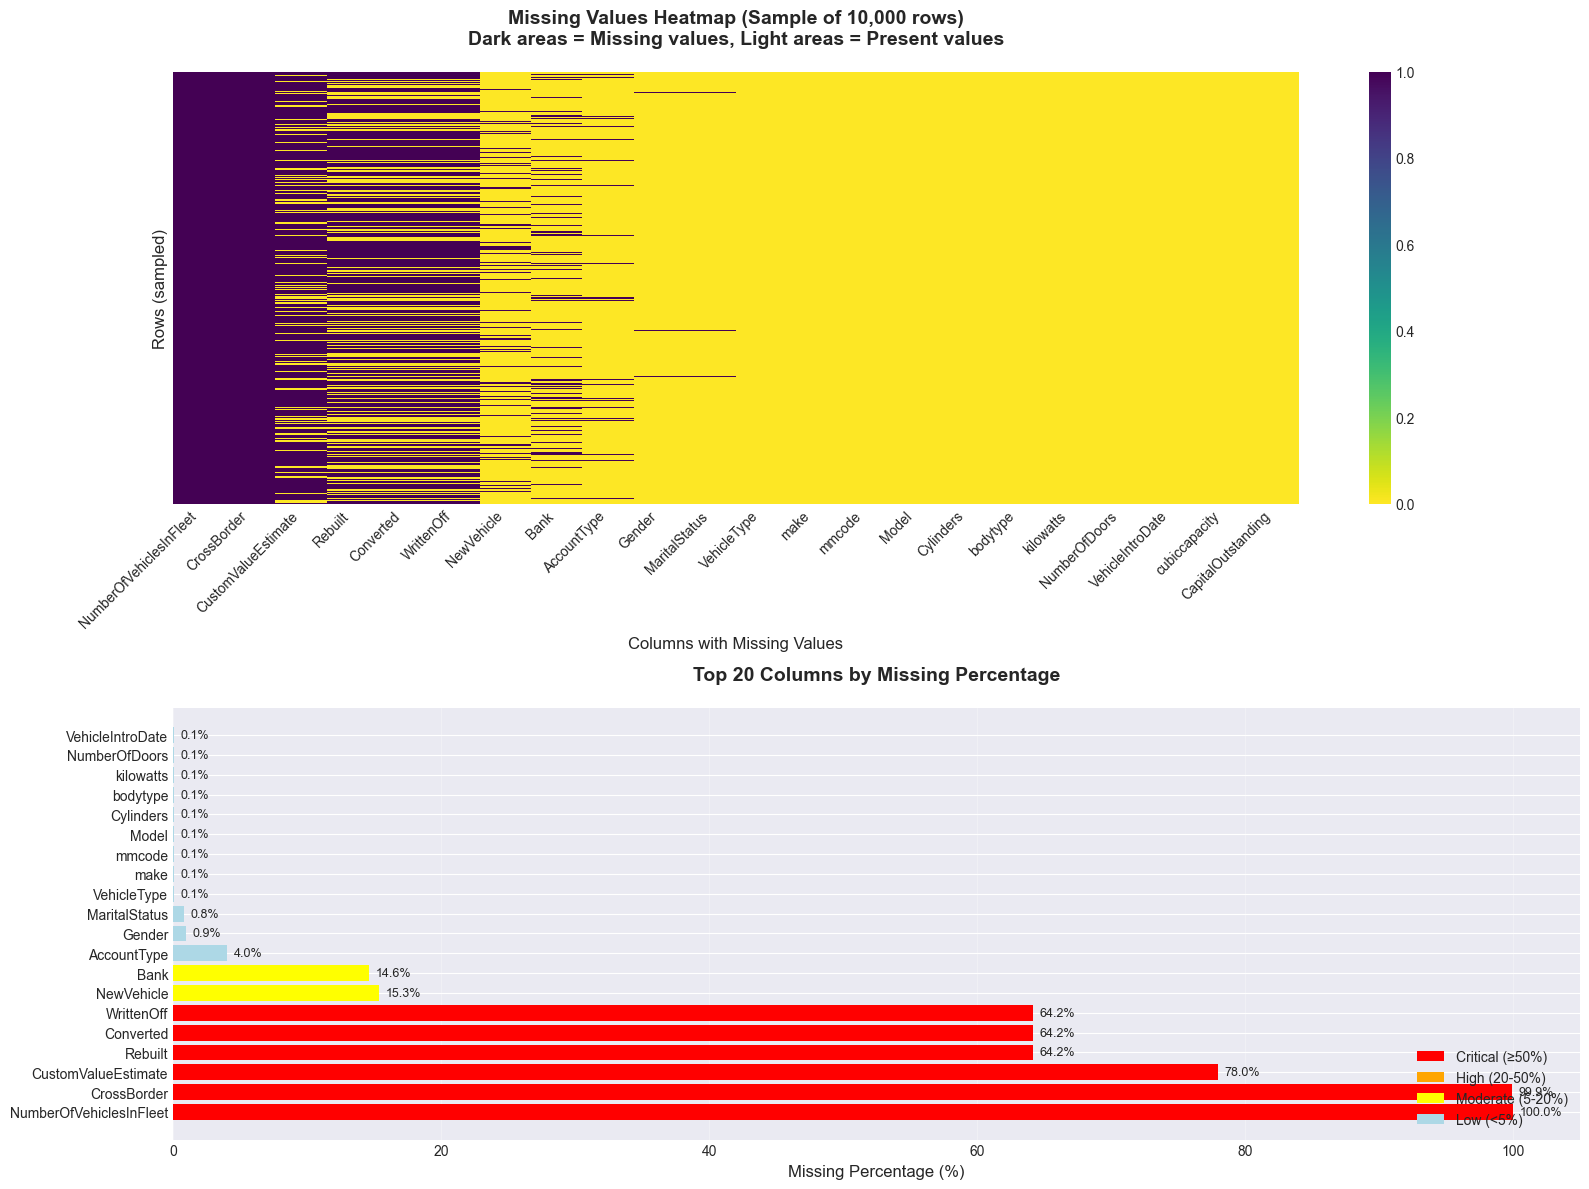


✓ Heatmap visualization created


In [19]:
# Create missing values heatmap
if not df.empty:
    # Get columns with missing values for the heatmap
    cols_with_missing = missing_summary[missing_summary['Missing Count'] > 0]['Column'].tolist()
    
    if len(cols_with_missing) > 0:
        print("=" * 80)
        print("MISSING VALUES HEATMAP")
        print("=" * 80)
        print(f"\nShowing missing patterns for {len(cols_with_missing)} columns with missing values")
        print("Note: For large datasets, we'll sample rows for visualization")
        
        # For large datasets, sample rows for better visualization
        sample_size = min(10000, len(df))
        if len(df) > sample_size:
            df_sample = df.sample(n=sample_size, random_state=42)
            print(f"\nSampling {sample_size:,} rows for visualization (out of {len(df):,} total)")
        else:
            df_sample = df
        
        # Create figure with subplots
        fig, axes = plt.subplots(2, 1, figsize=(16, 12))
        
        # Plot 1: Heatmap of missing values (sample of rows)
        missing_matrix = df_sample[cols_with_missing].isnull()
        
        ax1 = axes[0]
        sns.heatmap(missing_matrix, 
                   yticklabels=False,  # Don't show row labels (too many)
                   cbar=True,
                   cmap='viridis_r',  # Reversed viridis: darker = more missing
                   ax=ax1)
        ax1.set_title(f'Missing Values Heatmap (Sample of {sample_size:,} rows)\n' + 
                     'Dark areas = Missing values, Light areas = Present values', 
                     fontsize=14, fontweight='bold', pad=20)
        ax1.set_xlabel('Columns with Missing Values', fontsize=12)
        ax1.set_ylabel('Rows (sampled)', fontsize=12)
        
        # Rotate x-axis labels for better readability
        plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
        
        # Plot 2: Bar chart of missing percentages
        ax2 = axes[1]
        missing_pct_data = missing_summary[missing_summary['Missing Count'] > 0].head(20)  # Top 20
        colors = ['red' if pct >= 50 else 'orange' if pct >= 20 else 'yellow' if pct >= 5 else 'lightblue' 
                 for pct in missing_pct_data['Missing Percentage']]
        
        bars = ax2.barh(range(len(missing_pct_data)), 
                       missing_pct_data['Missing Percentage'].values,
                       color=colors)
        ax2.set_yticks(range(len(missing_pct_data)))
        ax2.set_yticklabels(missing_pct_data['Column'].values)
        ax2.set_xlabel('Missing Percentage (%)', fontsize=12)
        ax2.set_title('Top 20 Columns by Missing Percentage', fontsize=14, fontweight='bold', pad=20)
        ax2.grid(axis='x', alpha=0.3)
        
        # Add value labels on bars
        for i, (idx, row) in enumerate(missing_pct_data.iterrows()):
            ax2.text(row['Missing Percentage'] + 0.5, i, 
                    f"{row['Missing Percentage']:.1f}%",
                    va='center', fontsize=9)
        
        # Add legend
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='red', label='Critical (≥50%)'),
            Patch(facecolor='orange', label='High (20-50%)'),
            Patch(facecolor='yellow', label='Moderate (5-20%)'),
            Patch(facecolor='lightblue', label='Low (<5%)')
        ]
        ax2.legend(handles=legend_elements, loc='lower right')
        
        plt.tight_layout()
        plt.show()
        
        print("\n✓ Heatmap visualization created")
    else:
        print("No missing values found - no heatmap needed!")
        print("✓ Excellent data quality!")


MISSING VALUES BAR CHART - ALL COLUMNS


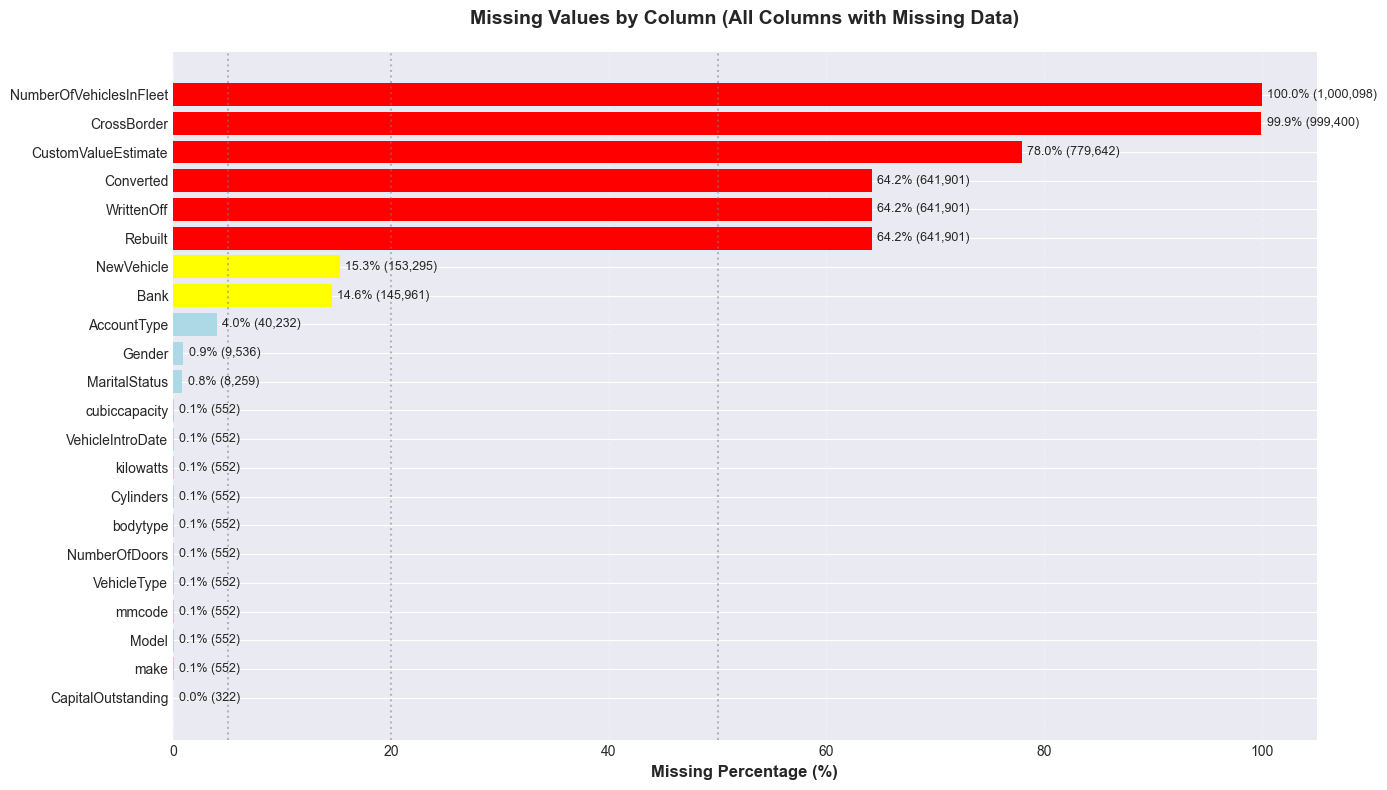


✓ Bar chart showing 22 columns with missing values


In [20]:
# Additional visualization: Missing values bar chart (all columns)
if not df.empty:
    # Get columns with missing values
    cols_with_missing = missing_summary[missing_summary['Missing Count'] > 0]['Column'].tolist()
    
    if len(cols_with_missing) > 0:
        print("=" * 80)
        print("MISSING VALUES BAR CHART - ALL COLUMNS")
        print("=" * 80)
        
        # Create a more detailed bar chart
        fig, ax = plt.subplots(figsize=(14, max(8, len(cols_with_missing) * 0.3)))
        
        # Sort by missing percentage
        missing_chart_data = missing_summary[missing_summary['Missing Count'] > 0].sort_values('Missing Percentage')
        
        # Color coding
        colors = ['red' if pct >= 50 else 'orange' if pct >= 20 else 'yellow' if pct >= 5 else 'lightblue' 
                 for pct in missing_chart_data['Missing Percentage']]
        
        bars = ax.barh(range(len(missing_chart_data)), 
                      missing_chart_data['Missing Percentage'].values,
                      color=colors)
        
        ax.set_yticks(range(len(missing_chart_data)))
        ax.set_yticklabels(missing_chart_data['Column'].values)
        ax.set_xlabel('Missing Percentage (%)', fontsize=12, fontweight='bold')
        ax.set_title('Missing Values by Column (All Columns with Missing Data)', 
                    fontsize=14, fontweight='bold', pad=20)
        ax.grid(axis='x', alpha=0.3, linestyle='--')
        
        # Add value labels
        for i, (idx, row) in enumerate(missing_chart_data.iterrows()):
            ax.text(row['Missing Percentage'] + 0.5, i, 
                   f"{row['Missing Percentage']:.1f}% ({int(row['Missing Count']):,})",
                   va='center', fontsize=9)
        
        # Add vertical line at 5%, 20%, 50%
        ax.axvline(x=5, color='gray', linestyle=':', alpha=0.5, label='5% threshold')
        ax.axvline(x=20, color='gray', linestyle=':', alpha=0.5, label='20% threshold')
        ax.axvline(x=50, color='gray', linestyle=':', alpha=0.5, label='50% threshold')
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n✓ Bar chart showing {len(missing_chart_data)} columns with missing values")
    else:
        print("No missing values found - no bar chart needed!")


In [21]:
# Summary statistics for missing values
if not df.empty:
    print("=" * 80)
    print("MISSING VALUES SUMMARY STATISTICS")
    print("=" * 80)
    
    cols_with_missing = missing_summary[missing_summary['Missing Count'] > 0]
    
    if len(cols_with_missing) > 0:
        print(f"\nOverall Statistics:")
        print(f"  - Total columns in dataset: {len(df.columns)}")
        print(f"  - Columns with missing values: {len(cols_with_missing)}")
        print(f"  - Columns without missing values: {len(df.columns) - len(cols_with_missing)}")
        print(f"  - Percentage of columns with missing data: {(len(cols_with_missing) / len(df.columns) * 100):.2f}%")
        
        print(f"\nMissing Percentage Statistics:")
        print(f"  - Mean missing %: {cols_with_missing['Missing Percentage'].mean():.2f}%")
        print(f"  - Median missing %: {cols_with_missing['Missing Percentage'].median():.2f}%")
        print(f"  - Max missing %: {cols_with_missing['Missing Percentage'].max():.2f}%")
        print(f"  - Min missing %: {cols_with_missing['Missing Percentage'].min():.2f}%")
        
        print(f"\nRows with Missing Values:")
        rows_with_missing = df.isnull().any(axis=1).sum()
        rows_without_missing = (~df.isnull().any(axis=1)).sum()
        print(f"  - Rows with at least one missing value: {rows_with_missing:,} ({(rows_with_missing/len(df)*100):.2f}%)")
        print(f"  - Complete rows (no missing values): {rows_without_missing:,} ({(rows_without_missing/len(df)*100):.2f}%)")
        
        # Check for completely empty columns
        completely_empty = missing_summary[missing_summary['Missing Percentage'] == 100.0]
        if len(completely_empty) > 0:
            print(f"\n⚠️  WARNING: {len(completely_empty)} completely empty columns found:")
            for col in completely_empty['Column']:
                print(f"   - {col}")
            print("   Recommendation: Consider removing these columns")
    else:
        print("\n✓ No missing values in the entire dataset!")
        print("✓ Perfect data quality - ready for analysis!")


MISSING VALUES SUMMARY STATISTICS

Overall Statistics:
  - Total columns in dataset: 52
  - Columns with missing values: 22
  - Columns without missing values: 30
  - Percentage of columns with missing data: 42.31%

Missing Percentage Statistics:
  - Mean missing %: 23.04%
  - Median missing %: 0.44%
  - Max missing %: 100.00%
  - Min missing %: 0.03%

Rows with Missing Values:
  - Rows with at least one missing value: 1,000,098 (100.00%)
  - Complete rows (no missing values): 0 (0.00%)

⚠️  WARNING: 1 completely empty columns found:
   - NumberOfVehiclesInFleet
   Recommendation: Consider removing these columns


### Summary of Step 2: Data Quality Assessment

**Completed:**
- ✓ Missing values counted for all columns
- ✓ Missing percentages calculated
- ✓ Columns categorized by missing data severity
- ✓ Key financial columns checked for missing values
- ✓ Missing patterns visualized with heatmap
- ✓ Bar charts created for missing value analysis
- ✓ Summary statistics generated

**Key Insights:**
- Identified columns with critical, high, moderate, and low missing data
- Assessed impact on key financial variables
- Visualized missing data patterns
- Provided recommendations for data handling

**Next Steps:**
- Proceed to Step 3: Univariate Analysis (Distribution of Variables)


## Step 3: Univariate Analysis

Univariate analysis examines one variable at a time to understand its distribution and characteristics.

### 3.1 Numerical Columns Analysis
- **Histograms**: Show the distribution shape (normal, skewed, bimodal, etc.)
- **Box Plots**: Identify outliers and show quartiles (Q1, median, Q3)

### 3.2 Categorical Columns Analysis
- **Bar Charts**: Visualize frequency counts
- **Value Counts**: See the distribution of categories


UNIVARIATE ANALYSIS - NUMERICAL COLUMNS

Creating histograms for 4 key financial variables...


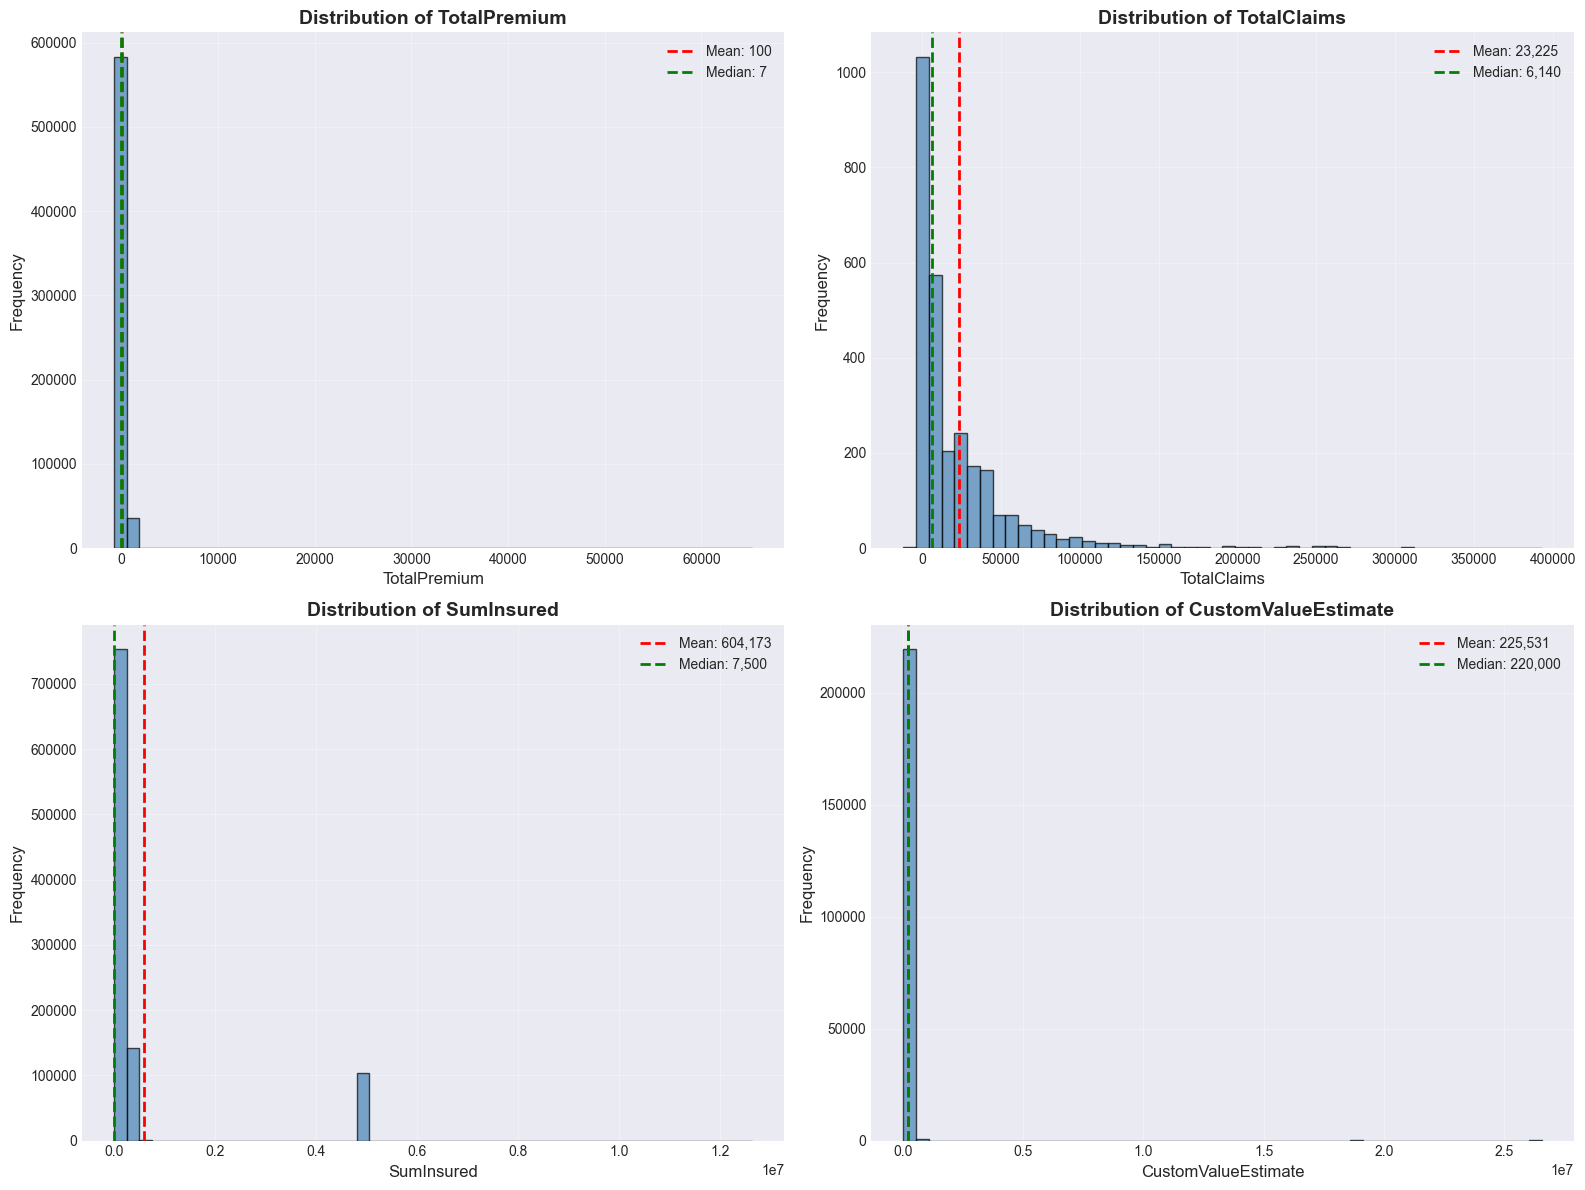

✓ Histograms created for key financial variables


In [22]:
# Univariate Analysis: Numerical Columns - Histograms
if not df.empty:
    print("=" * 80)
    print("UNIVARIATE ANALYSIS - NUMERICAL COLUMNS")
    print("=" * 80)
    
    # Get numerical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Focus on key financial columns first
    key_financial = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate']
    key_numeric = [col for col in key_financial if col in numeric_cols]
    
    if len(key_numeric) > 0:
        print(f"\nCreating histograms for {len(key_numeric)} key financial variables...")
        
        # Calculate grid size
        n_cols = min(2, len(key_numeric))
        n_rows = (len(key_numeric) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows))
        axes = axes.flatten() if len(key_numeric) > 1 else [axes]
        
        for idx, col in enumerate(key_numeric):
            ax = axes[idx]
            
            # Remove zeros and nulls for better visualization
            data = df[col].dropna()
            data = data[data != 0] if len(data[data != 0]) > 0 else data
            
            if len(data) > 0:
                ax.hist(data, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
                ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
                ax.set_xlabel(col, fontsize=12)
                ax.set_ylabel('Frequency', fontsize=12)
                ax.grid(alpha=0.3)
                
                # Add statistics text
                mean_val = data.mean()
                median_val = data.median()
                std_val = data.std()
                ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:,.0f}')
                ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:,.0f}')
                ax.legend()
        
        # Hide unused subplots
        for idx in range(len(key_numeric), len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()
        print("✓ Histograms created for key financial variables")
    else:
        print("Key financial columns not found. Analyzing all numerical columns...")
        numeric_cols_to_plot = numeric_cols[:6]  # Plot first 6 numeric columns
        
        if len(numeric_cols_to_plot) > 0:
            n_cols = 2
            n_rows = (len(numeric_cols_to_plot) + 1) // 2
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows))
            axes = axes.flatten() if len(numeric_cols_to_plot) > 1 else [axes]
            
            for idx, col in enumerate(numeric_cols_to_plot):
                ax = axes[idx]
                data = df[col].dropna()
                if len(data) > 0:
                    ax.hist(data, bins=50, edgecolor='black', alpha=0.7)
                    ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
                    ax.set_xlabel(col, fontsize=12)
                    ax.set_ylabel('Frequency', fontsize=12)
                    ax.grid(alpha=0.3)
            
            for idx in range(len(numeric_cols_to_plot), len(axes)):
                axes[idx].set_visible(False)
            
            plt.tight_layout()
            plt.show()


BOX PLOTS - OUTLIER DETECTION FOR NUMERICAL COLUMNS

Creating box plots for 4 key financial variables...


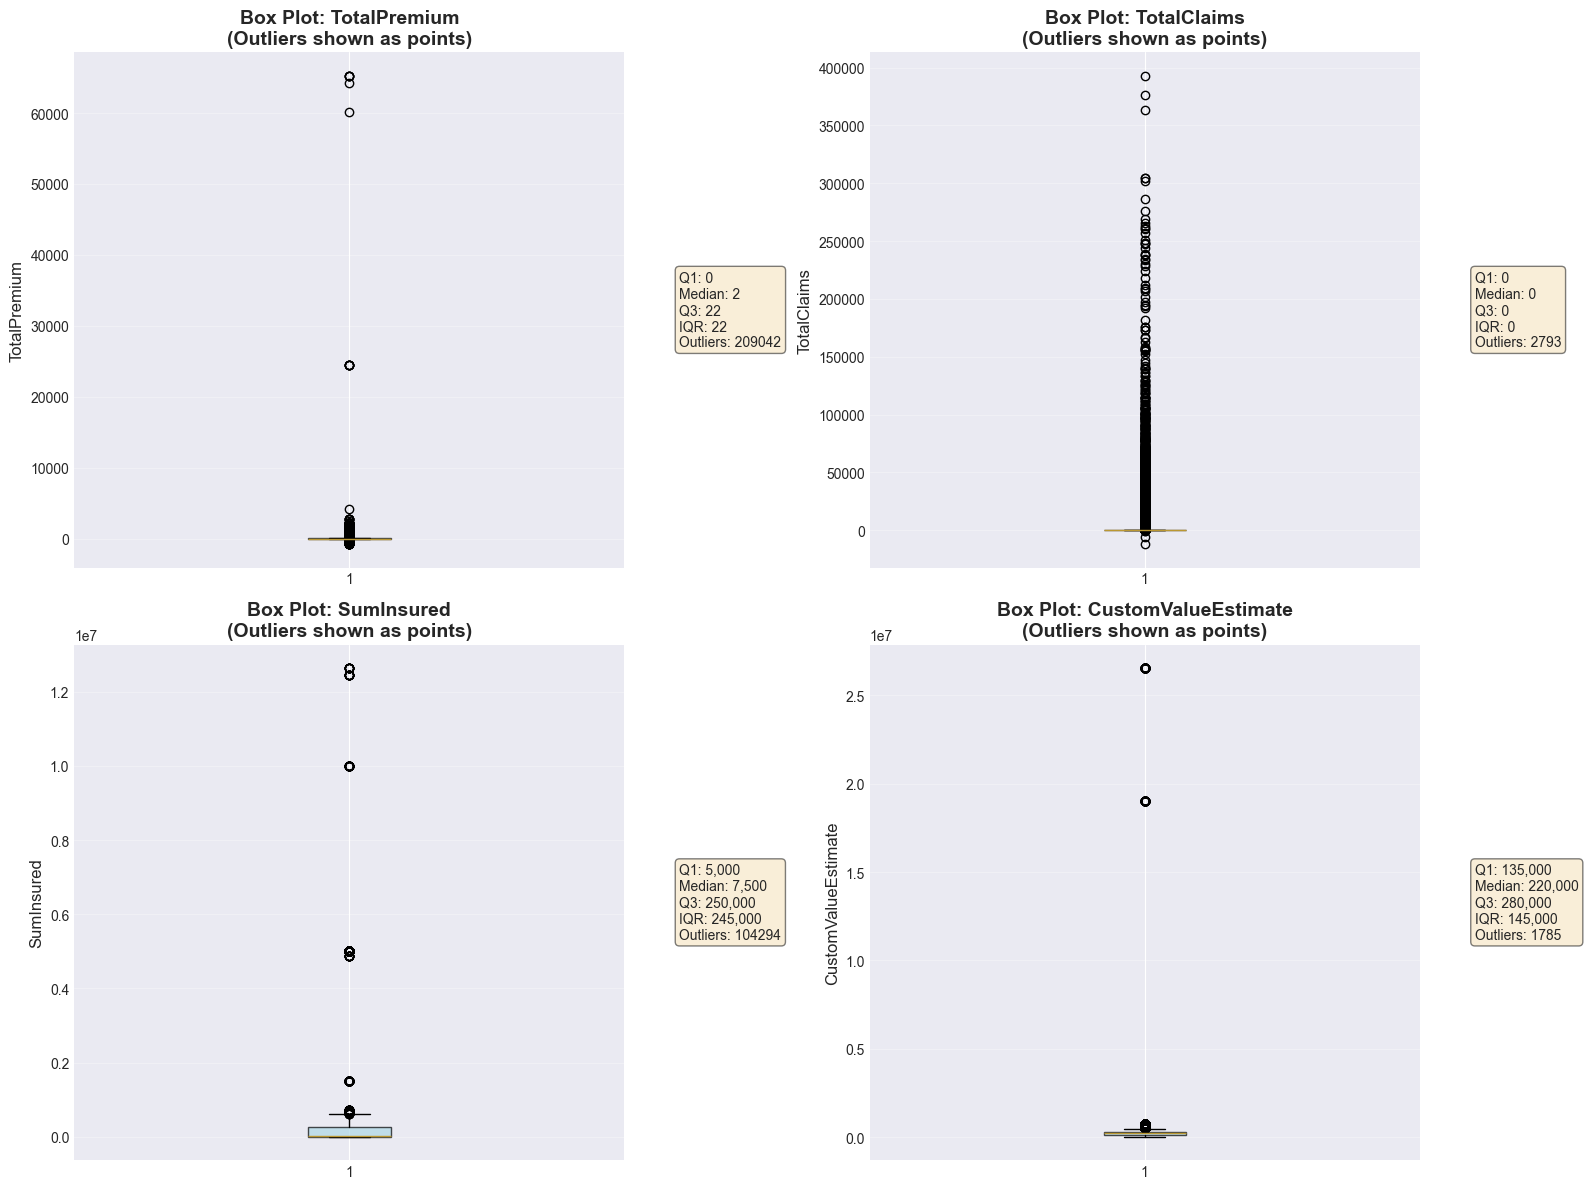

✓ Box plots created - outliers are shown as individual points


In [23]:
# Univariate Analysis: Numerical Columns - Box Plots
if not df.empty:
    print("=" * 80)
    print("BOX PLOTS - OUTLIER DETECTION FOR NUMERICAL COLUMNS")
    print("=" * 80)
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    key_financial = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate']
    key_numeric = [col for col in key_financial if col in numeric_cols]
    
    if len(key_numeric) > 0:
        print(f"\nCreating box plots for {len(key_numeric)} key financial variables...")
        
        n_cols = min(2, len(key_numeric))
        n_rows = (len(key_numeric) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows))
        axes = axes.flatten() if len(key_numeric) > 1 else [axes]
        
        for idx, col in enumerate(key_numeric):
            ax = axes[idx]
            data = df[col].dropna()
            
            if len(data) > 0:
                bp = ax.boxplot(data, vert=True, patch_artist=True)
                bp['boxes'][0].set_facecolor('lightblue')
                bp['boxes'][0].set_alpha(0.7)
                
                ax.set_title(f'Box Plot: {col}\n(Outliers shown as points)', 
                           fontsize=14, fontweight='bold')
                ax.set_ylabel(col, fontsize=12)
                ax.grid(axis='y', alpha=0.3)
                
                # Add statistics
                q1 = data.quantile(0.25)
                median = data.median()
                q3 = data.quantile(0.75)
                iqr = q3 - q1
                outliers = data[(data < q1 - 1.5*iqr) | (data > q3 + 1.5*iqr)]
                
                stats_text = f'Q1: {q1:,.0f}\nMedian: {median:,.0f}\nQ3: {q3:,.0f}\nIQR: {iqr:,.0f}\nOutliers: {len(outliers)}'
                ax.text(1.1, 0.5, stats_text, transform=ax.transAxes, 
                       fontsize=10, verticalalignment='center',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        for idx in range(len(key_numeric), len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()
        print("✓ Box plots created - outliers are shown as individual points")
    else:
        print("Key financial columns not found.")


UNIVARIATE ANALYSIS - CATEGORICAL COLUMNS

Analyzing 5 categorical columns...


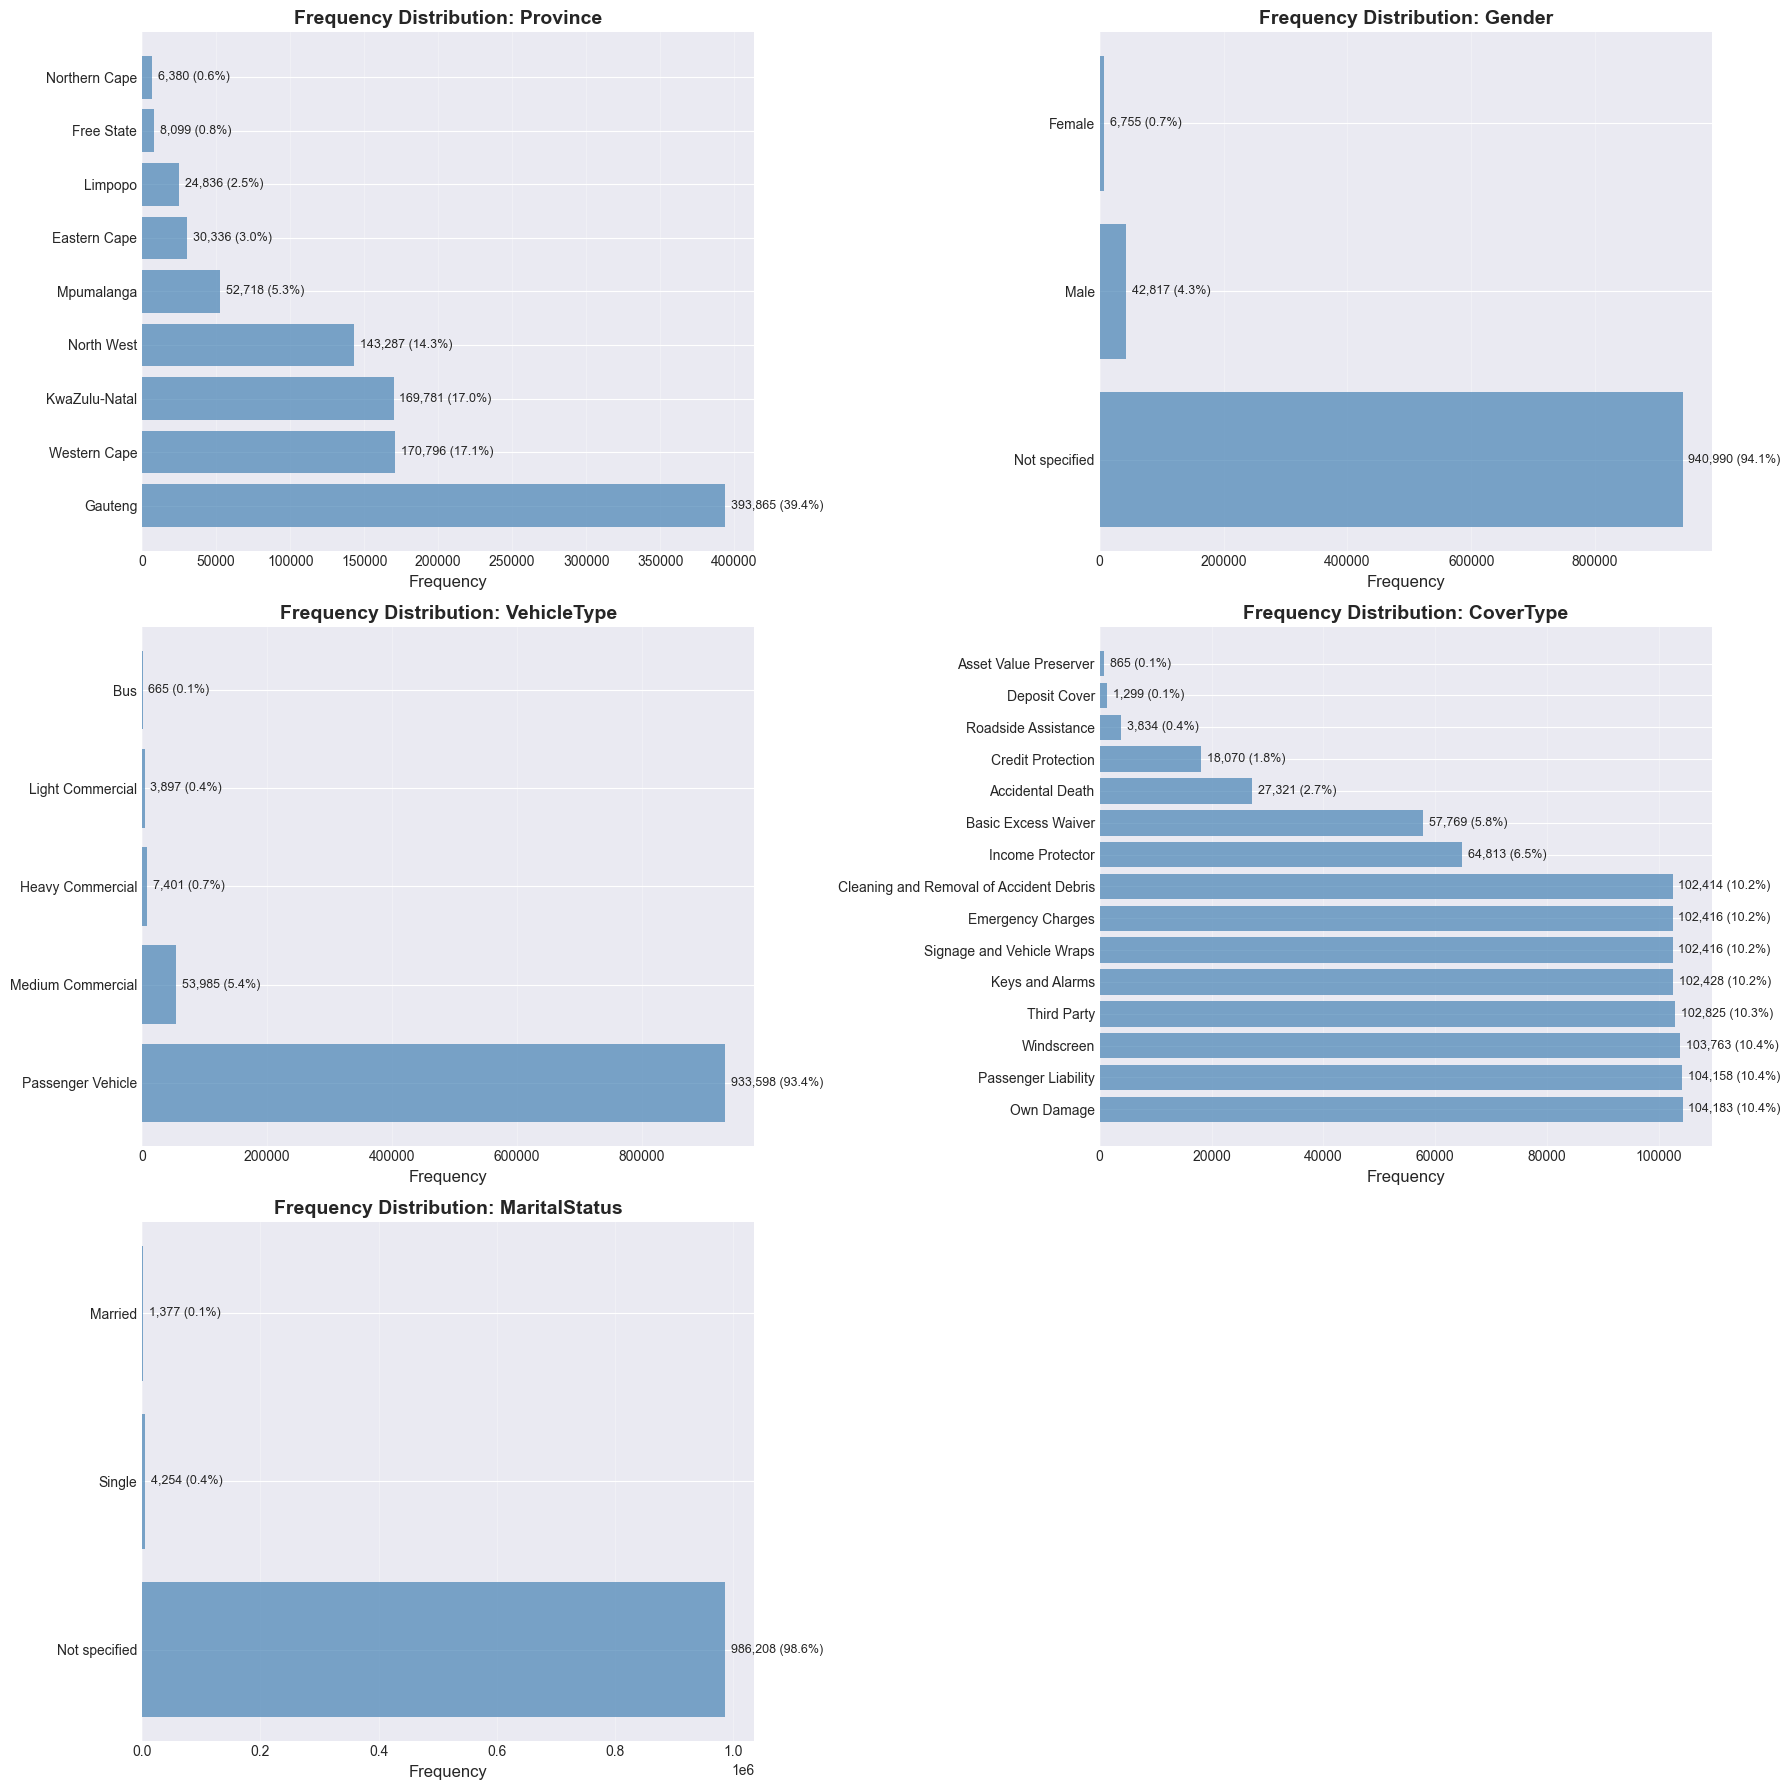


VALUE COUNTS FOR KEY CATEGORICAL COLUMNS

Province:
--------------------------------------------------------------------------------
  Gauteng: 393,865 (39.38%)
  Western Cape: 170,796 (17.08%)
  KwaZulu-Natal: 169,781 (16.98%)
  North West: 143,287 (14.33%)
  Mpumalanga: 52,718 (5.27%)
  Eastern Cape: 30,336 (3.03%)
  Limpopo: 24,836 (2.48%)
  Free State: 8,099 (0.81%)
  Northern Cape: 6,380 (0.64%)

Gender:
--------------------------------------------------------------------------------
  Not specified: 940,990 (94.09%)
  Male: 42,817 (4.28%)
  Female: 6,755 (0.68%)

VehicleType:
--------------------------------------------------------------------------------
  Passenger Vehicle: 933,598 (93.35%)
  Medium Commercial: 53,985 (5.40%)
  Heavy Commercial: 7,401 (0.74%)
  Light Commercial: 3,897 (0.39%)
  Bus: 665 (0.07%)

CoverType:
--------------------------------------------------------------------------------
  Own Damage: 104,183 (10.42%)
  Passenger Liability: 104,158 (10.41%)
  Wi

In [24]:
# Univariate Analysis: Categorical Columns - Bar Charts and Value Counts
if not df.empty:
    print("=" * 80)
    print("UNIVARIATE ANALYSIS - CATEGORICAL COLUMNS")
    print("=" * 80)
    
    # Get categorical columns
    categorical_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
    
    # Focus on key categorical columns
    key_categorical = ['Province', 'Gender', 'VehicleType', 'CoverType', 'MaritalStatus']
    key_cat = [col for col in key_categorical if col in categorical_cols]
    
    if len(key_cat) == 0:
        # If key columns not found, use first few categorical columns
        key_cat = categorical_cols[:5]
    
    if len(key_cat) > 0:
        print(f"\nAnalyzing {len(key_cat)} categorical columns...")
        
        # Create subplots
        n_cols = 2
        n_rows = (len(key_cat) + 1) // 2
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
        axes = axes.flatten() if len(key_cat) > 1 else [axes]
        
        for idx, col in enumerate(key_cat):
            ax = axes[idx]
            
            # Get value counts
            value_counts = df[col].value_counts().head(15)  # Top 15 categories
            
            if len(value_counts) > 0:
                # Create bar chart
                bars = ax.barh(range(len(value_counts)), value_counts.values, color='steelblue', alpha=0.7)
                ax.set_yticks(range(len(value_counts)))
                ax.set_yticklabels(value_counts.index, fontsize=10)
                ax.set_xlabel('Frequency', fontsize=12)
                ax.set_title(f'Frequency Distribution: {col}', fontsize=14, fontweight='bold')
                ax.grid(axis='x', alpha=0.3)
                
                # Add value labels
                for i, v in enumerate(value_counts.values):
                    ax.text(v + max(value_counts.values) * 0.01, i, 
                           f'{v:,} ({v/len(df)*100:.1f}%)',
                           va='center', fontsize=9)
        
        # Hide unused subplots
        for idx in range(len(key_cat), len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()
        
        # Print value counts table
        print("\n" + "=" * 80)
        print("VALUE COUNTS FOR KEY CATEGORICAL COLUMNS")
        print("=" * 80)
        for col in key_cat:
            print(f"\n{col}:")
            print("-" * 80)
            value_counts = df[col].value_counts()
            for val, count in value_counts.head(10).items():
                pct = (count / len(df) * 100)
                print(f"  {val}: {count:,} ({pct:.2f}%)")
            if len(value_counts) > 10:
                print(f"  ... and {len(value_counts) - 10} more categories")
        
        print("\n✓ Bar charts and value counts created")
    else:
        print("No categorical columns found for analysis.")


## Step 4: Bivariate/Multivariate Analysis

Bivariate analysis examines relationships between two variables, while multivariate analysis looks at multiple variables together.

### 4.1 Correlation Analysis
- **Correlation Matrix**: Shows how variables relate to each other
- **Focus**: Relationships like `TotalPremium` vs `TotalClaims`


CORRELATION ANALYSIS - NUMERICAL VARIABLES

Calculated correlations for 15 numerical variables


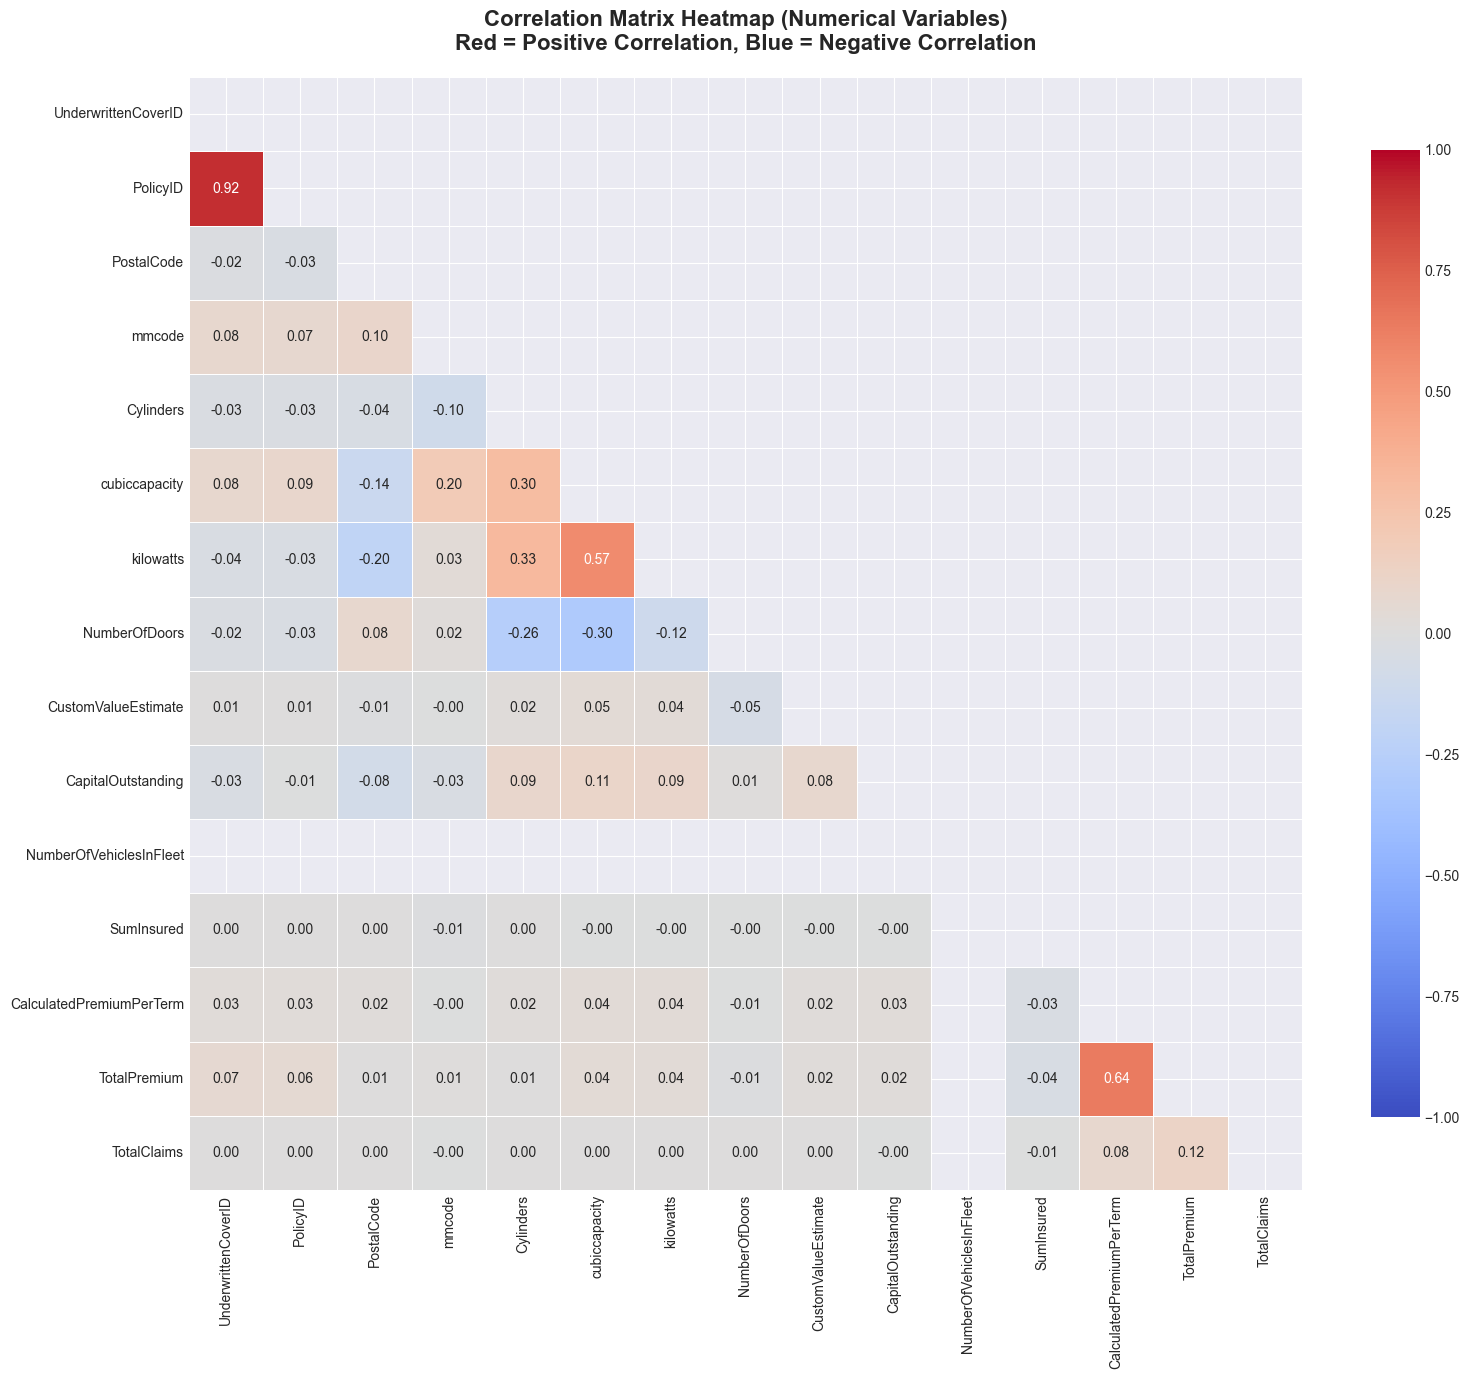

✓ Correlation heatmap created


In [25]:
# Correlation Matrix - All Numerical Variables
if not df.empty:
    print("=" * 80)
    print("CORRELATION ANALYSIS - NUMERICAL VARIABLES")
    print("=" * 80)
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if len(numeric_cols) > 0:
        # Calculate correlation matrix
        corr_matrix = df[numeric_cols].corr()
        
        print(f"\nCalculated correlations for {len(numeric_cols)} numerical variables")
        
        # Create heatmap
        plt.figure(figsize=(16, 14))
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
        
        sns.heatmap(corr_matrix, 
                   mask=mask,
                   annot=True, 
                   fmt='.2f', 
                   cmap='coolwarm', 
                   center=0,
                   square=True,
                   linewidths=0.5,
                   cbar_kws={"shrink": 0.8},
                   vmin=-1, vmax=1)
        
        plt.title('Correlation Matrix Heatmap (Numerical Variables)\n' + 
                'Red = Positive Correlation, Blue = Negative Correlation', 
                fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
        
        print("✓ Correlation heatmap created")
    else:
        print("No numerical columns found for correlation analysis.")


FOCUSED ANALYSIS: TotalPremium vs TotalClaims

Correlation Coefficient: 0.1216
Relationship: Very Weak Positive correlation

Sampling 10,000 rows for visualization


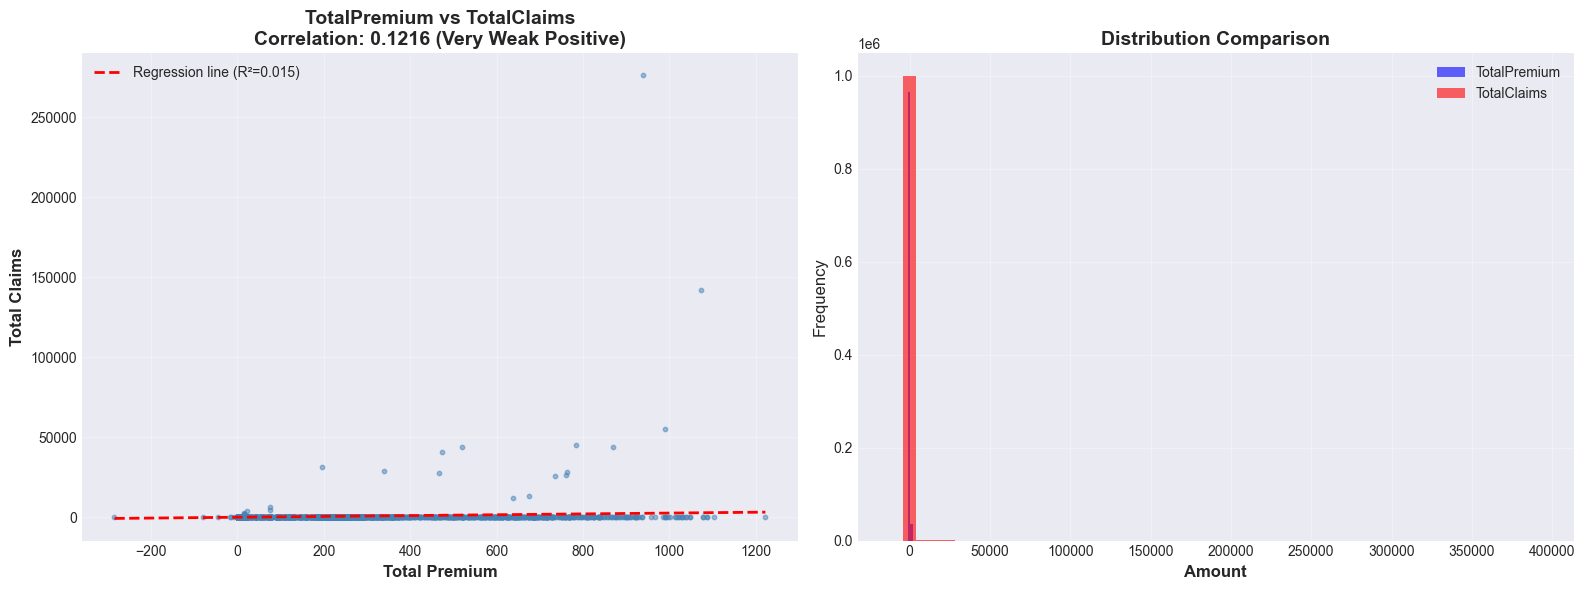


--------------------------------------------------------------------------------
Summary Statistics:
--------------------------------------------------------------------------------
TotalPremium - Mean: 61.91, Median: 2.18
TotalClaims - Mean: 64.86, Median: 0.00
Loss Ratio (TotalClaims/TotalPremium): 104.77%

✓ Scatter plot and distribution comparison created


In [26]:
# Focus: TotalPremium vs TotalClaims Relationship
if not df.empty:
    print("=" * 80)
    print("FOCUSED ANALYSIS: TotalPremium vs TotalClaims")
    print("=" * 80)
    
    if 'TotalPremium' in df.columns and 'TotalClaims' in df.columns:
        # Calculate correlation
        correlation = df['TotalPremium'].corr(df['TotalClaims'])
        
        print(f"\nCorrelation Coefficient: {correlation:.4f}")
        
        if abs(correlation) > 0.7:
            strength = "Strong"
        elif abs(correlation) > 0.4:
            strength = "Moderate"
        elif abs(correlation) > 0.2:
            strength = "Weak"
        else:
            strength = "Very Weak"
        
        direction = "Positive" if correlation > 0 else "Negative"
        print(f"Relationship: {strength} {direction} correlation")
        
        # Create scatter plot
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Scatter plot
        ax1 = axes[0]
        sample_size = min(10000, len(df))
        if len(df) > sample_size:
            df_sample = df.sample(n=sample_size, random_state=42)
            print(f"\nSampling {sample_size:,} rows for visualization")
        else:
            df_sample = df
        
        ax1.scatter(df_sample['TotalPremium'], df_sample['TotalClaims'], 
                   alpha=0.5, s=10, color='steelblue')
        ax1.set_xlabel('Total Premium', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Total Claims', fontsize=12, fontweight='bold')
        ax1.set_title(f'TotalPremium vs TotalClaims\nCorrelation: {correlation:.4f} ({strength} {direction})', 
                     fontsize=14, fontweight='bold')
        ax1.grid(alpha=0.3)
        
        # Add regression line
        from scipy import stats
        x = df_sample['TotalPremium'].dropna()
        y = df_sample['TotalClaims'].dropna()
        common_idx = x.index.intersection(y.index)
        if len(common_idx) > 0:
            x_common = x.loc[common_idx]
            y_common = y.loc[common_idx]
            slope, intercept, r_value, p_value, std_err = stats.linregress(x_common, y_common)
            line_x = np.linspace(x_common.min(), x_common.max(), 100)
            line_y = slope * line_x + intercept
            ax1.plot(line_x, line_y, 'r--', linewidth=2, label=f'Regression line (R²={r_value**2:.3f})')
            ax1.legend()
        
        # Distribution comparison
        ax2 = axes[1]
        ax2.hist(df['TotalPremium'].dropna(), bins=50, alpha=0.6, label='TotalPremium', color='blue')
        ax2.hist(df['TotalClaims'].dropna(), bins=50, alpha=0.6, label='TotalClaims', color='red')
        ax2.set_xlabel('Amount', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Frequency', fontsize=12)
        ax2.set_title('Distribution Comparison', fontsize=14, fontweight='bold')
        ax2.legend()
        ax2.grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Summary statistics
        print("\n" + "-" * 80)
        print("Summary Statistics:")
        print("-" * 80)
        print(f"TotalPremium - Mean: {df['TotalPremium'].mean():,.2f}, Median: {df['TotalPremium'].median():,.2f}")
        print(f"TotalClaims - Mean: {df['TotalClaims'].mean():,.2f}, Median: {df['TotalClaims'].median():,.2f}")
        print(f"Loss Ratio (TotalClaims/TotalPremium): {(df['TotalClaims'].sum() / df['TotalPremium'].sum() * 100):.2f}%")
        
        print("\n✓ Scatter plot and distribution comparison created")
    else:
        print("TotalPremium or TotalClaims columns not found in dataset.")


## Step 5: Temporal Analysis

Time series analysis examines how variables change over time. This is crucial for understanding trends, seasonality, and patterns in insurance data.

### 5.1 Time Series of Claims and Premiums
- Analyze claims and premiums over `TransactionMonth`
- Identify trends and seasonality
- Examine changes over the 18-month period (Feb 2014 - Aug 2015)


TEMPORAL ANALYSIS - TIME SERIES

Analyzing 23 months of data
Date range: 2013-10 to 2015-08


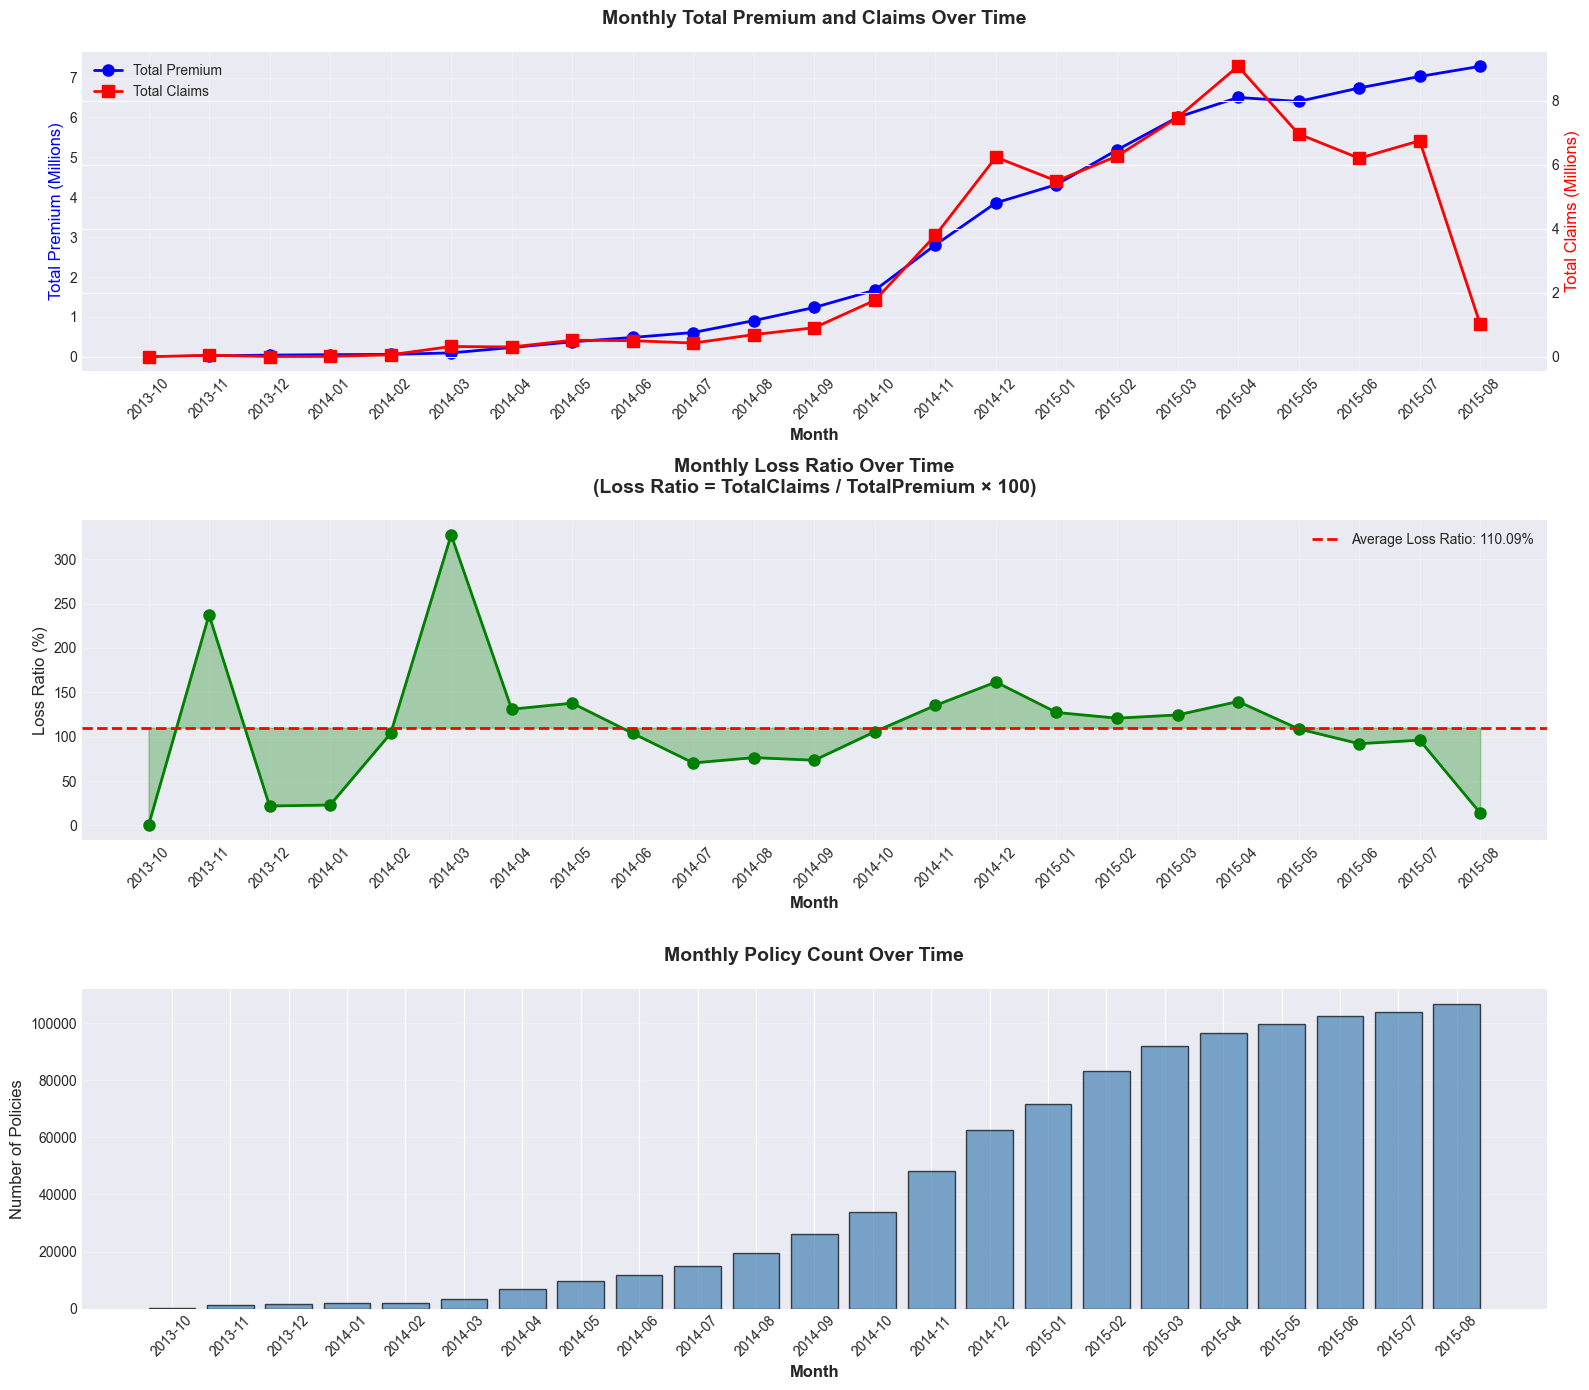


TEMPORAL ANALYSIS SUMMARY

Overall Statistics:
  - Average Monthly Premium: 2.69 Million
  - Average Monthly Claims: 2.82 Million
  - Average Loss Ratio: 110.09%
  - Average Monthly Policies: 43,483

Trend Analysis:
  - Premium Trend: Increasing (0.39M per month)
  - Claims Trend: Increasing (0.37M per month)
  - Loss Ratio Trend: Decreasing (-0.658% per month)

✓ Time series analysis completed


In [27]:
# Temporal Analysis: Time Series of Claims and Premiums
if not df.empty and 'TransactionMonth' in df.columns:
    print("=" * 80)
    print("TEMPORAL ANALYSIS - TIME SERIES")
    print("=" * 80)
    
    # Ensure TransactionMonth is datetime
    if not pd.api.types.is_datetime64_any_dtype(df['TransactionMonth']):
        df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
    
    # Aggregate by month
    df['YearMonth'] = df['TransactionMonth'].dt.to_period('M')
    
    # Calculate monthly aggregates
    monthly_stats = df.groupby('YearMonth').agg({
        'TotalPremium': ['sum', 'mean', 'count'],
        'TotalClaims': ['sum', 'mean']
    }).reset_index()
    
    monthly_stats.columns = ['YearMonth', 'TotalPremium_Sum', 'TotalPremium_Mean', 
                            'PolicyCount', 'TotalClaims_Sum', 'TotalClaims_Mean']
    
    # Calculate loss ratio
    monthly_stats['LossRatio'] = (monthly_stats['TotalClaims_Sum'] / 
                                  monthly_stats['TotalPremium_Sum'] * 100)
    
    # Convert YearMonth to string for plotting
    monthly_stats['YearMonth_str'] = monthly_stats['YearMonth'].astype(str)
    
    print(f"\nAnalyzing {len(monthly_stats)} months of data")
    print(f"Date range: {monthly_stats['YearMonth'].min()} to {monthly_stats['YearMonth'].max()}")
    
    # Create time series plots
    fig, axes = plt.subplots(3, 1, figsize=(16, 14))
    
    # Plot 1: Total Premium and Claims over time
    ax1 = axes[0]
    ax1_twin = ax1.twinx()
    
    line1 = ax1.plot(monthly_stats['YearMonth_str'], monthly_stats['TotalPremium_Sum']/1e6, 
                    marker='o', linewidth=2, markersize=8, color='blue', label='Total Premium')
    line2 = ax1_twin.plot(monthly_stats['YearMonth_str'], monthly_stats['TotalClaims_Sum']/1e6, 
                         marker='s', linewidth=2, markersize=8, color='red', label='Total Claims')
    
    ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Total Premium (Millions)', fontsize=12, color='blue')
    ax1_twin.set_ylabel('Total Claims (Millions)', fontsize=12, color='red')
    ax1.set_title('Monthly Total Premium and Claims Over Time', fontsize=14, fontweight='bold', pad=20)
    ax1.grid(alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # Combine legends
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left')
    
    # Plot 2: Loss Ratio over time
    ax2 = axes[1]
    ax2.plot(monthly_stats['YearMonth_str'], monthly_stats['LossRatio'], 
            marker='o', linewidth=2, markersize=8, color='green')
    ax2.axhline(y=monthly_stats['LossRatio'].mean(), color='red', linestyle='--', 
               linewidth=2, label=f'Average Loss Ratio: {monthly_stats["LossRatio"].mean():.2f}%')
    ax2.fill_between(monthly_stats['YearMonth_str'], monthly_stats['LossRatio'], 
                     monthly_stats['LossRatio'].mean(), alpha=0.3, color='green')
    ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Loss Ratio (%)', fontsize=12)
    ax2.set_title('Monthly Loss Ratio Over Time\n(Loss Ratio = TotalClaims / TotalPremium × 100)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax2.grid(alpha=0.3)
    ax2.legend()
    ax2.tick_params(axis='x', rotation=45)
    
    # Plot 3: Policy Count over time
    ax3 = axes[2]
    ax3.bar(monthly_stats['YearMonth_str'], monthly_stats['PolicyCount'], 
           color='steelblue', alpha=0.7, edgecolor='black')
    ax3.set_xlabel('Month', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Number of Policies', fontsize=12)
    ax3.set_title('Monthly Policy Count Over Time', fontsize=14, fontweight='bold', pad=20)
    ax3.grid(axis='y', alpha=0.3)
    ax3.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n" + "=" * 80)
    print("TEMPORAL ANALYSIS SUMMARY")
    print("=" * 80)
    print(f"\nOverall Statistics:")
    print(f"  - Average Monthly Premium: {monthly_stats['TotalPremium_Sum'].mean()/1e6:.2f} Million")
    print(f"  - Average Monthly Claims: {monthly_stats['TotalClaims_Sum'].mean()/1e6:.2f} Million")
    print(f"  - Average Loss Ratio: {monthly_stats['LossRatio'].mean():.2f}%")
    print(f"  - Average Monthly Policies: {monthly_stats['PolicyCount'].mean():,.0f}")
    
    print(f"\nTrend Analysis:")
    # Calculate trend (simple linear regression on time)
    x = np.arange(len(monthly_stats))
    premium_trend = np.polyfit(x, monthly_stats['TotalPremium_Sum'], 1)[0]
    claims_trend = np.polyfit(x, monthly_stats['TotalClaims_Sum'], 1)[0]
    loss_ratio_trend = np.polyfit(x, monthly_stats['LossRatio'], 1)[0]
    
    print(f"  - Premium Trend: {'Increasing' if premium_trend > 0 else 'Decreasing'} ({premium_trend/1e6:.2f}M per month)")
    print(f"  - Claims Trend: {'Increasing' if claims_trend > 0 else 'Decreasing'} ({claims_trend/1e6:.2f}M per month)")
    print(f"  - Loss Ratio Trend: {'Increasing' if loss_ratio_trend > 0 else 'Decreasing'} ({loss_ratio_trend:.3f}% per month)")
    
    print("\n✓ Time series analysis completed")
else:
    print("TransactionMonth column not found or dataset is empty.")


GEOGRAPHIC ANALYSIS - BY PROVINCE

Analyzing 9 provinces


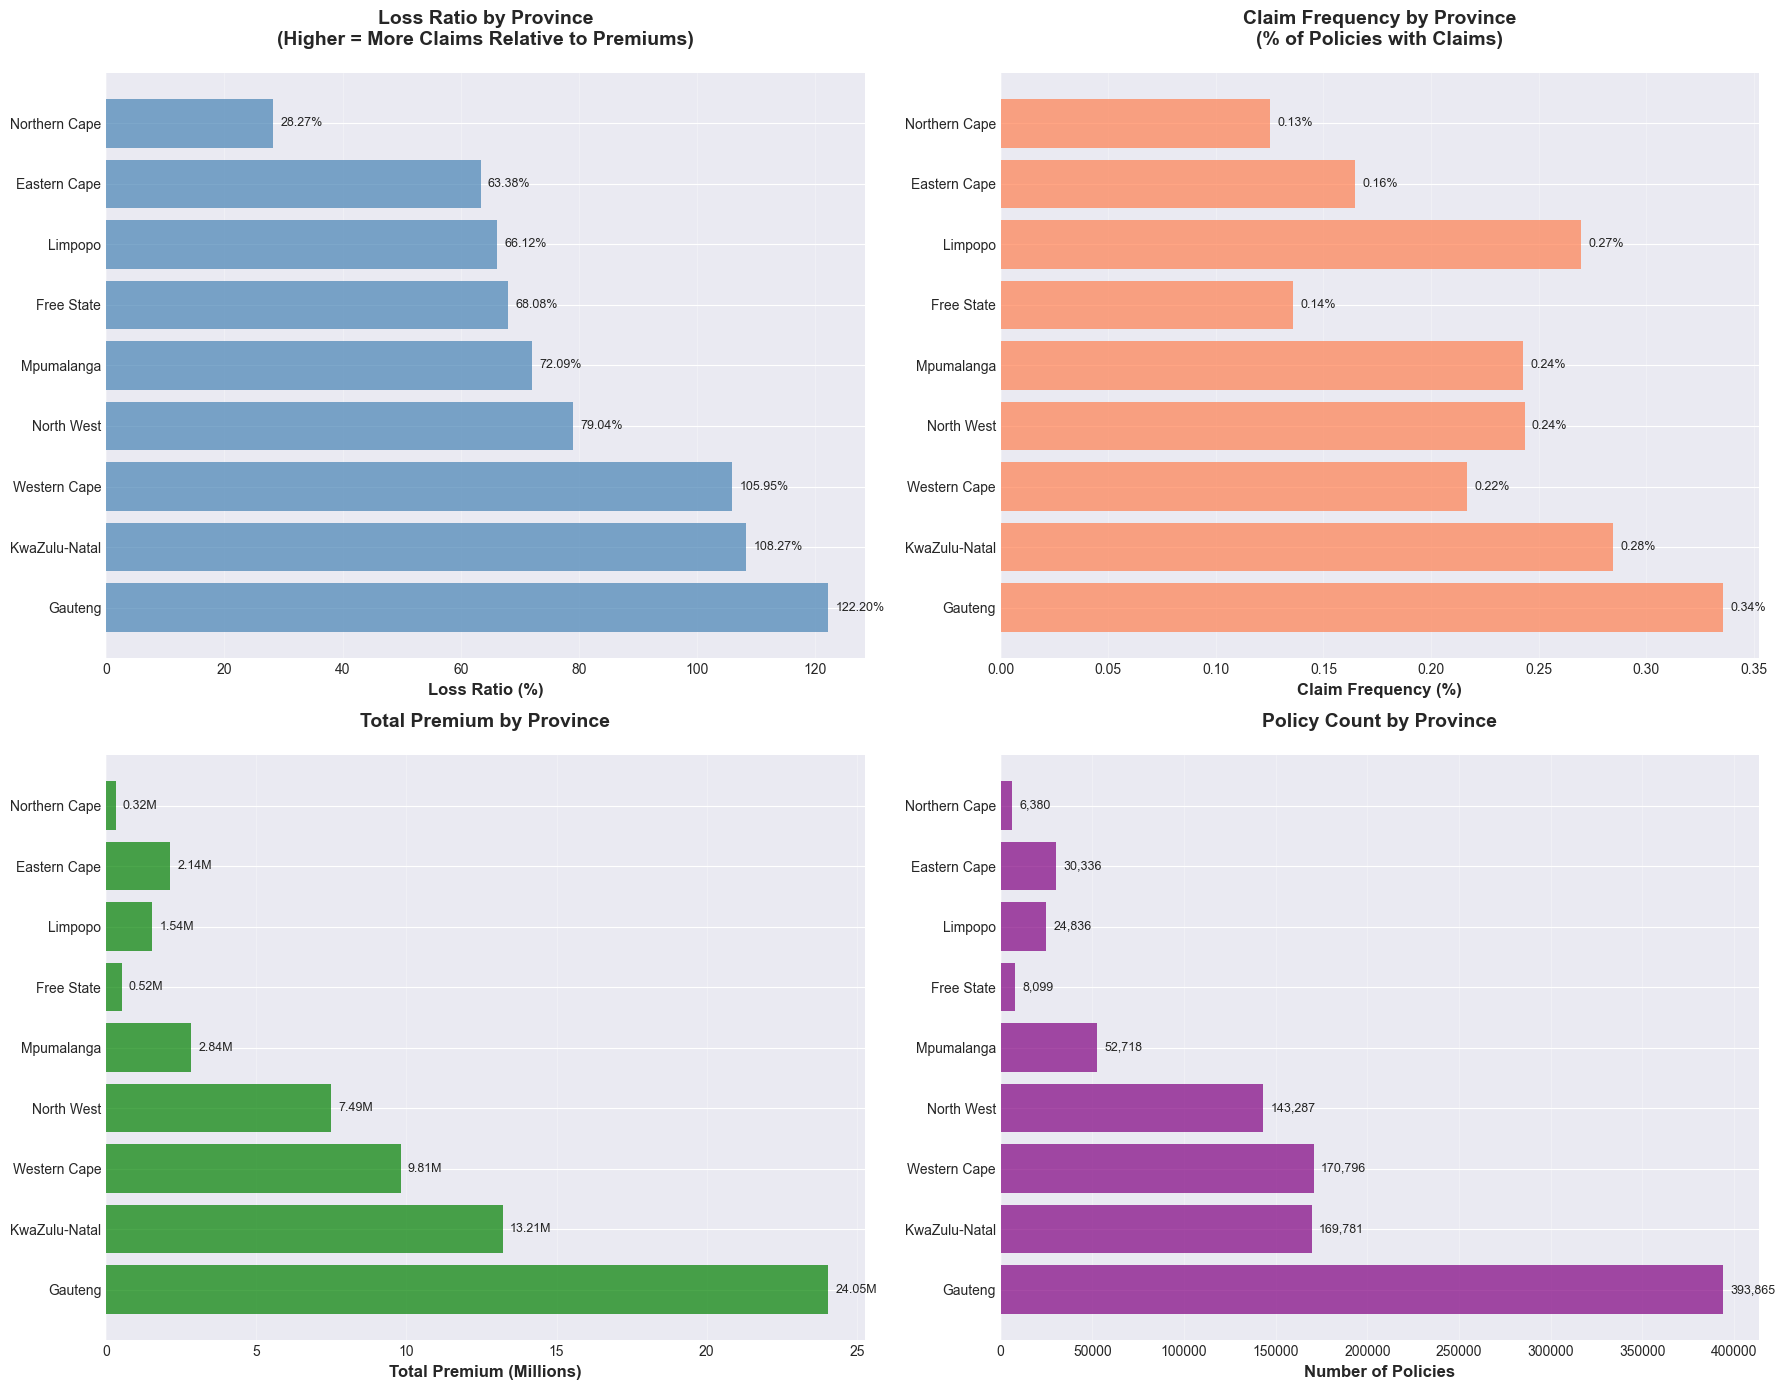


PROVINCE-LEVEL SUMMARY STATISTICS


,Province,TotalPremium_Sum,TotalPremium_Mean,PolicyCount,TotalClaims_Sum,TotalClaims_Mean,LossRatio,ClaimFrequency
2,Gauteng,24053774.58,61.07,393865,29394148.48,74.63,122.20,0.34
3,KwaZulu-Natal,13209079.81,77.80,169781,14301382.45,84.23,108.27,0.28
8,Western Cape,9806558.53,57.42,170796,10389773.74,60.83,105.95,0.22
6,North West,7490508.18,52.28,143287,5920250.00,41.32,79.04,0.24
5,Mpumalanga,2836291.94,53.80,52718,2044675.36,38.79,72.09,0.24
1,Free State,521363.24,64.37,8099,354922.27,43.82,68.08,0.14
4,Limpopo,1537324.50,61.90,24836,1016476.71,40.93,66.12,0.27
0,Eastern Cape,2140103.83,70.55,30336,1356426.66,44.71,63.38,0.16
7,Northern Cape,316558.07,49.62,6380,89490.51,14.03,28.27,0.13



✓ Province analysis completed


In [28]:
# Geographic Analysis: By Province
if not df.empty and 'Province' in df.columns:
    print("=" * 80)
    print("GEOGRAPHIC ANALYSIS - BY PROVINCE")
    print("=" * 80)
    
    # Calculate province-level statistics
    province_stats = df.groupby('Province').agg({
        'TotalPremium': ['sum', 'mean', 'count'],
        'TotalClaims': ['sum', 'mean']
    }).reset_index()
    
    province_stats.columns = ['Province', 'TotalPremium_Sum', 'TotalPremium_Mean', 
                              'PolicyCount', 'TotalClaims_Sum', 'TotalClaims_Mean']
    
    # Calculate loss ratio and claim frequency
    province_stats['LossRatio'] = (province_stats['TotalClaims_Sum'] / 
                                   province_stats['TotalPremium_Sum'] * 100)
    
    # Claim frequency = policies with claims / total policies
    province_claims = df.groupby('Province').apply(
        lambda x: (x['TotalClaims'] > 0).sum() / len(x) * 100
    ).reset_index()
    province_claims.columns = ['Province', 'ClaimFrequency']
    province_stats = province_stats.merge(province_claims, on='Province')
    
    # Sort by loss ratio
    province_stats = province_stats.sort_values('LossRatio', ascending=False)
    
    print(f"\nAnalyzing {len(province_stats)} provinces")
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    
    # Plot 1: Loss Ratio by Province
    ax1 = axes[0, 0]
    bars1 = ax1.barh(range(len(province_stats)), province_stats['LossRatio'], 
                    color='steelblue', alpha=0.7)
    ax1.set_yticks(range(len(province_stats)))
    ax1.set_yticklabels(province_stats['Province'])
    ax1.set_xlabel('Loss Ratio (%)', fontsize=12, fontweight='bold')
    ax1.set_title('Loss Ratio by Province\n(Higher = More Claims Relative to Premiums)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax1.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(province_stats['LossRatio']):
        ax1.text(v + max(province_stats['LossRatio']) * 0.01, i, f'{v:.2f}%', 
                va='center', fontsize=9)
    
    # Plot 2: Claim Frequency by Province
    ax2 = axes[0, 1]
    bars2 = ax2.barh(range(len(province_stats)), province_stats['ClaimFrequency'], 
                    color='coral', alpha=0.7)
    ax2.set_yticks(range(len(province_stats)))
    ax2.set_yticklabels(province_stats['Province'])
    ax2.set_xlabel('Claim Frequency (%)', fontsize=12, fontweight='bold')
    ax2.set_title('Claim Frequency by Province\n(% of Policies with Claims)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax2.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(province_stats['ClaimFrequency']):
        ax2.text(v + max(province_stats['ClaimFrequency']) * 0.01, i, f'{v:.2f}%', 
                va='center', fontsize=9)
    
    # Plot 3: Total Premium by Province
    ax3 = axes[1, 0]
    bars3 = ax3.barh(range(len(province_stats)), province_stats['TotalPremium_Sum']/1e6, 
                    color='green', alpha=0.7)
    ax3.set_yticks(range(len(province_stats)))
    ax3.set_yticklabels(province_stats['Province'])
    ax3.set_xlabel('Total Premium (Millions)', fontsize=12, fontweight='bold')
    ax3.set_title('Total Premium by Province', fontsize=14, fontweight='bold', pad=20)
    ax3.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(province_stats['TotalPremium_Sum']/1e6):
        ax3.text(v + max(province_stats['TotalPremium_Sum']/1e6) * 0.01, i, f'{v:.2f}M', 
                va='center', fontsize=9)
    
    # Plot 4: Policy Count by Province
    ax4 = axes[1, 1]
    bars4 = ax4.barh(range(len(province_stats)), province_stats['PolicyCount'], 
                    color='purple', alpha=0.7)
    ax4.set_yticks(range(len(province_stats)))
    ax4.set_yticklabels(province_stats['Province'])
    ax4.set_xlabel('Number of Policies', fontsize=12, fontweight='bold')
    ax4.set_title('Policy Count by Province', fontsize=14, fontweight='bold', pad=20)
    ax4.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(province_stats['PolicyCount']):
        ax4.text(v + max(province_stats['PolicyCount']) * 0.01, i, f'{v:,}', 
                va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary table
    print("\n" + "=" * 80)
    print("PROVINCE-LEVEL SUMMARY STATISTICS")
    print("=" * 80)
    display(province_stats.round(2))
    
    print("\n✓ Province analysis completed")
else:
    print("Province column not found in dataset.")


GEOGRAPHIC ANALYSIS - BY ZIPCODE (POSTAL CODE)

Analyzing 687 zipcodes with at least 100 policies


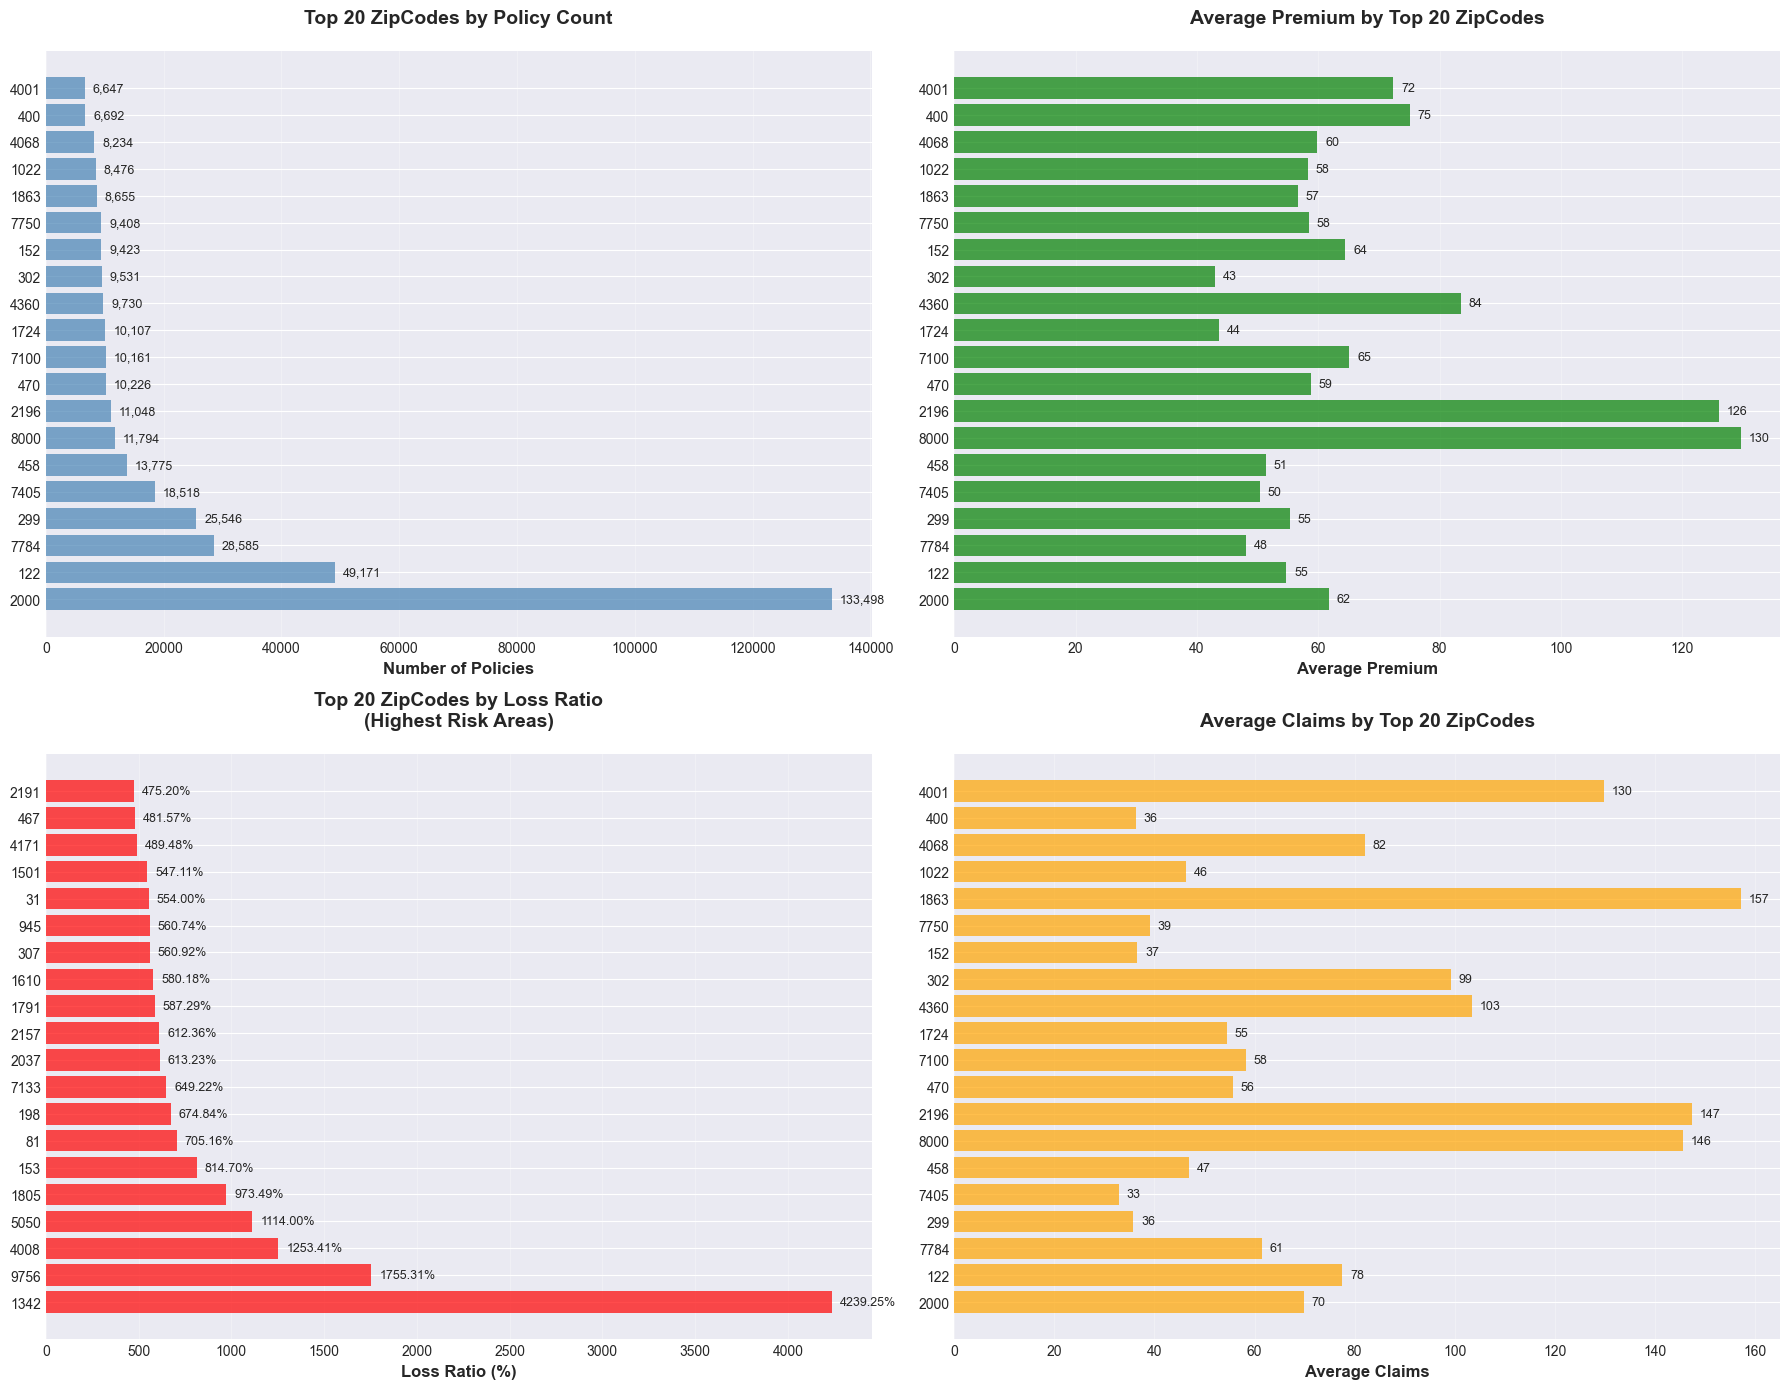


TOP 10 ZIPCODES BY POLICY COUNT


,PostalCode,PolicyCount,TotalPremium_Mean,TotalClaims_Mean,LossRatio
381,2000,133498,61.77,69.88,113.13
28,122,49171,54.71,77.57,141.79
810,7784,28585,48.02,61.49,128.05
76,299,25546,55.29,35.73,64.62
761,7405,18518,50.41,32.89,65.25
127,458,13775,51.38,46.83,91.15
828,8000,11794,129.63,145.66,112.37
424,2196,11048,126.02,147.37,116.93
134,470,10226,58.78,55.71,94.78
744,7100,10161,65.12,58.32,89.56



✓ ZipCode analysis completed


In [29]:
# Geographic Analysis: By ZipCode (Top ZipCodes)
if not df.empty and 'PostalCode' in df.columns:
    print("=" * 80)
    print("GEOGRAPHIC ANALYSIS - BY ZIPCODE (POSTAL CODE)")
    print("=" * 80)
    
    # Calculate zipcode-level statistics
    zipcode_stats = df.groupby('PostalCode').agg({
        'TotalPremium': ['sum', 'mean', 'count'],
        'TotalClaims': ['sum', 'mean']
    }).reset_index()
    
    zipcode_stats.columns = ['PostalCode', 'TotalPremium_Sum', 'TotalPremium_Mean', 
                             'PolicyCount', 'TotalClaims_Sum', 'TotalClaims_Mean']
    
    # Calculate loss ratio
    zipcode_stats['LossRatio'] = (zipcode_stats['TotalClaims_Sum'] / 
                                  zipcode_stats['TotalPremium_Sum'] * 100)
    
    # Filter to zipcodes with significant number of policies (at least 100)
    zipcode_stats = zipcode_stats[zipcode_stats['PolicyCount'] >= 100]
    zipcode_stats = zipcode_stats.sort_values('PolicyCount', ascending=False)
    
    print(f"\nAnalyzing {len(zipcode_stats)} zipcodes with at least 100 policies")
    
    # Get top 20 zipcodes by policy count
    top_zipcodes = zipcode_stats.head(20)
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    
    # Plot 1: Top ZipCodes by Policy Count
    ax1 = axes[0, 0]
    bars1 = ax1.barh(range(len(top_zipcodes)), top_zipcodes['PolicyCount'], 
                    color='steelblue', alpha=0.7)
    ax1.set_yticks(range(len(top_zipcodes)))
    ax1.set_yticklabels(top_zipcodes['PostalCode'].astype(str))
    ax1.set_xlabel('Number of Policies', fontsize=12, fontweight='bold')
    ax1.set_title('Top 20 ZipCodes by Policy Count', fontsize=14, fontweight='bold', pad=20)
    ax1.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(top_zipcodes['PolicyCount']):
        ax1.text(v + max(top_zipcodes['PolicyCount']) * 0.01, i, f'{v:,}', 
                va='center', fontsize=9)
    
    # Plot 2: Average Premium by Top ZipCodes
    ax2 = axes[0, 1]
    bars2 = ax2.barh(range(len(top_zipcodes)), top_zipcodes['TotalPremium_Mean'], 
                    color='green', alpha=0.7)
    ax2.set_yticks(range(len(top_zipcodes)))
    ax2.set_yticklabels(top_zipcodes['PostalCode'].astype(str))
    ax2.set_xlabel('Average Premium', fontsize=12, fontweight='bold')
    ax2.set_title('Average Premium by Top 20 ZipCodes', fontsize=14, fontweight='bold', pad=20)
    ax2.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(top_zipcodes['TotalPremium_Mean']):
        ax2.text(v + max(top_zipcodes['TotalPremium_Mean']) * 0.01, i, f'{v:,.0f}', 
                va='center', fontsize=9)
    
    # Plot 3: Loss Ratio by Top ZipCodes
    top_zipcodes_lr = zipcode_stats.sort_values('LossRatio', ascending=False).head(20)
    ax3 = axes[1, 0]
    bars3 = ax3.barh(range(len(top_zipcodes_lr)), top_zipcodes_lr['LossRatio'], 
                    color='red', alpha=0.7)
    ax3.set_yticks(range(len(top_zipcodes_lr)))
    ax3.set_yticklabels(top_zipcodes_lr['PostalCode'].astype(str))
    ax3.set_xlabel('Loss Ratio (%)', fontsize=12, fontweight='bold')
    ax3.set_title('Top 20 ZipCodes by Loss Ratio\n(Highest Risk Areas)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax3.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(top_zipcodes_lr['LossRatio']):
        ax3.text(v + max(top_zipcodes_lr['LossRatio']) * 0.01, i, f'{v:.2f}%', 
                va='center', fontsize=9)
    
    # Plot 4: Average Claims by Top ZipCodes
    ax4 = axes[1, 1]
    bars4 = ax4.barh(range(len(top_zipcodes)), top_zipcodes['TotalClaims_Mean'], 
                    color='orange', alpha=0.7)
    ax4.set_yticks(range(len(top_zipcodes)))
    ax4.set_yticklabels(top_zipcodes['PostalCode'].astype(str))
    ax4.set_xlabel('Average Claims', fontsize=12, fontweight='bold')
    ax4.set_title('Average Claims by Top 20 ZipCodes', fontsize=14, fontweight='bold', pad=20)
    ax4.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(top_zipcodes['TotalClaims_Mean']):
        ax4.text(v + max(top_zipcodes['TotalClaims_Mean']) * 0.01, i, f'{v:,.0f}', 
                va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary for top zipcodes
    print("\n" + "=" * 80)
    print("TOP 10 ZIPCODES BY POLICY COUNT")
    print("=" * 80)
    display(top_zipcodes.head(10)[['PostalCode', 'PolicyCount', 'TotalPremium_Mean', 
                                   'TotalClaims_Mean', 'LossRatio']].round(2))
    
    print("\n✓ ZipCode analysis completed")
else:
    print("PostalCode column not found in dataset.")


### Summary of Steps 3-6: Complete EDA Analysis

**Step 3 - Univariate Analysis:**
- ✓ Histograms created for numerical variables (distribution shapes)
- ✓ Box plots created for outlier detection
- ✓ Bar charts and value counts for categorical variables

**Step 4 - Bivariate/Multivariate Analysis:**
- ✓ Correlation matrix heatmap for all numerical variables
- ✓ Focused analysis of TotalPremium vs TotalClaims relationship
- ✓ Scatter plots and regression analysis

**Step 5 - Temporal Analysis:**
- ✓ Time series of claims and premiums over TransactionMonth
- ✓ Loss ratio trends over time
- ✓ Policy count trends
- ✓ Trend analysis (increasing/decreasing patterns)

**Step 6 - Geographic Analysis:**
- ✓ Province-level analysis (loss ratio, claim frequency, premiums)
- ✓ ZipCode-level analysis (premium patterns, claim amounts)
- ✓ Identification of high-risk and low-risk geographic areas

**Key Insights Generated:**
- Distribution patterns of key variables
- Outlier identification
- Correlation relationships
- Temporal trends and seasonality
- Geographic risk patterns

**Next Steps:**
- Use these insights for hypothesis testing (Task 3)
- Build predictive models (Task 4)
- Make business recommendations based on findings


## Step 7: Vehicle Analysis

Vehicle analysis helps identify which vehicles are associated with higher or lower risk, which is crucial for premium pricing and risk assessment.

### 7.1 Analysis by Make/Model
- Highest and lowest claim amounts by vehicle make/model
- Most and least risky vehicles
- Vehicle age vs claims relationship


In [30]:
# Vehicle Analysis: By Make/Model
if not df.empty:
    print("=" * 80)
    print("VEHICLE ANALYSIS - BY MAKE/MODEL")
    print("=" * 80)
    
    # Check for required columns
    has_make = 'Make' in df.columns
    has_model = 'Model' in df.columns
    has_claims = 'TotalClaims' in df.columns
    has_reg_year = 'RegistrationYear' in df.columns
    
    if has_make and has_claims:
        # Calculate vehicle make statistics
        make_stats = df.groupby('Make').agg({
            'TotalClaims': ['sum', 'mean', 'count'],
            'TotalPremium': ['sum', 'mean']
        }).reset_index()
        
        make_stats.columns = ['Make', 'TotalClaims_Sum', 'TotalClaims_Mean', 
                             'PolicyCount', 'TotalPremium_Sum', 'TotalPremium_Mean']
        
        # Calculate loss ratio by make
        make_stats['LossRatio'] = (make_stats['TotalClaims_Sum'] / 
                                   make_stats['TotalPremium_Sum'] * 100)
        
        # Filter to makes with at least 50 policies
        make_stats = make_stats[make_stats['PolicyCount'] >= 50]
        make_stats = make_stats.sort_values('TotalClaims_Mean', ascending=False)
        
        print(f"\nAnalyzing {len(make_stats)} vehicle makes (with at least 50 policies)")
        
        # Get highest and lowest claim amounts
        highest_claims = make_stats.sort_values('TotalClaims_Mean', ascending=False).head(10)
        lowest_claims = make_stats.sort_values('TotalClaims_Mean', ascending=True).head(10)
        
        # Get most and least risky (by loss ratio)
        most_risky = make_stats.sort_values('LossRatio', ascending=False).head(10)
        least_risky = make_stats.sort_values('LossRatio', ascending=True).head(10)
        
        # Create visualizations
        fig, axes = plt.subplots(2, 2, figsize=(18, 14))
        
        # Plot 1: Highest Average Claims by Make
        ax1 = axes[0, 0]
        bars1 = ax1.barh(range(len(highest_claims)), highest_claims['TotalClaims_Mean'], 
                        color='red', alpha=0.7)
        ax1.set_yticks(range(len(highest_claims)))
        ax1.set_yticklabels(highest_claims['Make'])
        ax1.set_xlabel('Average Claims', fontsize=12, fontweight='bold')
        ax1.set_title('Top 10 Makes by Average Claim Amount\n(Highest Claims)', 
                     fontsize=14, fontweight='bold', pad=20)
        ax1.grid(axis='x', alpha=0.3)
        
        for i, v in enumerate(highest_claims['TotalClaims_Mean']):
            ax1.text(v + max(highest_claims['TotalClaims_Mean']) * 0.01, i, f'{v:,.0f}', 
                    va='center', fontsize=9)
        
        # Plot 2: Lowest Average Claims by Make
        ax2 = axes[0, 1]
        bars2 = ax2.barh(range(len(lowest_claims)), lowest_claims['TotalClaims_Mean'], 
                        color='green', alpha=0.7)
        ax2.set_yticks(range(len(lowest_claims)))
        ax2.set_yticklabels(lowest_claims['Make'])
        ax2.set_xlabel('Average Claims', fontsize=12, fontweight='bold')
        ax2.set_title('Bottom 10 Makes by Average Claim Amount\n(Lowest Claims)', 
                     fontsize=14, fontweight='bold', pad=20)
        ax2.grid(axis='x', alpha=0.3)
        
        for i, v in enumerate(lowest_claims['TotalClaims_Mean']):
            ax2.text(v + max(lowest_claims['TotalClaims_Mean']) * 0.01, i, f'{v:,.0f}', 
                    va='center', fontsize=9)
        
        # Plot 3: Most Risky Makes (by Loss Ratio)
        ax3 = axes[1, 0]
        bars3 = ax3.barh(range(len(most_risky)), most_risky['LossRatio'], 
                        color='darkred', alpha=0.7)
        ax3.set_yticks(range(len(most_risky)))
        ax3.set_yticklabels(most_risky['Make'])
        ax3.set_xlabel('Loss Ratio (%)', fontsize=12, fontweight='bold')
        ax3.set_title('Top 10 Most Risky Makes\n(Highest Loss Ratio)', 
                     fontsize=14, fontweight='bold', pad=20)
        ax3.grid(axis='x', alpha=0.3)
        
        for i, v in enumerate(most_risky['LossRatio']):
            ax3.text(v + max(most_risky['LossRatio']) * 0.01, i, f'{v:.2f}%', 
                    va='center', fontsize=9)
        
        # Plot 4: Least Risky Makes (by Loss Ratio)
        ax4 = axes[1, 1]
        bars4 = ax4.barh(range(len(least_risky)), least_risky['LossRatio'], 
                        color='darkgreen', alpha=0.7)
        ax4.set_yticks(range(len(least_risky)))
        ax4.set_yticklabels(least_risky['Make'])
        ax4.set_xlabel('Loss Ratio (%)', fontsize=12, fontweight='bold')
        ax4.set_title('Top 10 Least Risky Makes\n(Lowest Loss Ratio)', 
                     fontsize=14, fontweight='bold', pad=20)
        ax4.grid(axis='x', alpha=0.3)
        
        for i, v in enumerate(least_risky['LossRatio']):
            ax4.text(v + max(least_risky['LossRatio']) * 0.01, i, f'{v:.2f}%', 
                    va='center', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        # Print summary tables
        print("\n" + "=" * 80)
        print("TOP 10 MAKES BY AVERAGE CLAIM AMOUNT")
        print("=" * 80)
        display(highest_claims[['Make', 'TotalClaims_Mean', 'PolicyCount', 'LossRatio']].round(2))
        
        print("\n" + "=" * 80)
        print("TOP 10 MOST RISKY MAKES (BY LOSS RATIO)")
        print("=" * 80)
        display(most_risky[['Make', 'LossRatio', 'TotalClaims_Mean', 'PolicyCount']].round(2))
        
        print("\n✓ Vehicle make analysis completed")
    else:
        print("Make or TotalClaims columns not found in dataset.")


VEHICLE ANALYSIS - BY MAKE/MODEL
Make or TotalClaims columns not found in dataset.


VEHICLE ANALYSIS - VEHICLE AGE VS CLAIMS

Analyzing vehicle age from 0 to 45 years
Analyzing 3 age groups (with at least 100 policies)


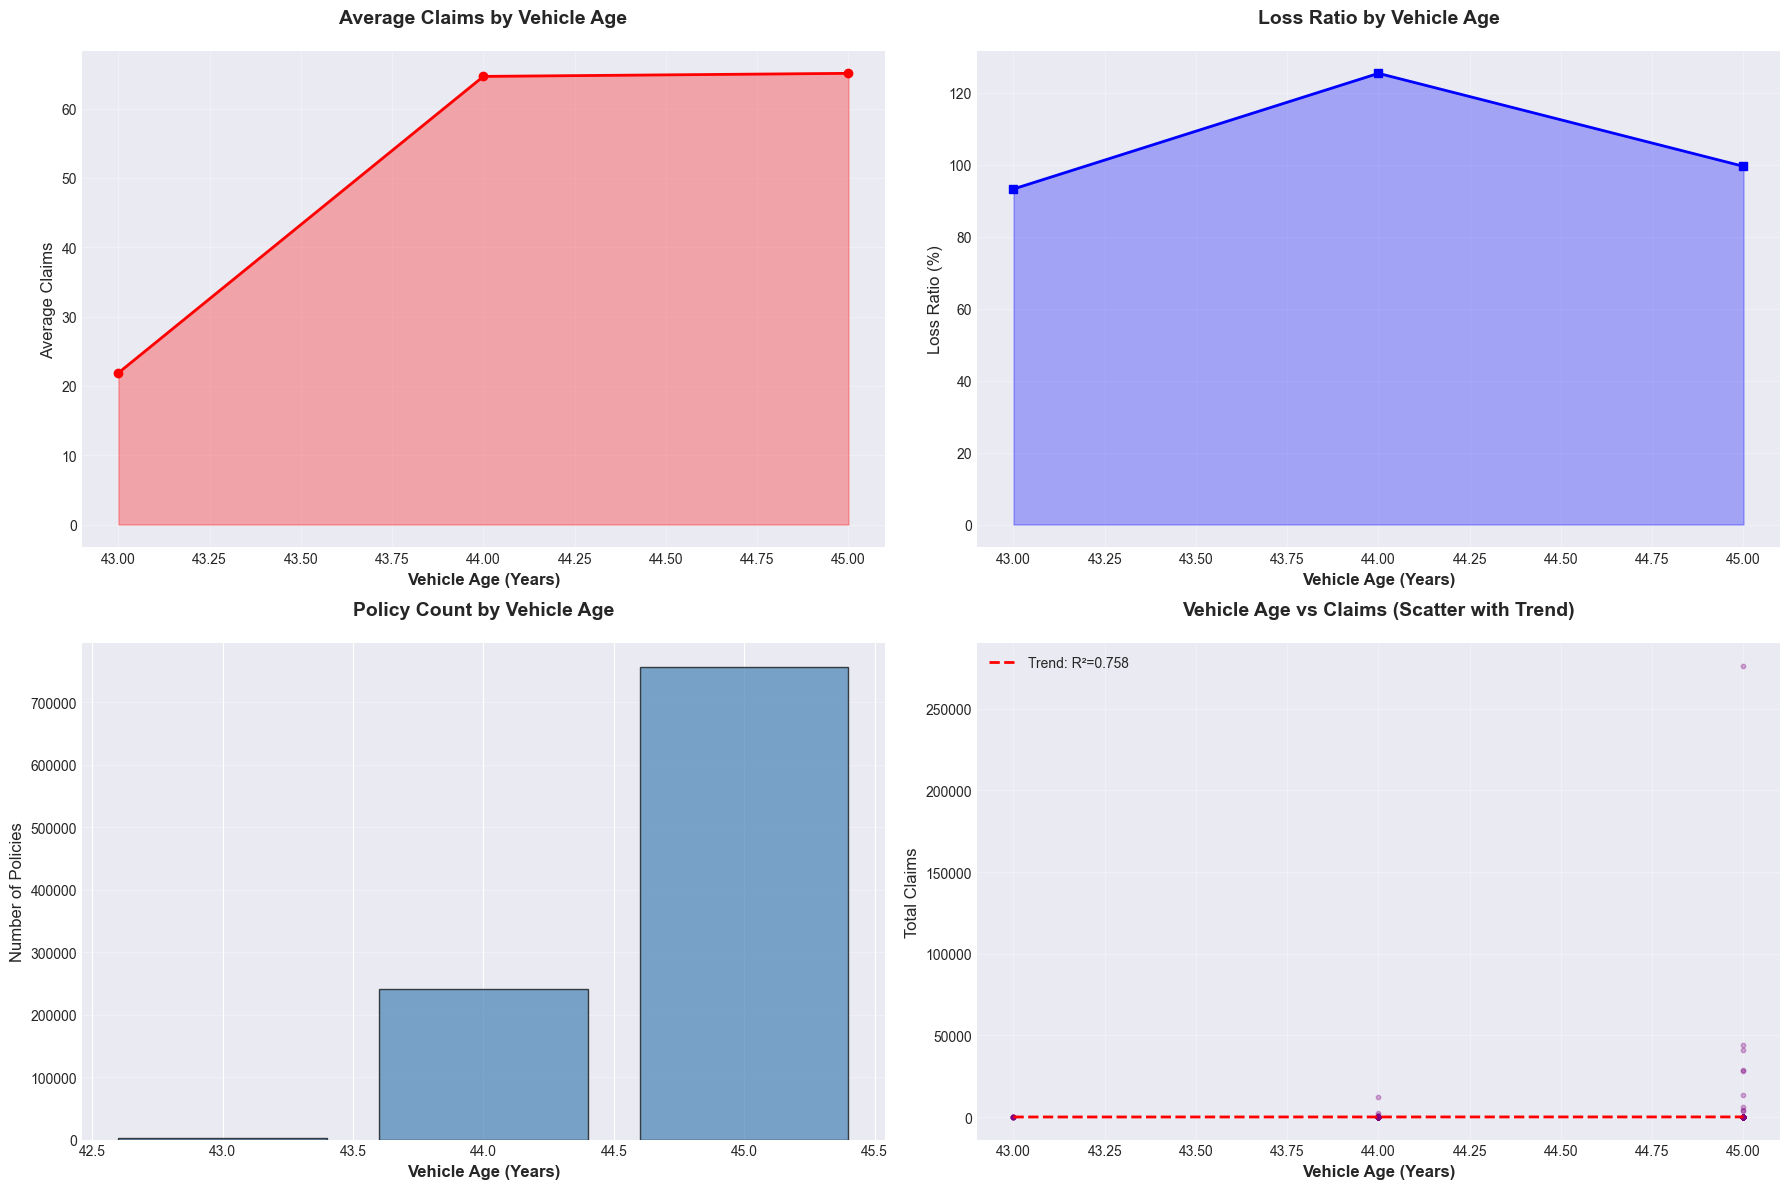


Correlation between Vehicle Age and Total Claims: 0.0003

✓ Vehicle age analysis completed


In [31]:
# Vehicle Analysis: Vehicle Age vs Claims
if not df.empty and 'RegistrationYear' in df.columns and 'TransactionMonth' in df.columns:
    print("=" * 80)
    print("VEHICLE ANALYSIS - VEHICLE AGE VS CLAIMS")
    print("=" * 80)
    
    # Ensure TransactionMonth is datetime
    if not pd.api.types.is_datetime64_any_dtype(df['TransactionMonth']):
        df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
    
    # Calculate vehicle age
    # Use transaction year - registration year
    df['TransactionYear'] = df['TransactionMonth'].dt.year
    
    # Handle RegistrationYear (might be datetime or numeric)
    if pd.api.types.is_datetime64_any_dtype(df['RegistrationYear']):
        df['RegistrationYear_num'] = df['RegistrationYear'].dt.year
    else:
        df['RegistrationYear_num'] = pd.to_numeric(df['RegistrationYear'], errors='coerce')
    
    df['VehicleAge'] = df['TransactionYear'] - df['RegistrationYear_num']
    
    # Filter out invalid ages (negative or too old)
    df_age = df[(df['VehicleAge'] >= 0) & (df['VehicleAge'] <= 50)].copy()
    
    if len(df_age) > 0:
        # Group by vehicle age
        age_stats = df_age.groupby('VehicleAge').agg({
            'TotalClaims': ['mean', 'sum', 'count'],
            'TotalPremium': ['mean', 'sum']
        }).reset_index()
        
        age_stats.columns = ['VehicleAge', 'AvgClaims', 'TotalClaims', 'PolicyCount', 
                            'AvgPremium', 'TotalPremium']
        
        # Calculate loss ratio by age
        age_stats['LossRatio'] = (age_stats['TotalClaims'] / age_stats['TotalPremium'] * 100)
        
        # Filter to ages with at least 100 policies
        age_stats = age_stats[age_stats['PolicyCount'] >= 100]
        
        print(f"\nAnalyzing vehicle age from 0 to {age_stats['VehicleAge'].max()} years")
        print(f"Analyzing {len(age_stats)} age groups (with at least 100 policies)")
        
        # Create visualizations
        fig, axes = plt.subplots(2, 2, figsize=(18, 12))
        
        # Plot 1: Average Claims by Vehicle Age
        ax1 = axes[0, 0]
        ax1.plot(age_stats['VehicleAge'], age_stats['AvgClaims'], 
                marker='o', linewidth=2, markersize=6, color='red')
        ax1.fill_between(age_stats['VehicleAge'], age_stats['AvgClaims'], alpha=0.3, color='red')
        ax1.set_xlabel('Vehicle Age (Years)', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Average Claims', fontsize=12)
        ax1.set_title('Average Claims by Vehicle Age', fontsize=14, fontweight='bold', pad=20)
        ax1.grid(alpha=0.3)
        
        # Plot 2: Loss Ratio by Vehicle Age
        ax2 = axes[0, 1]
        ax2.plot(age_stats['VehicleAge'], age_stats['LossRatio'], 
                marker='s', linewidth=2, markersize=6, color='blue')
        ax2.fill_between(age_stats['VehicleAge'], age_stats['LossRatio'], alpha=0.3, color='blue')
        ax2.set_xlabel('Vehicle Age (Years)', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Loss Ratio (%)', fontsize=12)
        ax2.set_title('Loss Ratio by Vehicle Age', fontsize=14, fontweight='bold', pad=20)
        ax2.grid(alpha=0.3)
        
        # Plot 3: Policy Count by Vehicle Age
        ax3 = axes[1, 0]
        ax3.bar(age_stats['VehicleAge'], age_stats['PolicyCount'], 
               color='steelblue', alpha=0.7, edgecolor='black')
        ax3.set_xlabel('Vehicle Age (Years)', fontsize=12, fontweight='bold')
        ax3.set_ylabel('Number of Policies', fontsize=12)
        ax3.set_title('Policy Count by Vehicle Age', fontsize=14, fontweight='bold', pad=20)
        ax3.grid(axis='y', alpha=0.3)
        
        # Plot 4: Scatter plot - Age vs Claims with trend line
        ax4 = axes[1, 1]
        # Sample for scatter plot if too many points
        sample_size = min(5000, len(df_age))
        df_age_sample = df_age.sample(n=sample_size, random_state=42) if len(df_age) > sample_size else df_age
        
        ax4.scatter(df_age_sample['VehicleAge'], df_age_sample['TotalClaims'], 
                   alpha=0.3, s=10, color='purple')
        
        # Add trend line
        from scipy import stats
        x = age_stats['VehicleAge']
        y = age_stats['AvgClaims']
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        line_x = np.linspace(x.min(), x.max(), 100)
        line_y = slope * line_x + intercept
        ax4.plot(line_x, line_y, 'r--', linewidth=2, 
                label=f'Trend: R²={r_value**2:.3f}')
        
        ax4.set_xlabel('Vehicle Age (Years)', fontsize=12, fontweight='bold')
        ax4.set_ylabel('Total Claims', fontsize=12)
        ax4.set_title('Vehicle Age vs Claims (Scatter with Trend)', 
                     fontsize=14, fontweight='bold', pad=20)
        ax4.legend()
        ax4.grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Print correlation
        correlation = df_age['VehicleAge'].corr(df_age['TotalClaims'])
        print(f"\nCorrelation between Vehicle Age and Total Claims: {correlation:.4f}")
        
        if abs(correlation) > 0.3:
            direction = "positive" if correlation > 0 else "negative"
            print(f"  → {'Stronger' if abs(correlation) > 0.5 else 'Moderate'} {direction} relationship")
            print(f"  → Older vehicles tend to have {'higher' if correlation > 0 else 'lower'} claims")
        
        print("\n✓ Vehicle age analysis completed")
    else:
        print("Insufficient data for vehicle age analysis.")
else:
    print("RegistrationYear or TransactionMonth columns not found.")


## Step 8: Key Metrics Calculation

Loss Ratio is a critical metric in insurance that measures claims relative to premiums. It helps assess profitability and risk.

### 8.1 Loss Ratio Calculation
- **Formula**: Loss Ratio = (TotalClaims / TotalPremium) × 100
- Calculate overall portfolio loss ratio
- Calculate loss ratio by Province
- Calculate loss ratio by VehicleType
- Calculate loss ratio by Gender


KEY METRICS CALCULATION - LOSS RATIO

OVERALL PORTFOLIO LOSS RATIO
Total Premium: R 61,911,562.70
Total Claims:  R 64,867,546.17
Loss Ratio:     104.77%
  → Critical: Loss ratio above 100% means claims exceed premiums!

LOSS RATIO BY PROVINCE

Province                 Premium (R)      Claims (R)  Loss Ratio (%)
--------------------------------------------------------------------------------
Gauteng                   24,053,775      29,394,148          122.20
KwaZulu-Natal             13,209,080      14,301,382          108.27
Western Cape               9,806,559      10,389,774          105.95
North West                 7,490,508       5,920,250           79.04
Mpumalanga                 2,836,292       2,044,675           72.09
Free State                   521,363         354,922           68.08
Limpopo                    1,537,324       1,016,477           66.12
Eastern Cape               2,140,104       1,356,427           63.38
Northern Cape                316,558          89,491  

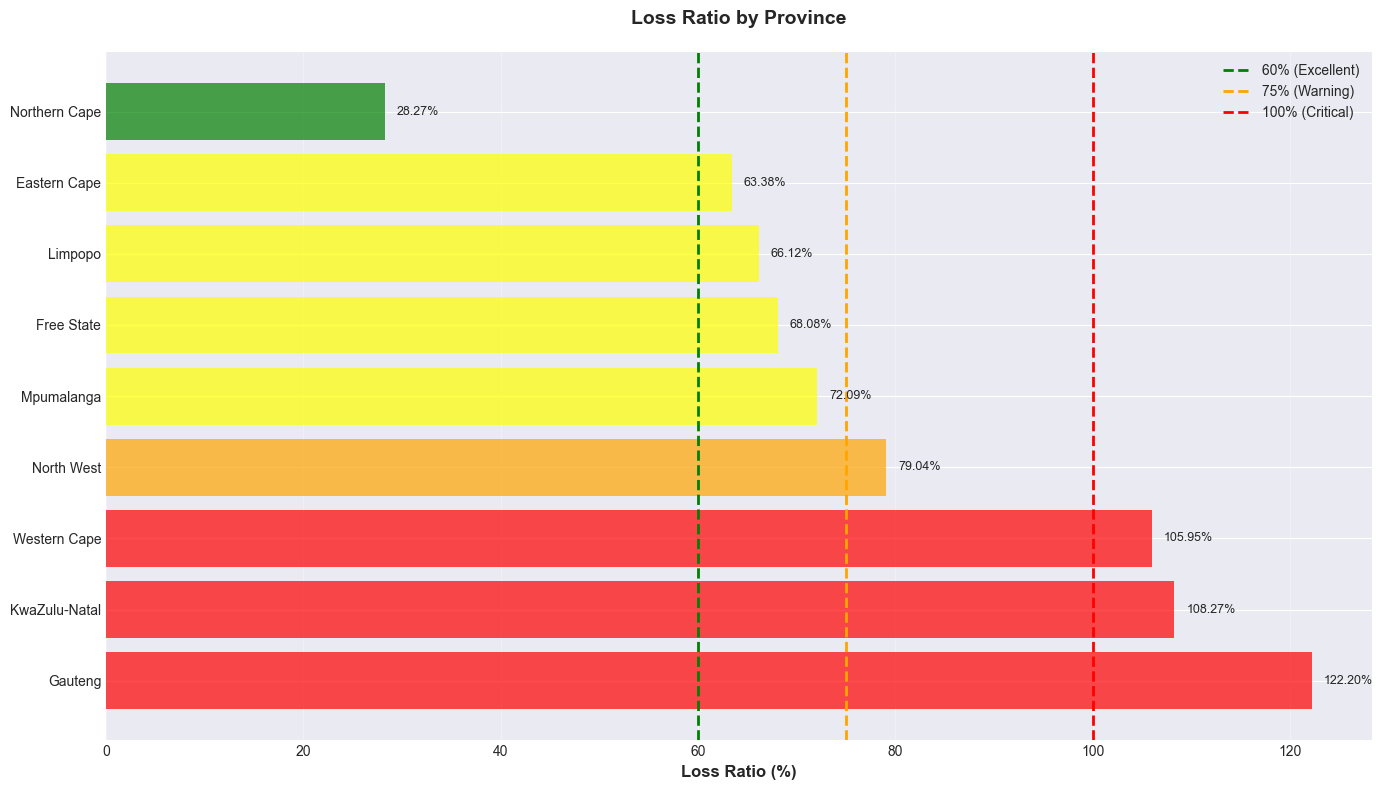


LOSS RATIO BY VEHICLE TYPE

Vehicle Type                     Policies     Premium (R)      Claims (R)  Loss Ratio (%)
----------------------------------------------------------------------------------------------------
Heavy Commercial                    7,401         460,948         750,475          162.81
Medium Commercial                  53,985       3,922,746       4,119,867          105.03
Passenger Vehicle                 933,598      56,642,017      59,372,070          104.82
Light Commercial                    3,897         260,498          60,453           23.21
Bus                                   665          58,245           7,997           13.73


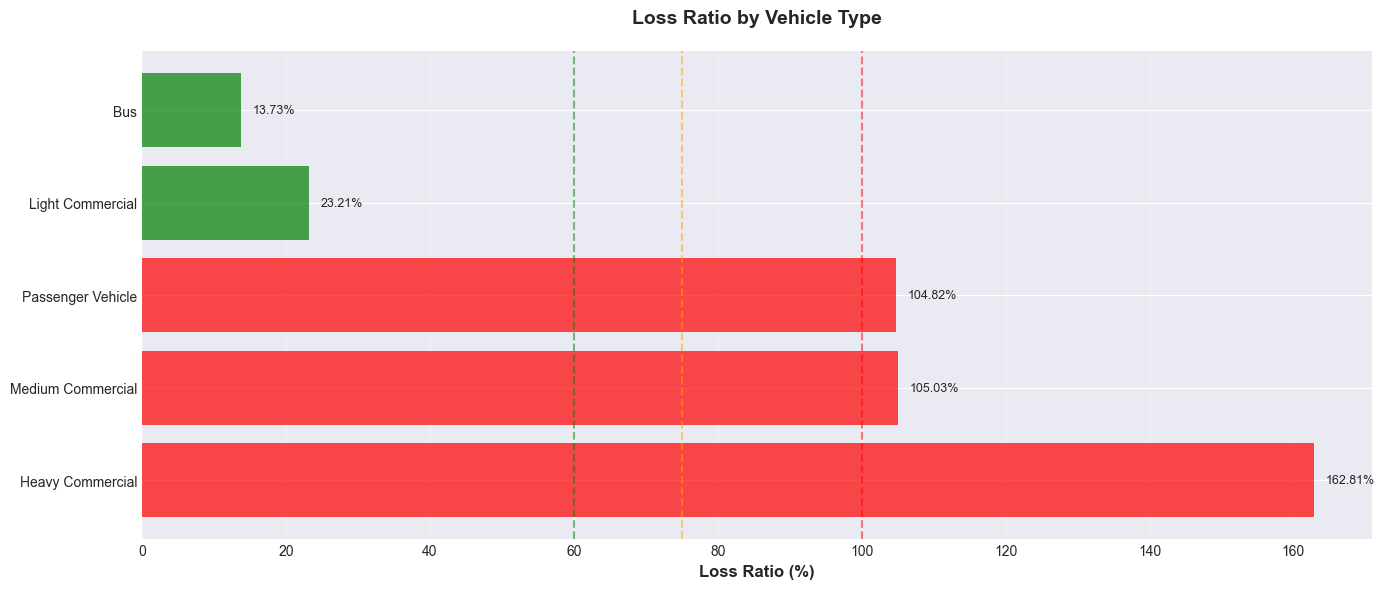


LOSS RATIO BY GENDER

Gender                   Policies     Premium (R)      Claims (R)  Loss Ratio (%)
------------------------------------------------------------------------------------------
Not specified             940,990      59,202,752      62,714,103          105.93
Male                       42,817       1,580,143       1,396,704           88.39
Female                      6,755         304,481         250,246           82.19


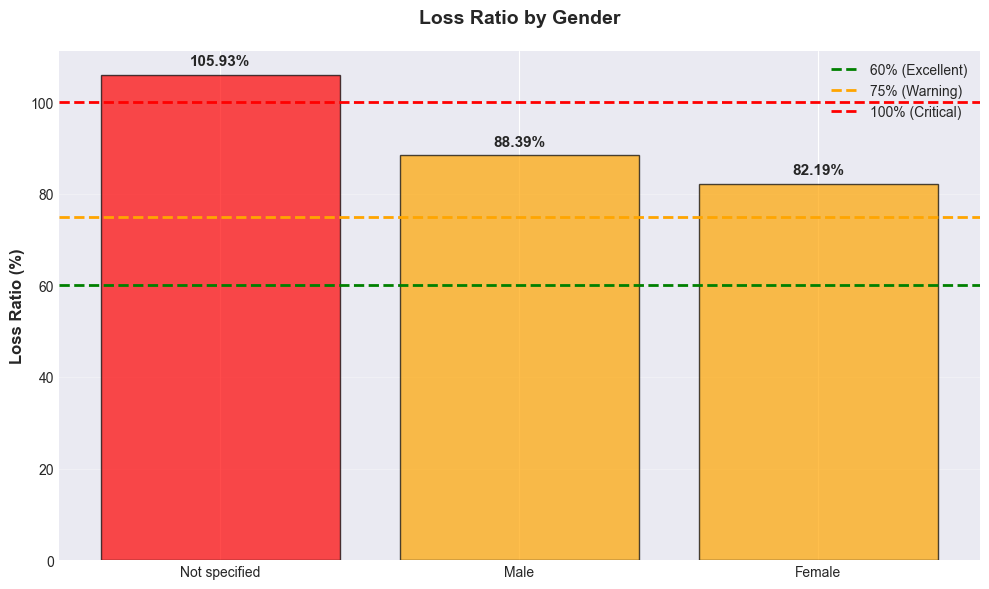


✓ Loss ratio calculations completed


In [32]:
# Key Metrics: Loss Ratio Calculation
if not df.empty and 'TotalPremium' in df.columns and 'TotalClaims' in df.columns:
    print("=" * 80)
    print("KEY METRICS CALCULATION - LOSS RATIO")
    print("=" * 80)
    
    # Overall Portfolio Loss Ratio
    total_premium = df['TotalPremium'].sum()
    total_claims = df['TotalClaims'].sum()
    overall_loss_ratio = (total_claims / total_premium * 100) if total_premium > 0 else 0
    
    print(f"\n{'='*80}")
    print("OVERALL PORTFOLIO LOSS RATIO")
    print(f"{'='*80}")
    print(f"Total Premium: R {total_premium:,.2f}")
    print(f"Total Claims:  R {total_claims:,.2f}")
    print(f"Loss Ratio:     {overall_loss_ratio:.2f}%")
    
    if overall_loss_ratio < 60:
        print(f"  → Excellent: Loss ratio below 60% indicates strong profitability")
    elif overall_loss_ratio < 75:
        print(f"  → Good: Loss ratio between 60-75% is acceptable")
    elif overall_loss_ratio < 100:
        print(f"  → Warning: Loss ratio above 75% indicates potential profitability issues")
    else:
        print(f"  → Critical: Loss ratio above 100% means claims exceed premiums!")
    
    # Loss Ratio by Province
    if 'Province' in df.columns:
        print(f"\n{'='*80}")
        print("LOSS RATIO BY PROVINCE")
        print(f"{'='*80}")
        
        province_lr = df.groupby('Province').agg({
            'TotalPremium': 'sum',
            'TotalClaims': 'sum'
        }).reset_index()
        province_lr['LossRatio'] = (province_lr['TotalClaims'] / province_lr['TotalPremium'] * 100)
        province_lr = province_lr.sort_values('LossRatio', ascending=False)
        
        print(f"\n{'Province':<20} {'Premium (R)':>15} {'Claims (R)':>15} {'Loss Ratio (%)':>15}")
        print("-" * 80)
        for _, row in province_lr.iterrows():
            print(f"{row['Province']:<20} {row['TotalPremium']:>15,.0f} {row['TotalClaims']:>15,.0f} {row['LossRatio']:>15.2f}")
        
        # Visualization
        fig, ax = plt.subplots(figsize=(14, 8))
        colors = ['red' if lr >= 100 else 'orange' if lr >= 75 else 'yellow' if lr >= 60 else 'green' 
                 for lr in province_lr['LossRatio']]
        bars = ax.barh(range(len(province_lr)), province_lr['LossRatio'], color=colors, alpha=0.7)
        ax.set_yticks(range(len(province_lr)))
        ax.set_yticklabels(province_lr['Province'])
        ax.set_xlabel('Loss Ratio (%)', fontsize=12, fontweight='bold')
        ax.set_title('Loss Ratio by Province', fontsize=14, fontweight='bold', pad=20)
        ax.axvline(x=60, color='green', linestyle='--', linewidth=2, label='60% (Excellent)')
        ax.axvline(x=75, color='orange', linestyle='--', linewidth=2, label='75% (Warning)')
        ax.axvline(x=100, color='red', linestyle='--', linewidth=2, label='100% (Critical)')
        ax.grid(axis='x', alpha=0.3)
        ax.legend()
        
        for i, v in enumerate(province_lr['LossRatio']):
            ax.text(v + max(province_lr['LossRatio']) * 0.01, i, f'{v:.2f}%', 
                   va='center', fontsize=9)
        
        plt.tight_layout()
        plt.show()
    
    # Loss Ratio by VehicleType
    if 'VehicleType' in df.columns:
        print(f"\n{'='*80}")
        print("LOSS RATIO BY VEHICLE TYPE")
        print(f"{'='*80}")
        
        vehicle_lr = df.groupby('VehicleType').agg({
            'TotalPremium': 'sum',
            'TotalClaims': 'sum',
            'PolicyID': 'count'
        }).reset_index()
        vehicle_lr.columns = ['VehicleType', 'TotalPremium', 'TotalClaims', 'PolicyCount']
        vehicle_lr['LossRatio'] = (vehicle_lr['TotalClaims'] / vehicle_lr['TotalPremium'] * 100)
        vehicle_lr = vehicle_lr[vehicle_lr['PolicyCount'] >= 100]  # Filter to significant counts
        vehicle_lr = vehicle_lr.sort_values('LossRatio', ascending=False)
        
        print(f"\n{'Vehicle Type':<30} {'Policies':>10} {'Premium (R)':>15} {'Claims (R)':>15} {'Loss Ratio (%)':>15}")
        print("-" * 100)
        for _, row in vehicle_lr.iterrows():
            print(f"{row['VehicleType']:<30} {row['PolicyCount']:>10,} {row['TotalPremium']:>15,.0f} {row['TotalClaims']:>15,.0f} {row['LossRatio']:>15.2f}")
        
        # Visualization
        if len(vehicle_lr) > 0:
            fig, ax = plt.subplots(figsize=(14, max(6, len(vehicle_lr) * 0.4)))
            colors = ['red' if lr >= 100 else 'orange' if lr >= 75 else 'yellow' if lr >= 60 else 'green' 
                     for lr in vehicle_lr['LossRatio']]
            bars = ax.barh(range(len(vehicle_lr)), vehicle_lr['LossRatio'], color=colors, alpha=0.7)
            ax.set_yticks(range(len(vehicle_lr)))
            ax.set_yticklabels(vehicle_lr['VehicleType'])
            ax.set_xlabel('Loss Ratio (%)', fontsize=12, fontweight='bold')
            ax.set_title('Loss Ratio by Vehicle Type', fontsize=14, fontweight='bold', pad=20)
            ax.axvline(x=60, color='green', linestyle='--', alpha=0.5)
            ax.axvline(x=75, color='orange', linestyle='--', alpha=0.5)
            ax.axvline(x=100, color='red', linestyle='--', alpha=0.5)
            ax.grid(axis='x', alpha=0.3)
            
            for i, v in enumerate(vehicle_lr['LossRatio']):
                ax.text(v + max(vehicle_lr['LossRatio']) * 0.01, i, f'{v:.2f}%', 
                       va='center', fontsize=9)
            
            plt.tight_layout()
            plt.show()
    
    # Loss Ratio by Gender
    if 'Gender' in df.columns:
        print(f"\n{'='*80}")
        print("LOSS RATIO BY GENDER")
        print(f"{'='*80}")
        
        gender_lr = df.groupby('Gender').agg({
            'TotalPremium': 'sum',
            'TotalClaims': 'sum',
            'PolicyID': 'count'
        }).reset_index()
        gender_lr.columns = ['Gender', 'TotalPremium', 'TotalClaims', 'PolicyCount']
        gender_lr['LossRatio'] = (gender_lr['TotalClaims'] / gender_lr['TotalPremium'] * 100)
        gender_lr = gender_lr.sort_values('LossRatio', ascending=False)
        
        print(f"\n{'Gender':<20} {'Policies':>12} {'Premium (R)':>15} {'Claims (R)':>15} {'Loss Ratio (%)':>15}")
        print("-" * 90)
        for _, row in gender_lr.iterrows():
            print(f"{row['Gender']:<20} {row['PolicyCount']:>12,} {row['TotalPremium']:>15,.0f} {row['TotalClaims']:>15,.0f} {row['LossRatio']:>15.2f}")
        
        # Visualization
        fig, ax = plt.subplots(figsize=(10, 6))
        colors = ['red' if lr >= 100 else 'orange' if lr >= 75 else 'yellow' if lr >= 60 else 'green' 
                 for lr in gender_lr['LossRatio']]
        bars = ax.bar(range(len(gender_lr)), gender_lr['LossRatio'], color=colors, alpha=0.7, edgecolor='black')
        ax.set_xticks(range(len(gender_lr)))
        ax.set_xticklabels(gender_lr['Gender'])
        ax.set_ylabel('Loss Ratio (%)', fontsize=12, fontweight='bold')
        ax.set_title('Loss Ratio by Gender', fontsize=14, fontweight='bold', pad=20)
        ax.axhline(y=60, color='green', linestyle='--', linewidth=2, label='60% (Excellent)')
        ax.axhline(y=75, color='orange', linestyle='--', linewidth=2, label='75% (Warning)')
        ax.axhline(y=100, color='red', linestyle='--', linewidth=2, label='100% (Critical)')
        ax.grid(axis='y', alpha=0.3)
        ax.legend()
        
        for i, v in enumerate(gender_lr['LossRatio']):
            ax.text(i, v + max(gender_lr['LossRatio']) * 0.02, f'{v:.2f}%', 
                   ha='center', fontsize=11, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    print("\n✓ Loss ratio calculations completed")
else:
    print("TotalPremium or TotalClaims columns not found in dataset.")


OUTLIER DETECTION - EXTREME VALUES ANALYSIS

Analyzing outliers in: TotalClaims, CustomValueEstimate, TotalPremium

OUTLIER SUMMARY STATISTICS


,Variable,Q1,Median,Q3,IQR,Lower Bound,Upper Bound,Outlier Count,Outlier %,Extreme Outlier Count,Min,Max
0,TotalClaims,0.0,0.00,0.00,0.00,0.00,0.00,2793,0.28,2793,-12002.41,393092.11
1,CustomValueEstimate,135000.0,220000.00,280000.00,145000.00,-82500.00,497500.00,1785,0.81,327,20000.00,26550000.00
2,TotalPremium,0.0,2.18,21.93,21.93,-32.89,54.82,209042,20.90,138832,-782.58,65282.60


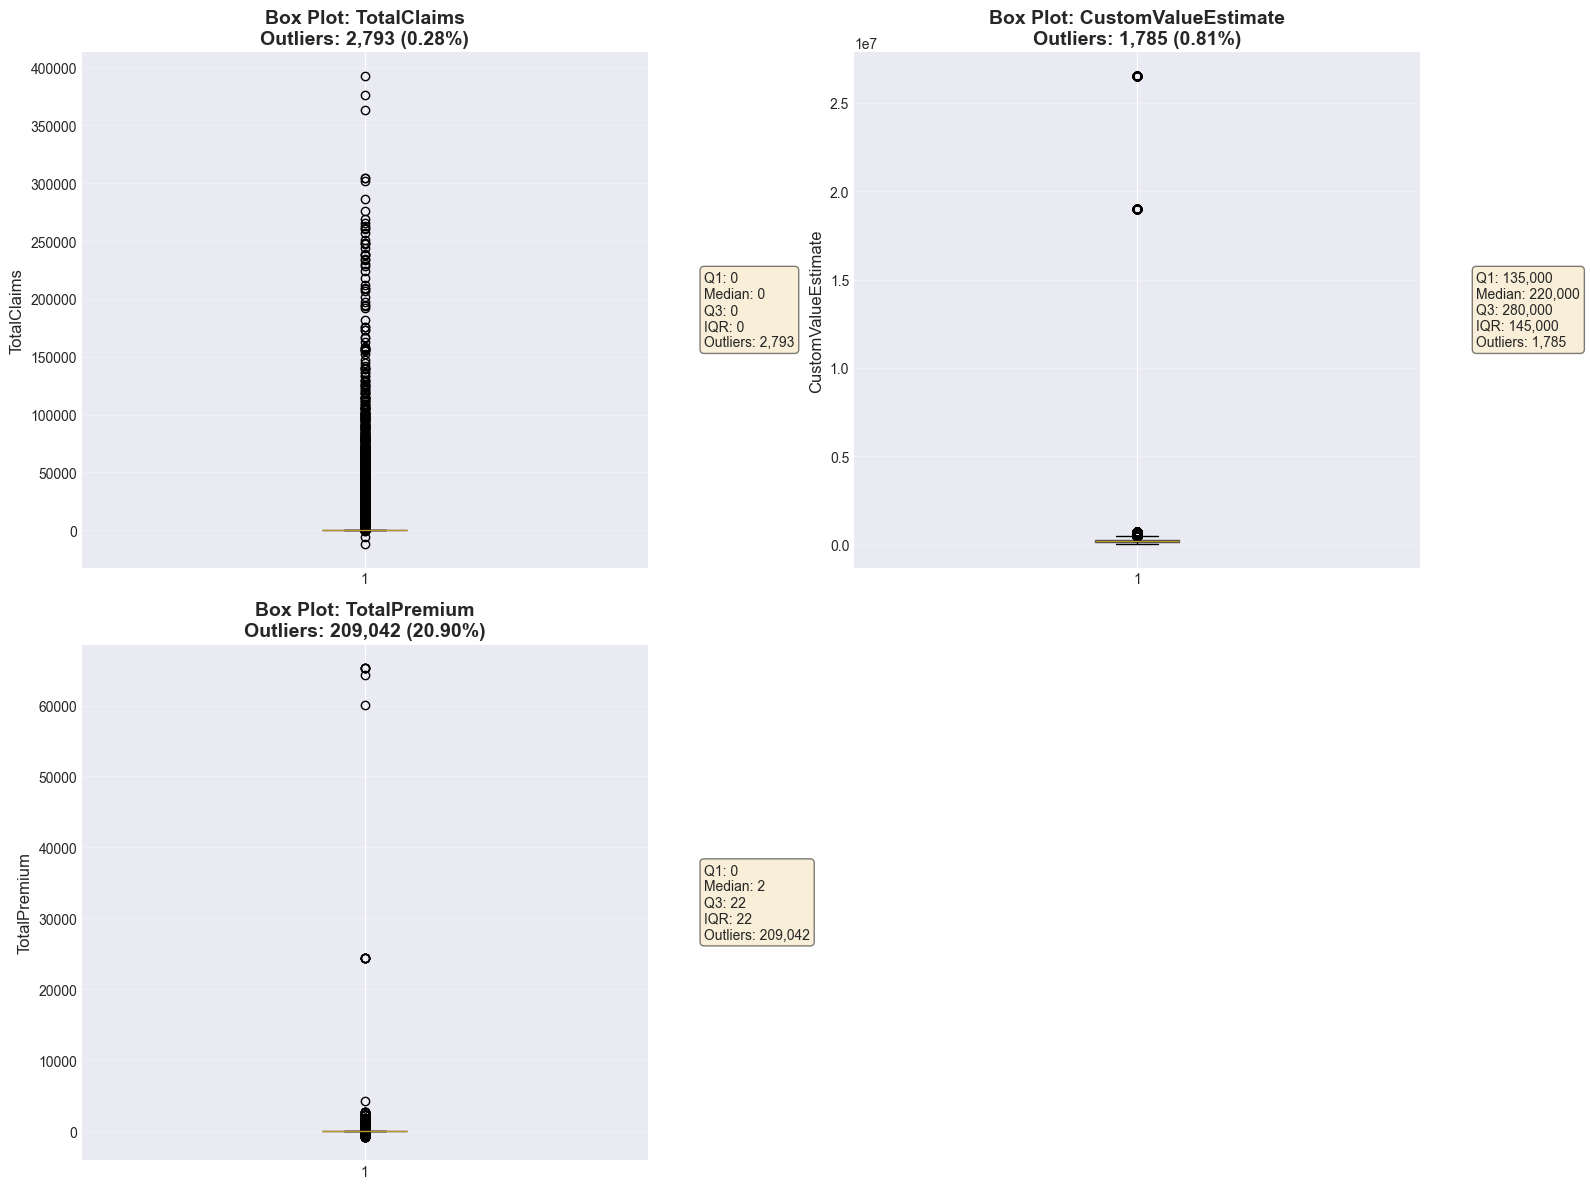


DETAILED OUTLIER ANALYSIS

TotalClaims:
  - Total values: 1,000,098
  - Outliers detected: 2,793 (0.28%)
  - Lower bound: 0.00
  - Upper bound: 0.00
  - Outlier range: -12,002.41 to 393,092.11
  - Top 5 outliers: [393092.105263158, 376432.4912280706, 363343.421052632, 304413.3947368419, 304338.65789473715]

CustomValueEstimate:
  - Total values: 220,456
  - Outliers detected: 1,785 (0.81%)
  - Lower bound: -82,500.00
  - Upper bound: 497,500.00
  - Outlier range: 500,000.00 to 26,550,000.00
  - Top 5 outliers: [26550000.0, 26550000.0, 26550000.0, 26550000.0, 26550000.0]

TotalPremium:
  - Total values: 1,000,098
  - Outliers detected: 209,042 (20.90%)
  - Lower bound: -32.89
  - Upper bound: 54.82
  - Outlier range: -782.58 to 65,282.60
  - Top 5 outliers: [65282.6034210526, 65282.6034210526, 65282.6034210526, 65282.6034210526, 64291.0602631579]

OUTLIER HANDLING RECOMMENDATIONS

        Options for handling outliers:

        1. **Keep outliers** (if they represent genuine extreme ca

In [33]:
# Outlier Detection: Box Plots and Extreme Value Identification
if not df.empty:
    print("=" * 80)
    print("OUTLIER DETECTION - EXTREME VALUES ANALYSIS")
    print("=" * 80)
    
    # Focus on key financial variables
    key_vars = ['TotalClaims', 'CustomValueEstimate', 'TotalPremium']
    existing_vars = [var for var in key_vars if var in df.columns]
    
    if len(existing_vars) > 0:
        print(f"\nAnalyzing outliers in: {', '.join(existing_vars)}")
        
        # Create comprehensive outlier analysis
        outlier_summary = []
        
        for var in existing_vars:
            data = df[var].dropna()
            
            if len(data) > 0:
                # Calculate IQR and bounds
                Q1 = data.quantile(0.25)
                Q3 = data.quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                
                # Identify outliers
                outliers = data[(data < lower_bound) | (data > upper_bound)]
                outlier_count = len(outliers)
                outlier_pct = (outlier_count / len(data) * 100)
                
                # Extreme outliers (beyond 3*IQR)
                extreme_lower = Q1 - 3 * IQR
                extreme_upper = Q3 + 3 * IQR
                extreme_outliers = data[(data < extreme_lower) | (data > extreme_upper)]
                extreme_count = len(extreme_outliers)
                
                outlier_summary.append({
                    'Variable': var,
                    'Q1': Q1,
                    'Median': data.median(),
                    'Q3': Q3,
                    'IQR': IQR,
                    'Lower Bound': lower_bound,
                    'Upper Bound': upper_bound,
                    'Outlier Count': outlier_count,
                    'Outlier %': outlier_pct,
                    'Extreme Outlier Count': extreme_count,
                    'Min': data.min(),
                    'Max': data.max()
                })
        
        # Create summary table
        outlier_df = pd.DataFrame(outlier_summary)
        print("\n" + "=" * 80)
        print("OUTLIER SUMMARY STATISTICS")
        print("=" * 80)
        display(outlier_df.round(2))
        
        # Create box plots
        n_vars = len(existing_vars)
        n_cols = min(2, n_vars)
        n_rows = (n_vars + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows))
        axes = axes.flatten() if n_vars > 1 else [axes]
        
        for idx, var in enumerate(existing_vars):
            ax = axes[idx]
            data = df[var].dropna()
            
            # Create box plot
            bp = ax.boxplot(data, vert=True, patch_artist=True, showfliers=True)
            bp['boxes'][0].set_facecolor('lightblue')
            bp['boxes'][0].set_alpha(0.7)
            
            # Get outlier info
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = data[(data < lower_bound) | (data > upper_bound)]
            
            ax.set_title(f'Box Plot: {var}\nOutliers: {len(outliers):,} ({len(outliers)/len(data)*100:.2f}%)', 
                        fontsize=14, fontweight='bold')
            ax.set_ylabel(var, fontsize=12)
            ax.grid(axis='y', alpha=0.3)
            
            # Add statistics text
            stats_text = f'Q1: {Q1:,.0f}\nMedian: {data.median():,.0f}\nQ3: {Q3:,.0f}\nIQR: {IQR:,.0f}\nOutliers: {len(outliers):,}'
            ax.text(1.1, 0.5, stats_text, transform=ax.transAxes, 
                   fontsize=10, verticalalignment='center',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        # Hide unused subplots
        for idx in range(n_vars, len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()
        
        # Detailed outlier analysis
        print("\n" + "=" * 80)
        print("DETAILED OUTLIER ANALYSIS")
        print("=" * 80)
        
        for var in existing_vars:
            data = df[var].dropna()
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = data[(data < lower_bound) | (data > upper_bound)]
            
            print(f"\n{var}:")
            print(f"  - Total values: {len(data):,}")
            print(f"  - Outliers detected: {len(outliers):,} ({len(outliers)/len(data)*100:.2f}%)")
            print(f"  - Lower bound: {lower_bound:,.2f}")
            print(f"  - Upper bound: {upper_bound:,.2f}")
            
            if len(outliers) > 0:
                print(f"  - Outlier range: {outliers.min():,.2f} to {outliers.max():,.2f}")
                print(f"  - Top 5 outliers: {sorted(outliers, reverse=True)[:5]}")
        
        # Recommendations
        print("\n" + "=" * 80)
        print("OUTLIER HANDLING RECOMMENDATIONS")
        print("=" * 80)
        print("""
        Options for handling outliers:
        
        1. **Keep outliers** (if they represent genuine extreme cases):
           - Use robust statistics (median instead of mean)
           - Use log transformation for skewed data
           - Use non-parametric tests
        
        2. **Remove outliers** (if they are data errors):
           - Remove values beyond 3*IQR (extreme outliers)
           - Document removal criteria
        
        3. **Cap/Winsorize outliers**:
           - Cap values at 95th/99th percentile
           - Replace extreme values with threshold values
        
        4. **Separate analysis**:
           - Analyze outliers separately
           - Create separate models for normal vs extreme cases
        
        **Recommendation**: For insurance data, outliers may represent:
        - High-value claims (genuine extreme cases)
        - Data entry errors (should be investigated)
        - Fraud cases (should be flagged)
        
        Consider keeping outliers but using robust methods for analysis.
        """)
        
        print("\n✓ Outlier detection completed")
    else:
        print("Key variables not found for outlier analysis.")
else:
    print("Dataset is empty.")


CREATIVE VISUALIZATION 1: LOSS RATIO HEATMAP (PROVINCE × VEHICLE TYPE)


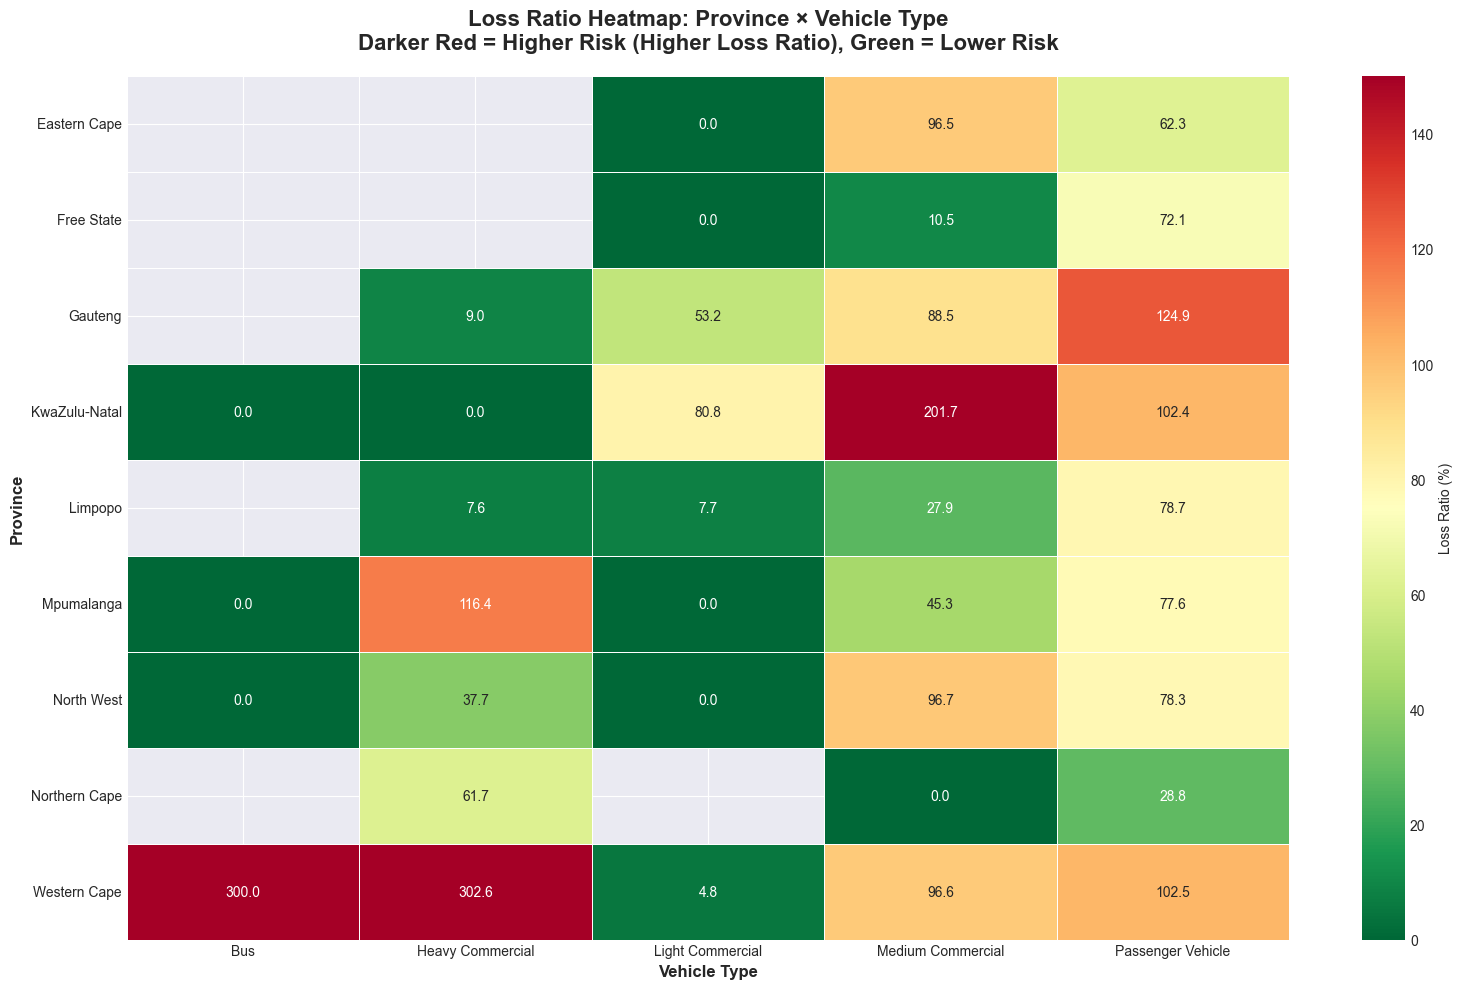

✓ Heatmap created - Shows risk patterns across geographic and vehicle dimensions


In [34]:
# Creative Visualization 1: Loss Ratio Heatmap by Province × VehicleType
if not df.empty and 'Province' in df.columns and 'VehicleType' in df.columns:
    print("=" * 80)
    print("CREATIVE VISUALIZATION 1: LOSS RATIO HEATMAP (PROVINCE × VEHICLE TYPE)")
    print("=" * 80)
    
    # Calculate loss ratio by Province and VehicleType
    pivot_data = df.groupby(['Province', 'VehicleType']).agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum'
    }).reset_index()
    
    pivot_data['LossRatio'] = (pivot_data['TotalClaims'] / pivot_data['TotalPremium'] * 100)
    
    # Filter to combinations with significant data (at least 50 policies)
    province_vehicle_counts = df.groupby(['Province', 'VehicleType']).size().reset_index(name='Count')
    pivot_data = pivot_data.merge(province_vehicle_counts, on=['Province', 'VehicleType'])
    pivot_data = pivot_data[pivot_data['Count'] >= 50]
    
    # Create pivot table for heatmap
    heatmap_data = pivot_data.pivot(index='Province', columns='VehicleType', values='LossRatio')
    
    if len(heatmap_data) > 0 and len(heatmap_data.columns) > 0:
        # Create heatmap
        plt.figure(figsize=(16, 10))
        sns.heatmap(heatmap_data, 
                   annot=True, 
                   fmt='.1f', 
                   cmap='RdYlGn_r',  # Red-Yellow-Green reversed (red = high risk)
                   center=75,  # Center at 75% loss ratio
                   vmin=0, 
                   vmax=150,
                   linewidths=0.5,
                   cbar_kws={'label': 'Loss Ratio (%)'},
                   square=False)
        
        plt.title('Loss Ratio Heatmap: Province × Vehicle Type\n' + 
                 'Darker Red = Higher Risk (Higher Loss Ratio), Green = Lower Risk', 
                 fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Vehicle Type', fontsize=12, fontweight='bold')
        plt.ylabel('Province', fontsize=12, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        print("✓ Heatmap created - Shows risk patterns across geographic and vehicle dimensions")
    else:
        print("Insufficient data for heatmap (need at least 50 policies per combination)")
else:
    print("Province or VehicleType columns not found.")


CREATIVE VISUALIZATION 2: TIME SERIES WITH TREND LINES AND ANNOTATIONS


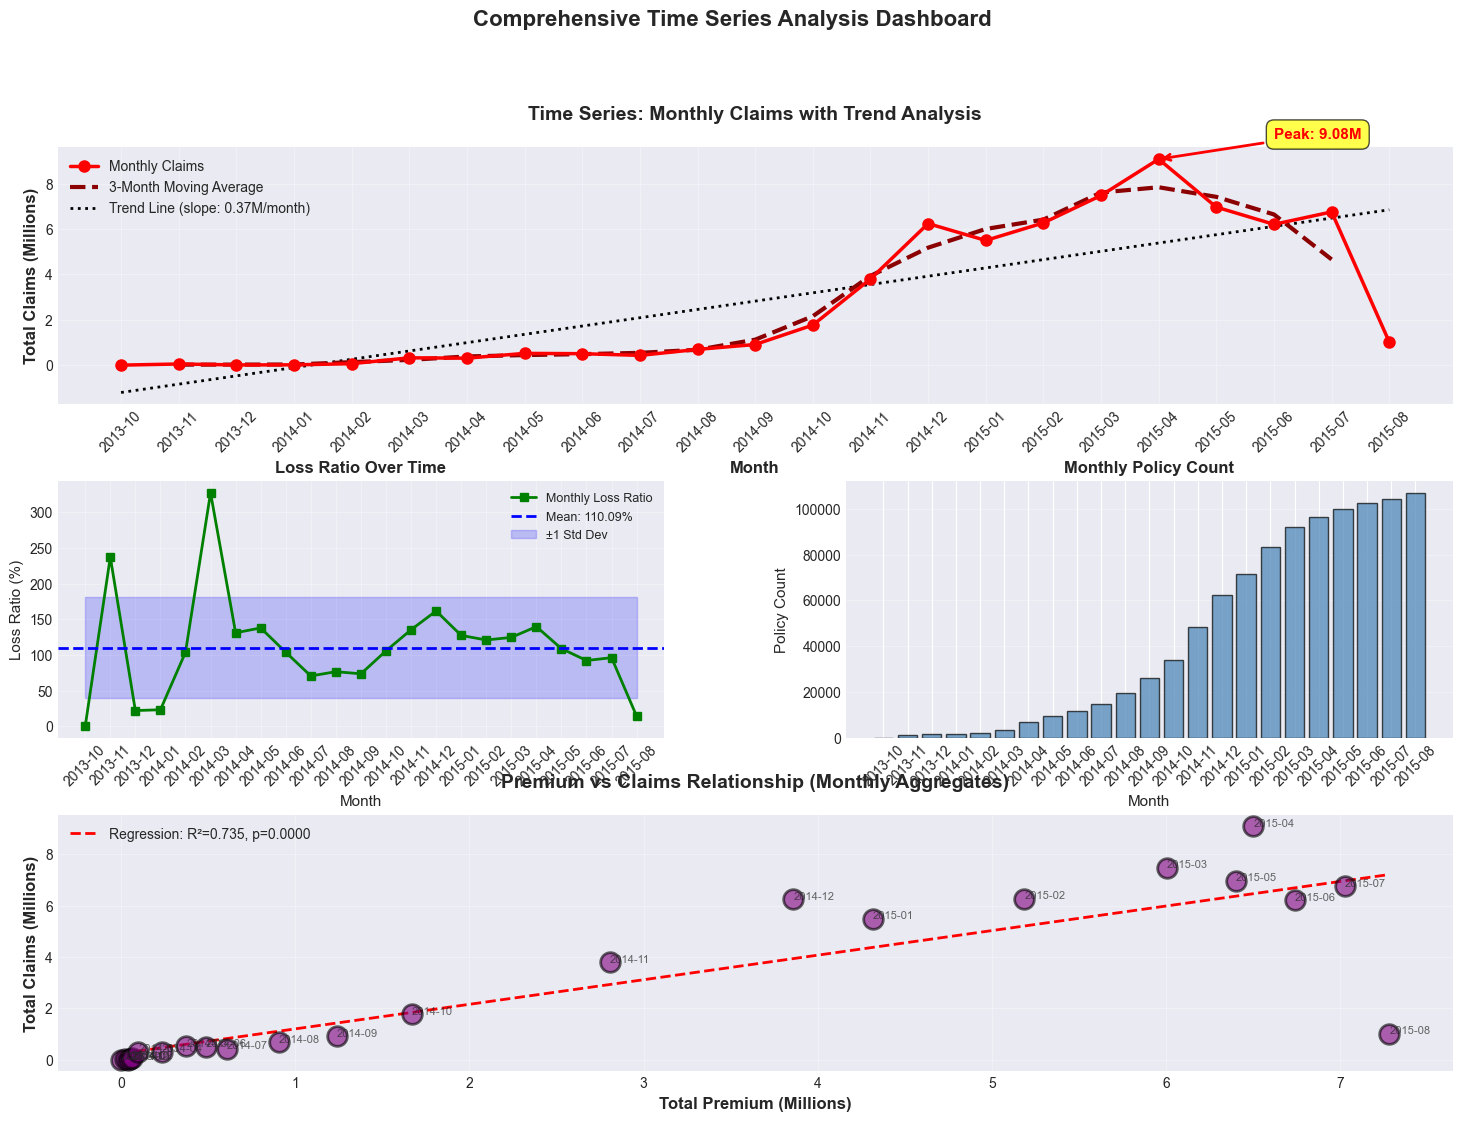

✓ Time series dashboard created with trend lines, moving averages, and annotations


In [35]:
# Creative Visualization 2: Time Series of Claims with Trend Lines and Annotations
if not df.empty and 'TransactionMonth' in df.columns:
    print("=" * 80)
    print("CREATIVE VISUALIZATION 2: TIME SERIES WITH TREND LINES AND ANNOTATIONS")
    print("=" * 80)
    
    # Ensure TransactionMonth is datetime
    if not pd.api.types.is_datetime64_any_dtype(df['TransactionMonth']):
        df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
    
    # Aggregate by month
    df['YearMonth'] = df['TransactionMonth'].dt.to_period('M')
    monthly_data = df.groupby('YearMonth').agg({
        'TotalClaims': 'sum',
        'TotalPremium': 'sum',
        'PolicyID': 'count'
    }).reset_index()
    monthly_data.columns = ['YearMonth', 'TotalClaims', 'TotalPremium', 'PolicyCount']
    monthly_data['LossRatio'] = (monthly_data['TotalClaims'] / monthly_data['TotalPremium'] * 100)
    monthly_data['YearMonth_str'] = monthly_data['YearMonth'].astype(str)
    
    # Create comprehensive time series plot
    fig = plt.figure(figsize=(18, 12))
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
    
    # Plot 1: Claims with trend line and moving average
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(monthly_data['YearMonth_str'], monthly_data['TotalClaims']/1e6, 
            marker='o', linewidth=2.5, markersize=8, color='red', label='Monthly Claims', zorder=3)
    
    # Add moving average (3-month)
    window = 3
    if len(monthly_data) >= window:
        monthly_data['MA_Claims'] = monthly_data['TotalClaims'].rolling(window=window, center=True).mean() / 1e6
        ax1.plot(monthly_data['YearMonth_str'], monthly_data['MA_Claims'], 
                linewidth=3, color='darkred', linestyle='--', label=f'{window}-Month Moving Average', zorder=2)
    
    # Add trend line
    x_numeric = np.arange(len(monthly_data))
    z = np.polyfit(x_numeric, monthly_data['TotalClaims']/1e6, 1)
    p = np.poly1d(z)
    ax1.plot(monthly_data['YearMonth_str'], p(x_numeric), 
            linewidth=2, color='black', linestyle=':', label=f'Trend Line (slope: {z[0]:.2f}M/month)', zorder=1)
    
    # Highlight peak
    peak_idx = monthly_data['TotalClaims'].idxmax()
    peak_month = monthly_data.loc[peak_idx, 'YearMonth_str']
    peak_value = monthly_data.loc[peak_idx, 'TotalClaims']/1e6
    ax1.annotate(f'Peak: {peak_value:.2f}M', 
                xy=(peak_idx, peak_value), 
                xytext=(peak_idx + 2, peak_value + max(monthly_data['TotalClaims']/1e6) * 0.1),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=11, fontweight='bold', color='red',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))
    
    ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Total Claims (Millions)', fontsize=12, fontweight='bold')
    ax1.set_title('Time Series: Monthly Claims with Trend Analysis', fontsize=14, fontweight='bold', pad=20)
    ax1.grid(alpha=0.3, zorder=0)
    ax1.legend(loc='upper left')
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot 2: Loss Ratio with confidence bands
    ax2 = fig.add_subplot(gs[1, 0])
    mean_lr = monthly_data['LossRatio'].mean()
    std_lr = monthly_data['LossRatio'].std()
    
    ax2.plot(monthly_data['YearMonth_str'], monthly_data['LossRatio'], 
            marker='s', linewidth=2, markersize=6, color='green', label='Monthly Loss Ratio')
    ax2.axhline(y=mean_lr, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_lr:.2f}%')
    ax2.fill_between(monthly_data['YearMonth_str'], 
                     mean_lr - std_lr, mean_lr + std_lr, 
                     alpha=0.2, color='blue', label=f'±1 Std Dev')
    ax2.set_xlabel('Month', fontsize=11)
    ax2.set_ylabel('Loss Ratio (%)', fontsize=11)
    ax2.set_title('Loss Ratio Over Time', fontsize=12, fontweight='bold')
    ax2.grid(alpha=0.3)
    ax2.legend(fontsize=9)
    ax2.tick_params(axis='x', rotation=45)
    
    # Plot 3: Policy Count
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.bar(monthly_data['YearMonth_str'], monthly_data['PolicyCount'], 
           color='steelblue', alpha=0.7, edgecolor='black')
    ax3.set_xlabel('Month', fontsize=11)
    ax3.set_ylabel('Policy Count', fontsize=11)
    ax3.set_title('Monthly Policy Count', fontsize=12, fontweight='bold')
    ax3.grid(axis='y', alpha=0.3)
    ax3.tick_params(axis='x', rotation=45)
    
    # Plot 4: Claims vs Premium scatter with regression
    ax4 = fig.add_subplot(gs[2, :])
    ax4.scatter(monthly_data['TotalPremium']/1e6, monthly_data['TotalClaims']/1e6, 
               s=200, alpha=0.6, color='purple', edgecolors='black', linewidth=2, zorder=3)
    
    # Add regression line
    from scipy import stats
    x = monthly_data['TotalPremium']/1e6
    y = monthly_data['TotalClaims']/1e6
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line_x = np.linspace(x.min(), x.max(), 100)
    line_y = slope * line_x + intercept
    ax4.plot(line_x, line_y, 'r--', linewidth=2, 
            label=f'Regression: R²={r_value**2:.3f}, p={p_value:.4f}', zorder=2)
    
    # Add labels for each point
    for idx, row in monthly_data.iterrows():
        ax4.annotate(row['YearMonth_str'][:7], 
                    (row['TotalPremium']/1e6, row['TotalClaims']/1e6),
                    fontsize=8, alpha=0.7)
    
    ax4.set_xlabel('Total Premium (Millions)', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Total Claims (Millions)', fontsize=12, fontweight='bold')
    ax4.set_title('Premium vs Claims Relationship (Monthly Aggregates)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax4.grid(alpha=0.3, zorder=0)
    ax4.legend()
    
    plt.suptitle('Comprehensive Time Series Analysis Dashboard', 
                fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
    
    print("✓ Time series dashboard created with trend lines, moving averages, and annotations")
else:
    print("TransactionMonth column not found.")


CREATIVE VISUALIZATION 3: RISK SEGMENTATION DASHBOARD


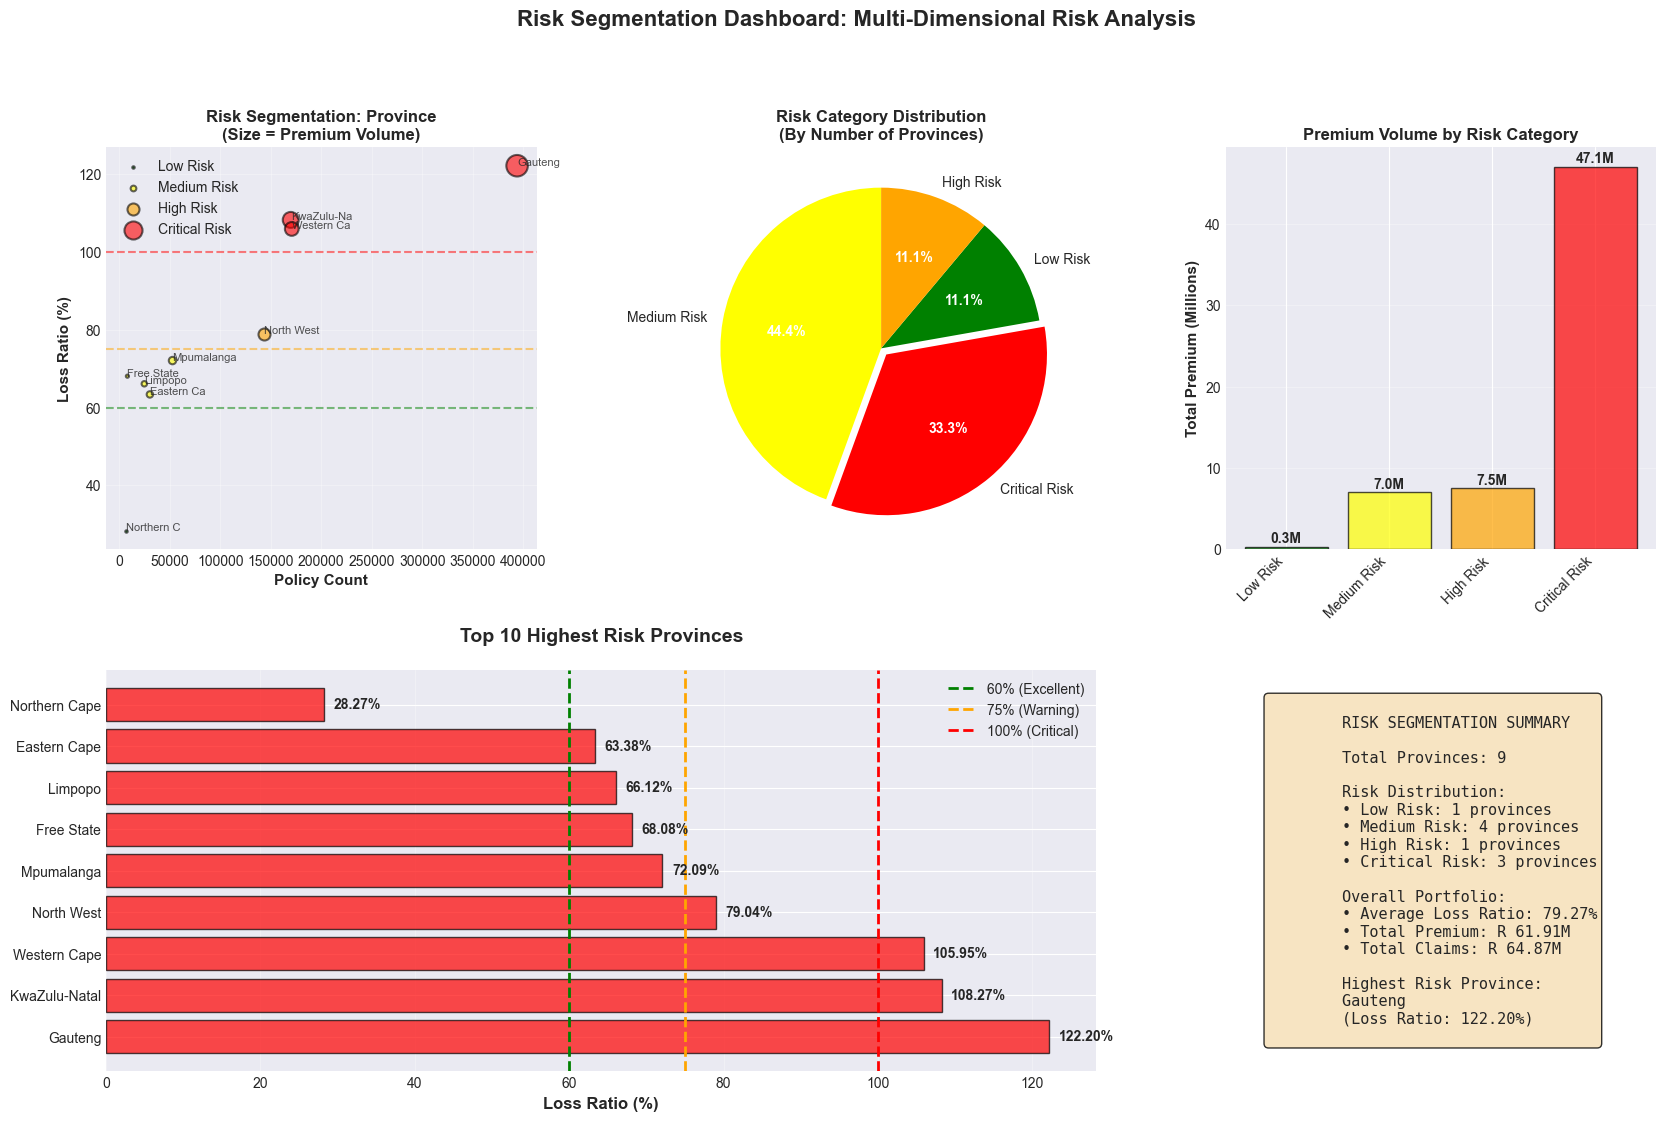

✓ Risk segmentation dashboard created
  - Shows risk categories across multiple dimensions
  - Identifies high-risk and low-risk segments
  - Provides actionable insights for premium adjustment


In [36]:
# Creative Visualization 3: Risk Segmentation Visualization
if not df.empty:
    print("=" * 80)
    print("CREATIVE VISUALIZATION 3: RISK SEGMENTATION DASHBOARD")
    print("=" * 80)
    
    # Create risk segments based on multiple dimensions
    # Segment 1: By Loss Ratio and Policy Count
    if 'Province' in df.columns:
        province_risk = df.groupby('Province').agg({
            'TotalPremium': 'sum',
            'TotalClaims': 'sum',
            'PolicyID': 'count'
        }).reset_index()
        province_risk.columns = ['Province', 'TotalPremium', 'TotalClaims', 'PolicyCount']
        province_risk['LossRatio'] = (province_risk['TotalClaims'] / province_risk['TotalPremium'] * 100)
        
        # Create risk categories
        province_risk['RiskCategory'] = pd.cut(province_risk['LossRatio'], 
                                               bins=[0, 60, 75, 100, float('inf')],
                                               labels=['Low Risk', 'Medium Risk', 'High Risk', 'Critical Risk'])
        
        # Create comprehensive dashboard
        fig = plt.figure(figsize=(20, 12))
        gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)
        
        # Plot 1: Risk Segmentation Scatter (Loss Ratio vs Policy Count)
        ax1 = fig.add_subplot(gs[0, 0])
        colors_map = {'Low Risk': 'green', 'Medium Risk': 'yellow', 'High Risk': 'orange', 'Critical Risk': 'red'}
        for risk_cat in province_risk['RiskCategory'].cat.categories:
            mask = province_risk['RiskCategory'] == risk_cat
            ax1.scatter(province_risk.loc[mask, 'PolicyCount'], 
                       province_risk.loc[mask, 'LossRatio'],
                       s=province_risk.loc[mask, 'TotalPremium']/1e6 * 10,  # Size by premium
                       alpha=0.6, 
                       color=colors_map[risk_cat],
                       label=risk_cat,
                       edgecolors='black',
                       linewidth=1.5)
        
        # Add labels
        for idx, row in province_risk.iterrows():
            ax1.annotate(row['Province'][:10], 
                        (row['PolicyCount'], row['LossRatio']),
                        fontsize=8, alpha=0.8)
        
        ax1.set_xlabel('Policy Count', fontsize=11, fontweight='bold')
        ax1.set_ylabel('Loss Ratio (%)', fontsize=11, fontweight='bold')
        ax1.set_title('Risk Segmentation: Province\n(Size = Premium Volume)', fontsize=12, fontweight='bold')
        ax1.axhline(y=60, color='green', linestyle='--', alpha=0.5)
        ax1.axhline(y=75, color='orange', linestyle='--', alpha=0.5)
        ax1.axhline(y=100, color='red', linestyle='--', alpha=0.5)
        ax1.grid(alpha=0.3)
        ax1.legend()
        
        # Plot 2: Risk Distribution Pie Chart
        ax2 = fig.add_subplot(gs[0, 1])
        risk_counts = province_risk['RiskCategory'].value_counts()
        colors_pie = [colors_map[cat] for cat in risk_counts.index]
        wedges, texts, autotexts = ax2.pie(risk_counts.values, 
                                          labels=risk_counts.index,
                                          autopct='%1.1f%%',
                                          colors=colors_pie,
                                          startangle=90,
                                          explode=[0.05 if cat == 'Critical Risk' else 0 for cat in risk_counts.index])
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
        ax2.set_title('Risk Category Distribution\n(By Number of Provinces)', fontsize=12, fontweight='bold')
        
        # Plot 3: Premium Volume by Risk Category
        ax3 = fig.add_subplot(gs[0, 2])
        risk_premium = province_risk.groupby('RiskCategory')['TotalPremium'].sum() / 1e6
        bars = ax3.bar(range(len(risk_premium)), risk_premium.values, 
                      color=[colors_map[cat] for cat in risk_premium.index], 
                      alpha=0.7, edgecolor='black')
        ax3.set_xticks(range(len(risk_premium)))
        ax3.set_xticklabels(risk_premium.index, rotation=45, ha='right')
        ax3.set_ylabel('Total Premium (Millions)', fontsize=11, fontweight='bold')
        ax3.set_title('Premium Volume by Risk Category', fontsize=12, fontweight='bold')
        ax3.grid(axis='y', alpha=0.3)
        for i, v in enumerate(risk_premium.values):
            ax3.text(i, v + max(risk_premium.values) * 0.01, f'{v:.1f}M', 
                    ha='center', fontsize=10, fontweight='bold')
        
        # Plot 4: Top 10 High-Risk Provinces
        ax4 = fig.add_subplot(gs[1, :2])
        top_risky = province_risk.nlargest(10, 'LossRatio')
        bars = ax4.barh(range(len(top_risky)), top_risky['LossRatio'], 
                       color='red', alpha=0.7, edgecolor='black')
        ax4.set_yticks(range(len(top_risky)))
        ax4.set_yticklabels(top_risky['Province'])
        ax4.set_xlabel('Loss Ratio (%)', fontsize=12, fontweight='bold')
        ax4.set_title('Top 10 Highest Risk Provinces', fontsize=14, fontweight='bold', pad=20)
        ax4.axvline(x=60, color='green', linestyle='--', linewidth=2, label='60% (Excellent)')
        ax4.axvline(x=75, color='orange', linestyle='--', linewidth=2, label='75% (Warning)')
        ax4.axvline(x=100, color='red', linestyle='--', linewidth=2, label='100% (Critical)')
        ax4.grid(axis='x', alpha=0.3)
        ax4.legend()
        for i, v in enumerate(top_risky['LossRatio']):
            ax4.text(v + max(top_risky['LossRatio']) * 0.01, i, f'{v:.2f}%', 
                    va='center', fontsize=10, fontweight='bold')
        
        # Plot 5: Risk Summary Statistics
        ax5 = fig.add_subplot(gs[1, 2])
        ax5.axis('off')
        summary_text = f"""
        RISK SEGMENTATION SUMMARY
        
        Total Provinces: {len(province_risk)}
        
        Risk Distribution:
        • Low Risk: {len(province_risk[province_risk['RiskCategory'] == 'Low Risk'])} provinces
        • Medium Risk: {len(province_risk[province_risk['RiskCategory'] == 'Medium Risk'])} provinces
        • High Risk: {len(province_risk[province_risk['RiskCategory'] == 'High Risk'])} provinces
        • Critical Risk: {len(province_risk[province_risk['RiskCategory'] == 'Critical Risk'])} provinces
        
        Overall Portfolio:
        • Average Loss Ratio: {province_risk['LossRatio'].mean():.2f}%
        • Total Premium: R {province_risk['TotalPremium'].sum()/1e6:.2f}M
        • Total Claims: R {province_risk['TotalClaims'].sum()/1e6:.2f}M
        
        Highest Risk Province:
        {province_risk.loc[province_risk['LossRatio'].idxmax(), 'Province']}
        (Loss Ratio: {province_risk['LossRatio'].max():.2f}%)
        """
        ax5.text(0.1, 0.5, summary_text, fontsize=11, 
                verticalalignment='center', family='monospace',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        plt.suptitle('Risk Segmentation Dashboard: Multi-Dimensional Risk Analysis', 
                    fontsize=16, fontweight='bold', y=0.995)
        plt.tight_layout()
        plt.show()
        
        print("✓ Risk segmentation dashboard created")
        print("  - Shows risk categories across multiple dimensions")
        print("  - Identifies high-risk and low-risk segments")
        print("  - Provides actionable insights for premium adjustment")
    else:
        print("Province column not found for risk segmentation.")
else:
    print("Dataset is empty.")


### Summary of Steps 7-10: Advanced EDA Analysis

**Step 7 - Vehicle Analysis:**
- ✓ Highest and lowest claim amounts by vehicle make
- ✓ Most and least risky vehicles (by loss ratio)
- ✓ Vehicle age vs claims relationship
- ✓ Trend analysis for vehicle age impact

**Step 8 - Key Metrics Calculation:**
- ✓ Overall portfolio loss ratio
- ✓ Loss ratio by Province
- ✓ Loss ratio by VehicleType
- ✓ Loss ratio by Gender
- ✓ Business interpretation of loss ratios

**Step 9 - Outlier Detection:**
- ✓ Box plots for key numerical variables
- ✓ Extreme value identification (TotalClaims, CustomValueEstimate, TotalPremium)
- ✓ IQR-based outlier detection
- ✓ Recommendations for outlier handling

**Step 10 - Creative Visualizations:**
- ✓ Loss Ratio Heatmap (Province × VehicleType)
- ✓ Time Series Dashboard with trend lines and annotations
- ✓ Risk Segmentation Visualization
- ✓ Multi-dimensional risk analysis

**Key Insights Generated:**
- Vehicle risk patterns (which makes/models are riskiest)
- Age-based risk factors
- Comprehensive loss ratio analysis across dimensions
- Outlier patterns and handling strategies
- Visual risk segmentation for business decision-making

**Complete EDA Summary:**
All 10 steps of the Exploratory Data Analysis have been completed:
1. ✓ Data Summarization
2. ✓ Data Quality Assessment
3. ✓ Univariate Analysis
4. ✓ Bivariate/Multivariate Analysis
5. ✓ Temporal Analysis
6. ✓ Geographic Analysis
7. ✓ Vehicle Analysis
8. ✓ Key Metrics Calculation
9. ✓ Outlier Detection
10. ✓ Creative Visualizations

**Next Steps:**
- Use insights for hypothesis testing (Task 3)
- Prepare data for machine learning models (Task 4)
- Generate business recommendations based on findings
